<a href="https://colab.research.google.com/github/AyaElshazly/Applied-Machine-Learning/blob/main/Term_Project_G4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-learn

In [ ]:
pip install scikit-learn numpy threadpoolctl

In [ ]:
pip install scikit-learn numpy threadpoolctl

In [ ]:
pip install MiniSom

In [ ]:
pip install numpy pandas scikit-learn minisom tensorflow


# Import the required libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier

# Load the dataset

In [ ]:
train_data = pd.read_csv("/content/training_dataset.csv")
validation_data = pd.read_csv("/content/validation_dataset.csv")
test_data = pd.read_csv("/content/test_dataset.csv")

In [ ]:
# display first 5 rows of training data
train_data.head()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   8192       2976      85     23                                95   
1  14089       3104     233     12                               150   
2  10246       3385     160      7                               937   
3   8686       3191      41     14                               210   
4   9242       2821     297      4                                85   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                              72                             2436   
1                              40                             1503   
2                             204                             1224   
3                              37                             3207   
4                               1                              992   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
0            246             193             64  ...            0   
1            200             251            186  ...            0   
2            228             242            147  ...            0   
3            221             208            119  ...            1   
4            208             238            169  ...            0   

   Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
0            0            0            0           1  
1            0            0            0           1  
2            0            0            0           1  
3            0            0            0           1  
4            0            0            0           1  

[5 rows x 56 columns]

In [ ]:
# display first 5 rows of validation data
validation_data.head()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   6078       2432     147     16                                90   
1   7895       2653     114     14                               175   
2   6821       3542     315     31                               255   
3   1594       3191     286     20                                30   
4  11987       2160      64     37                               190   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               2                              484   
1                              38                             2278   
2                             130                             3218   
3                              12                             4965   
4                              96                              240   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
0            240             236            120  ...            0   
1            244             225            107  ...            0   
2            124             198            206  ...            0   
3            162             235            212  ...            0   
4            225             140             15  ...            0   

   Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
0            0            0            0           6  
1            0            0            0           3  
2            0            0            1           1  
3            0            0            0           1  
4            0            0            0           3  

[5 rows x 56 columns]

In [ ]:
# display first 5 rows of testing data
test_data.head()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   8405       2823     104     20                               573   
1  13220       2453     157      7                               474   
2   7650       3156     110      6                               162   
3  14941       2471     186     16                               175   
4  12548       2292     177     29                               443   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                             191                             2608   
1                             183                              806   
2                              24                             1101   
3                              67                              972   
4                             152                             1315   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
0            249             210             80  ...            0   
1            228             241            146  ...            0   
2            230             234            138  ...            0   
3            221             250            157  ...            0   
4            219             242            134  ...            0   

   Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
0            0            0            0           3  
1            0            0            0           3  
2            0            0            0           1  
3            0            0            0           3  
4            0            0            0           4  

[5 rows x 56 columns]

# EDA

In [ ]:
# Function to visualize outliers using box plots for all features
def visualize_outliers(dataframe):
    plt.figure(figsize=(24, 12))
    sns.boxplot(data=dataframe,palette='Greens')
    plt.title('Outliers - Box Plot')
    plt.xticks(rotation=90)
    plt.show()

In [ ]:

def visualize_feature_distribution(dataframe):
    fig, ax = plt.subplots(2, 5, figsize=(22, 6))
    df_hist = dataframe[["Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Hillshade_3pm","Horizontal_Distance_To_Fire_Points"]]

    # Specify the color you want for the histograms
    hist_color = 'green'

    ax1 = sns.histplot(x=df_hist["Elevation"], ax=ax[0, 0], color=hist_color)
    ax1.set_xlabel("Elevation")
    ax2 = sns.histplot(x=df_hist["Aspect"], ax=ax[0, 1], color=hist_color)
    ax2.set_xlabel("Aspect")
    ax3 = sns.histplot(x=df_hist["Slope"], ax=ax[0, 2], color=hist_color)
    ax3.set_xlabel("Slope")
    ax4 = sns.histplot(x=df_hist["Horizontal_Distance_To_Hydrology"], ax=ax[0, 3], color=hist_color)
    ax4.set_xlabel("Horizontal_Distance_To_Hydrology")
    ax5 = sns.histplot(x=df_hist["Vertical_Distance_To_Hydrology"], ax=ax[0, 4], color=hist_color)
    ax5.set_xlabel("Vertical_Distance_To_Hydrology")
    ax6 = sns.histplot(x=df_hist["Horizontal_Distance_To_Roadways"], ax=ax[1, 0], color=hist_color)
    ax6.set_xlabel("Horizontal_Distance_To_Roadways")
    ax7 = sns.histplot(x=df_hist["Hillshade_3pm"], ax=ax[1, 1], color=hist_color)
    ax7.set_xlabel("Hillshade_3pm")
    ax8 = sns.histplot(x=df_hist["Hillshade_9am"], ax=ax[1, 2], color=hist_color)
    ax8.set_xlabel("Hillshade_9am")
    ax9 = sns.histplot(x=df_hist["Hillshade_Noon"], ax=ax[1, 3], color=hist_color)
    ax9.set_xlabel("Hillshade_Noon")
    ax10 = sns.histplot(x=df_hist["Horizontal_Distance_To_Fire_Points"], ax=ax[1, 4], color=hist_color)
    ax10.set_xlabel("Horizontal_Distance_To_Fire_Points")

    plt.tight_layout()
    plt.show()

In [ ]:
def features_correlation(df):
    fig, ax = plt.subplots(figsize=(50,50))
    sns.heatmap(df.corr(),cmap="Greens", annot=True)
    plt.title("Features Correlation", fontsize=35)
    plt.show()

In [ ]:
def cover_types_per_class(df):
    class_counts = df['Cover_Type'].value_counts()
    # Create a custom color palette with green
    custom_palette = sns.color_palette(['green'])
    # Create a bar chart to visualize the number of instances per class
    plt.figure(figsize=(8, 6))
    sns.barplot(x=class_counts.index, y=class_counts.values, palette=custom_palette)
    plt.title('Number of Instances per Class')
    plt.xlabel('Cover Type')
    plt.ylabel('Number of Instances')
    plt.xticks()
    plt.show()

## For training dataset

In [ ]:
# detais about training dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8286 entries, 0 to 8285
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  8286 non-null   int64
 1   Elevation                           8286 non-null   int64
 2   Aspect                              8286 non-null   int64
 3   Slope                               8286 non-null   int64
 4   Horizontal_Distance_To_Hydrology    8286 non-null   int64
 5   Vertical_Distance_To_Hydrology      8286 non-null   int64
 6   Horizontal_Distance_To_Roadways     8286 non-null   int64
 7   Hillshade_9am                       8286 non-null   int64
 8   Hillshade_Noon                      8286 non-null   int64
 9   Hillshade_3pm                       8286 non-null   int64
 10  Horizontal_Distance_To_Fire_Points  8286 non-null   int64
 11  Wilderness_Area1                    8286 non-null   int64
 12  Wilder

In [ ]:
# check null values
train_data.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


There are no missing values in our training dataset.

In [ ]:
# check if the training dataset is balanced
train_data['Cover_Type'].value_counts()

7    1720
5    1569
3    1385
4    1368
6    1036
2     861
1     347
Name: Cover_Type, dtype: int64

In [ ]:
train_data.describe()

Id    Elevation       Aspect        Slope  \
count   8286.000000  8286.000000  8286.000000  8286.000000   
mean    7609.998431  2732.983104   155.366643    16.868694   
std     4291.741503   432.906958   108.392758     8.514811   
min        1.000000  1863.000000     0.000000     0.000000   
25%     3889.500000  2350.000000    66.000000    10.000000   
50%     7479.500000  2720.500000   125.000000    16.000000   
75%    11349.750000  3099.750000   252.000000    23.000000   
max    15120.000000  3849.000000   360.000000    50.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                       8286.000000                     8286.000000   
mean                         225.249698                       53.233888   
std                          213.670866                       62.890107   
min                            0.000000                     -134.000000   
25%                           60.000000                        5.000000   
50%                          175.000000                       34.000000   
75%                          323.000000                       84.000000   
max                         1343.000000                      547.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                      8286.000000    8286.000000     8286.000000   
mean                       1629.840574     213.732682      218.534999   
std                        1259.714393      30.675904       23.142959   
min                           0.000000      58.000000       99.000000   
25%                         726.000000     197.000000      206.000000   
50%                        1273.000000     221.000000      222.000000   
75%                        2155.000000     237.000000      235.000000   
max                        6508.000000     254.000000      254.000000   

       Hillshade_3pm  ...  Soil_Type32  Soil_Type33  Soil_Type34  Soil_Type35  \
count     8286.00000  ...  8286.000000  8286.000000  8286.000000  8286.000000   
mean       133.00712  ...     0.035723     0.031620     0.001328     0.008810   
std         46.73019  ...     0.185610     0.174996     0.036413     0.093453   
min          0.00000  ...     0.000000     0.000000     0.000000     0.000000   
25%        103.00000  ...     0.000000     0.000000     0.000000     0.000000   
50%        136.00000  ...     0.000000     0.000000     0.000000     0.000000   
75%        166.00000  ...     0.000000     0.000000     0.000000     0.000000   
max        248.00000  ...     1.000000     1.000000     1.000000     1.000000   

       Soil_Type36  Soil_Type37  Soil_Type38  Soil_Type39  Soil_Type40  \
count  8286.000000  8286.000000  8286.000000  8286.000000  8286.000000   
mean      0.000845     0.003259     0.063481     0.056119     0.040068   
std       0.029055     0.056994     0.243840     0.230165     0.196130   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

        Cover_Type  
count  8286.000000  
mean      4.561550  
std       1.789533  
min       1.000000  
25%       3.000000  
50%       5.000000  
75%       6.000000  
max       7.000000  

[8 rows x 56 columns]

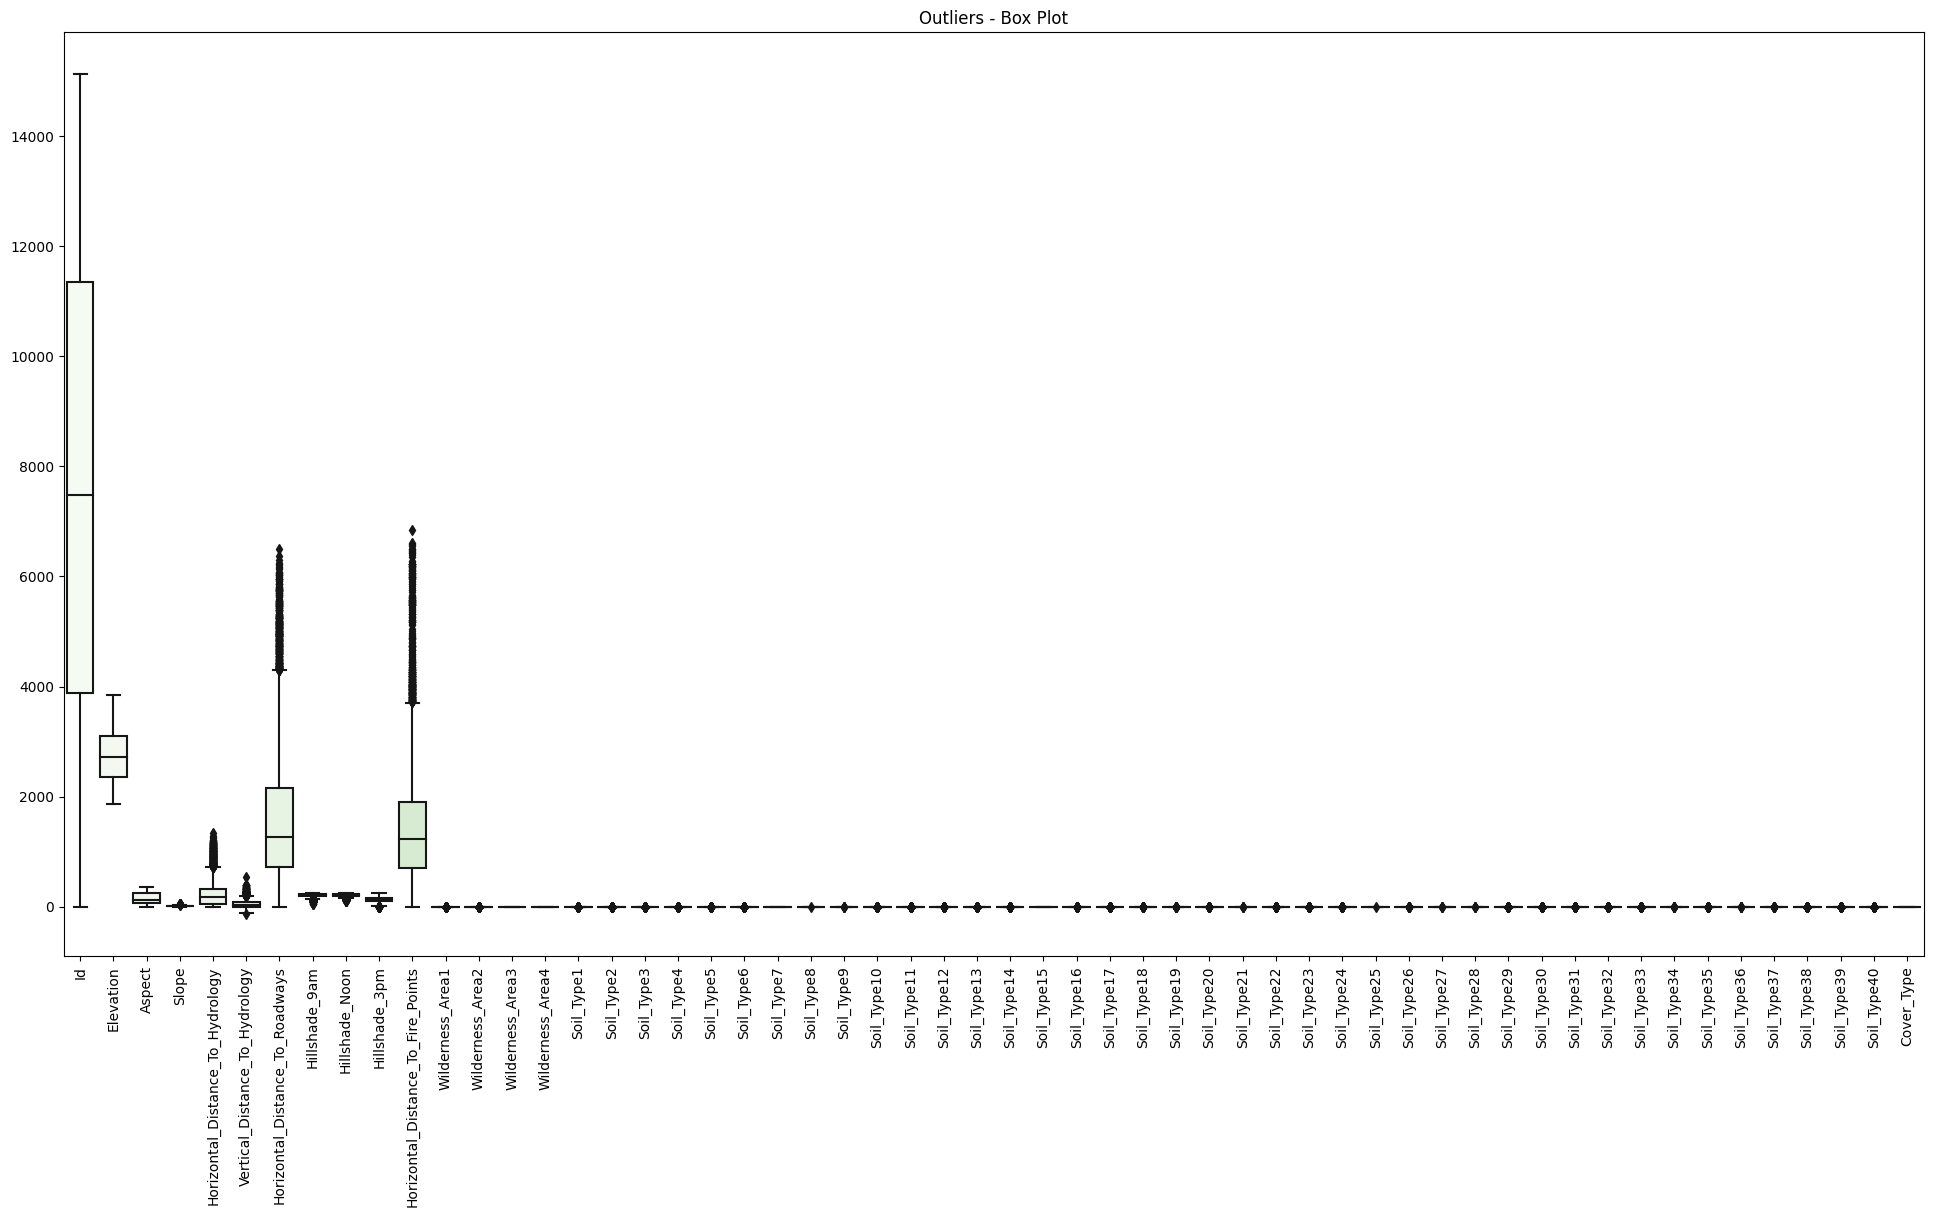

In [ ]:
# Call the functions with the training datadataset
visualize_outliers(train_data)

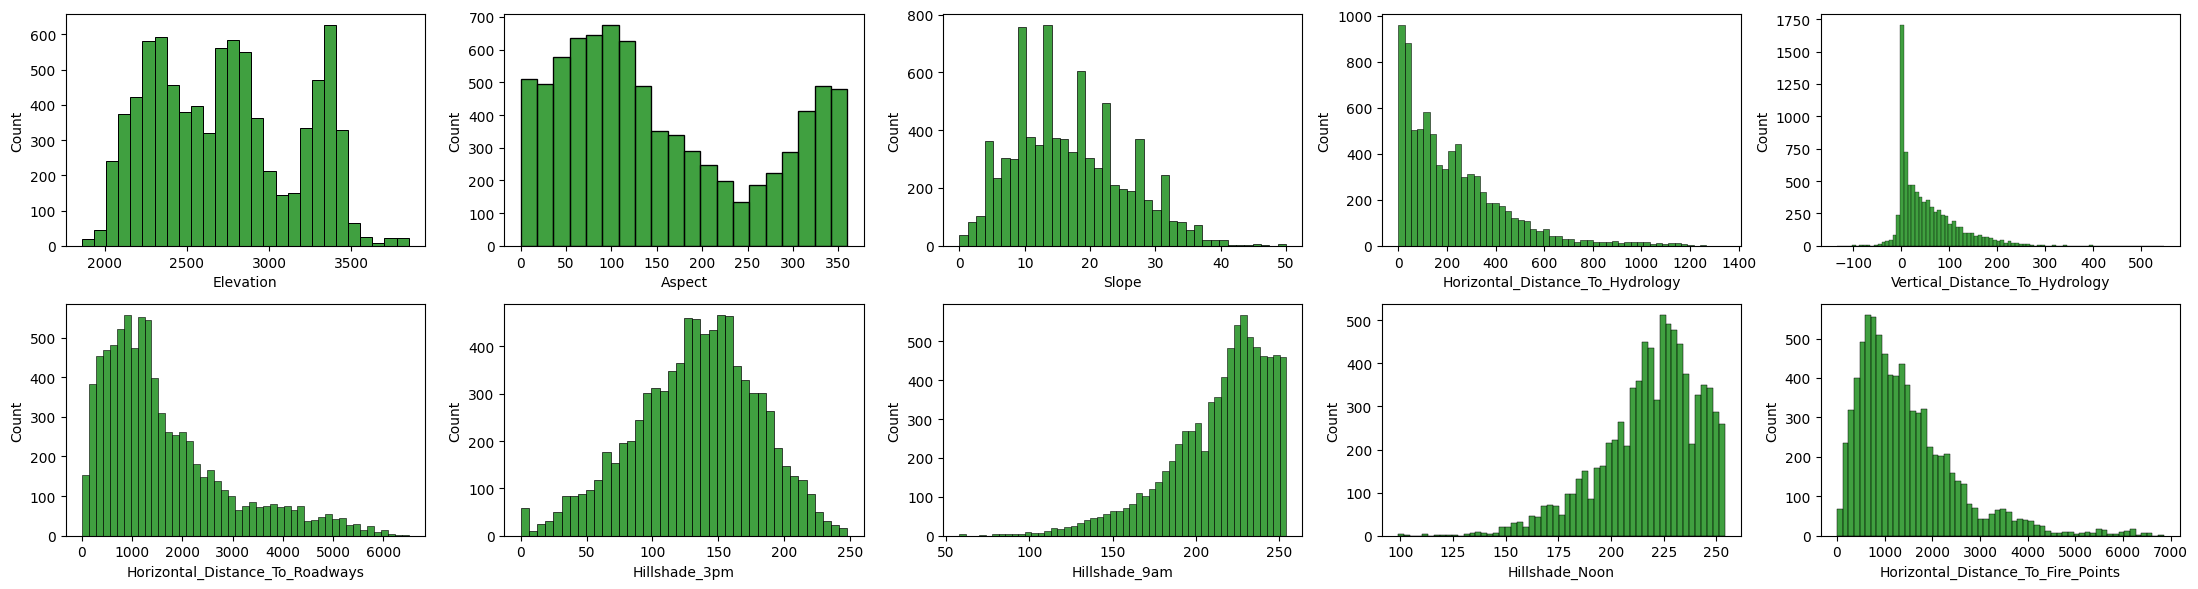

In [ ]:
visualize_feature_distribution(train_data)

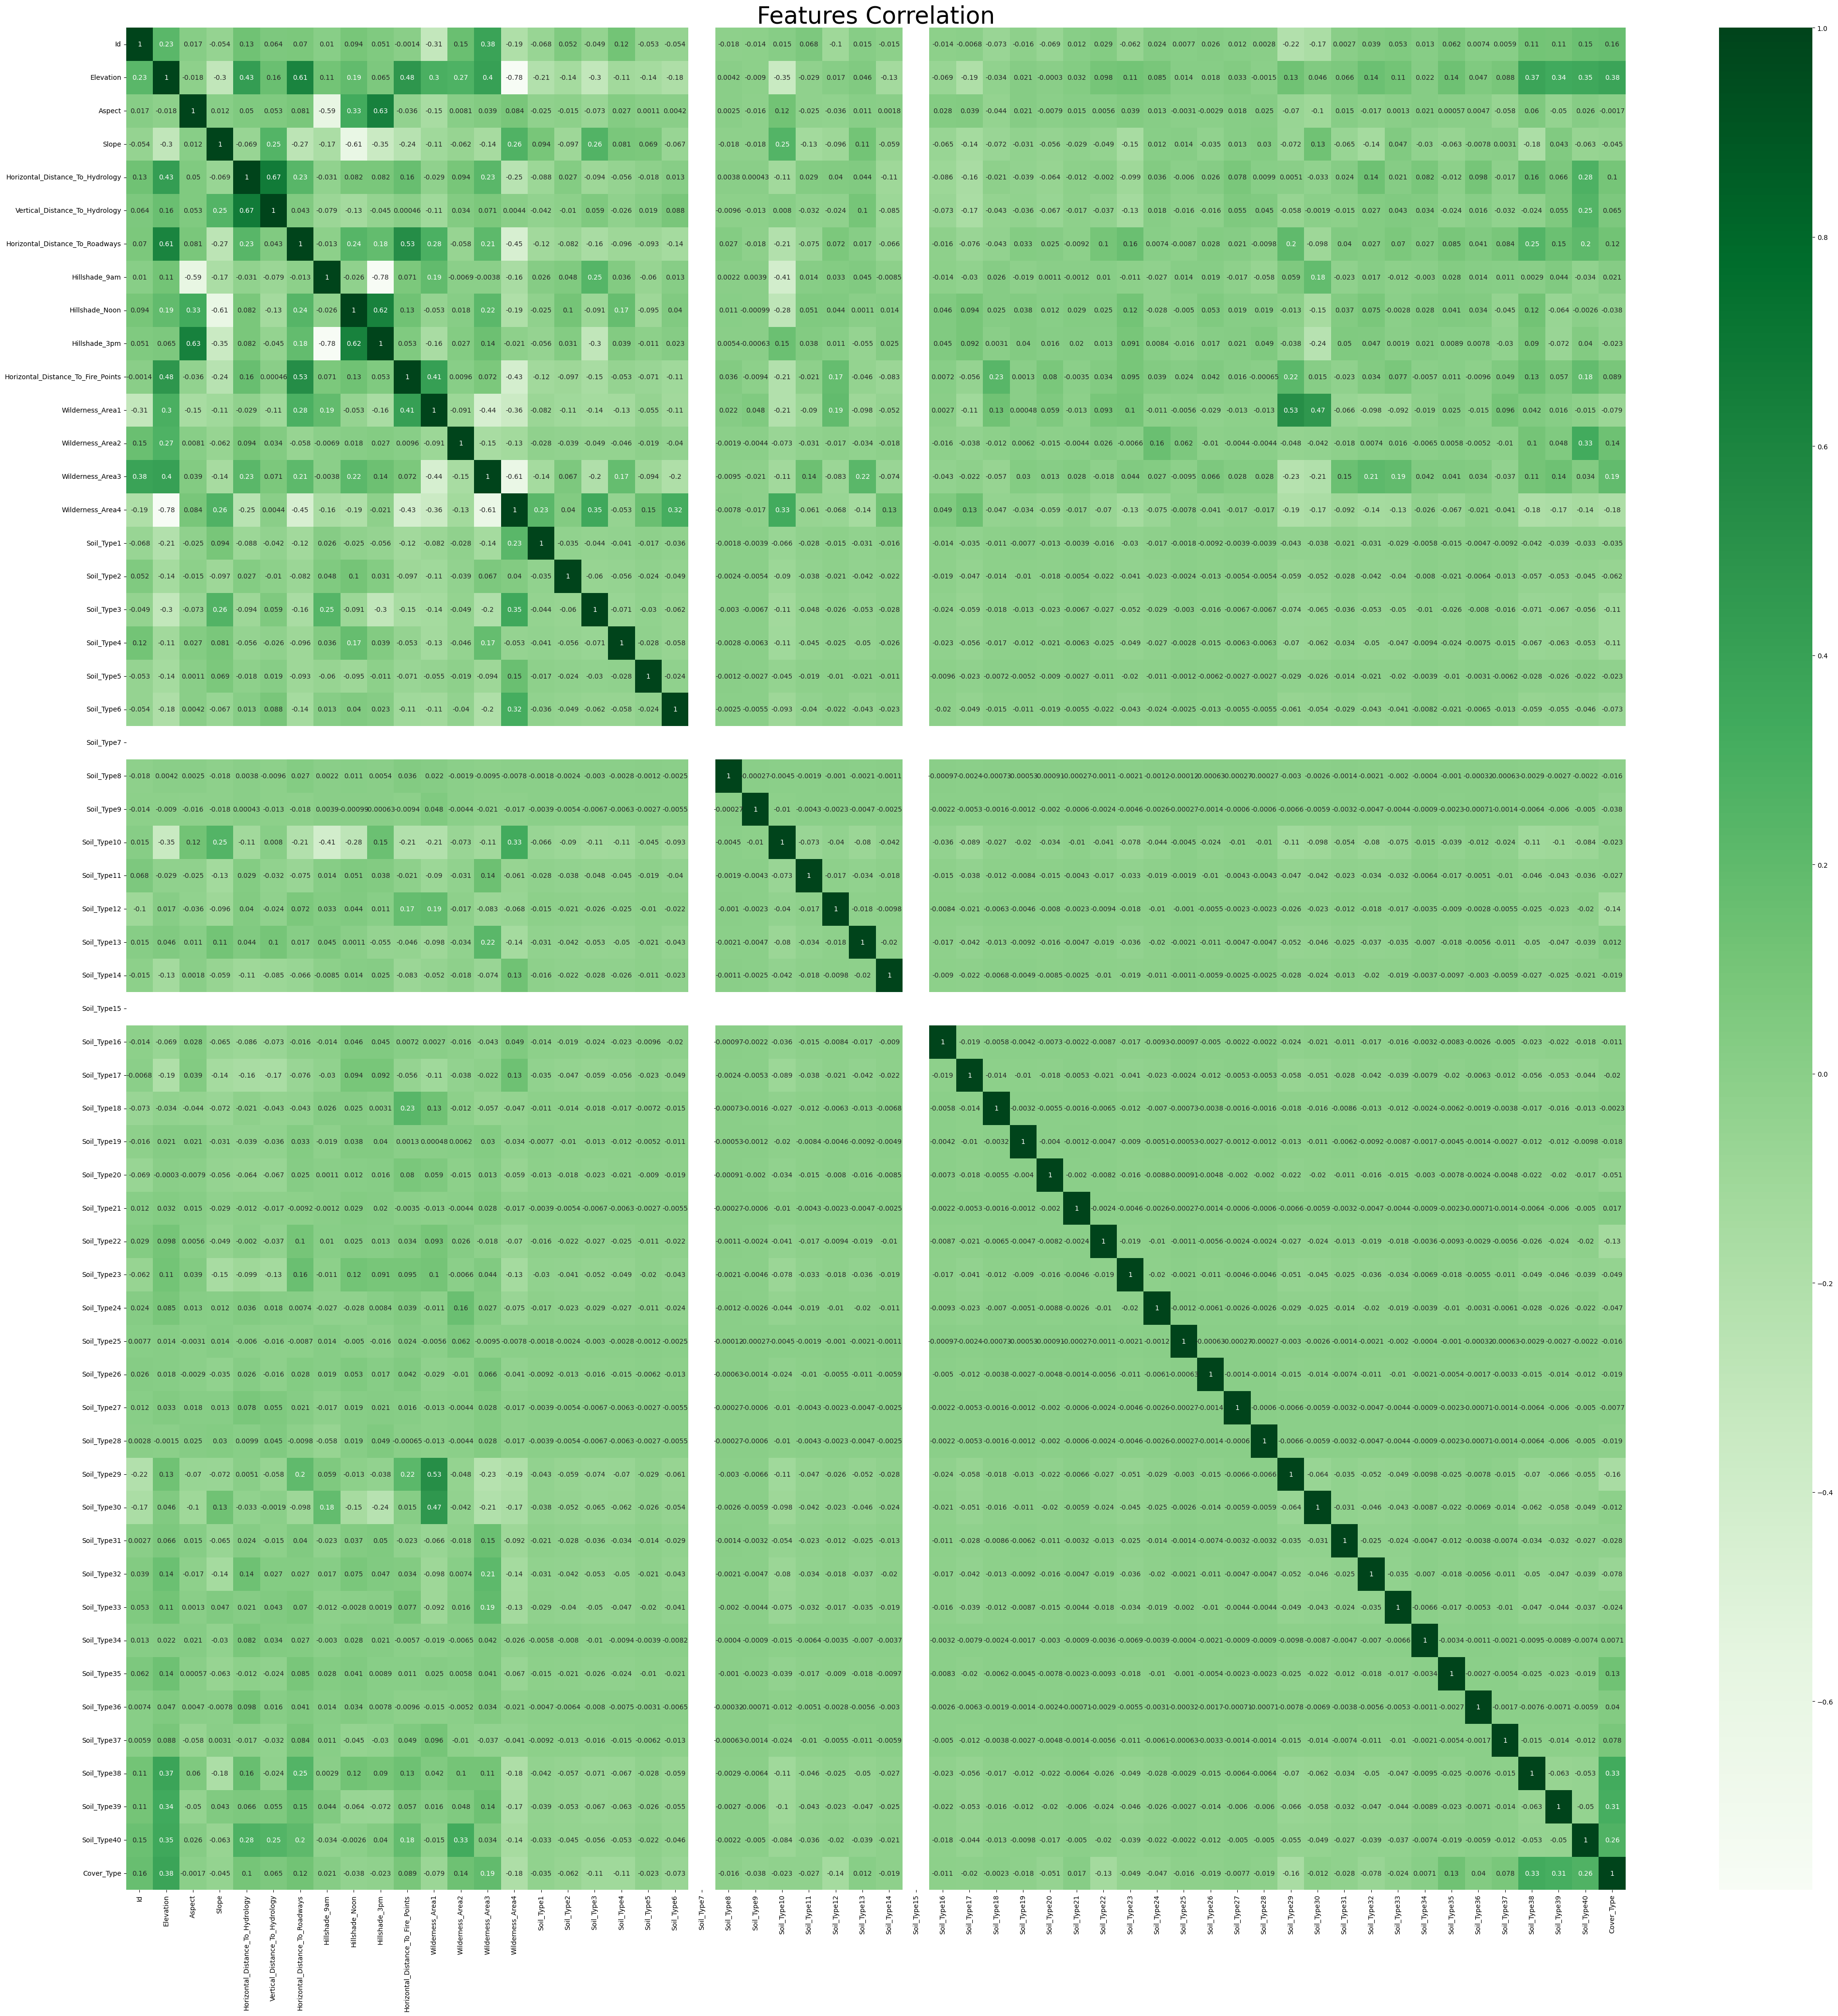

In [ ]:
features_correlation(train_data)

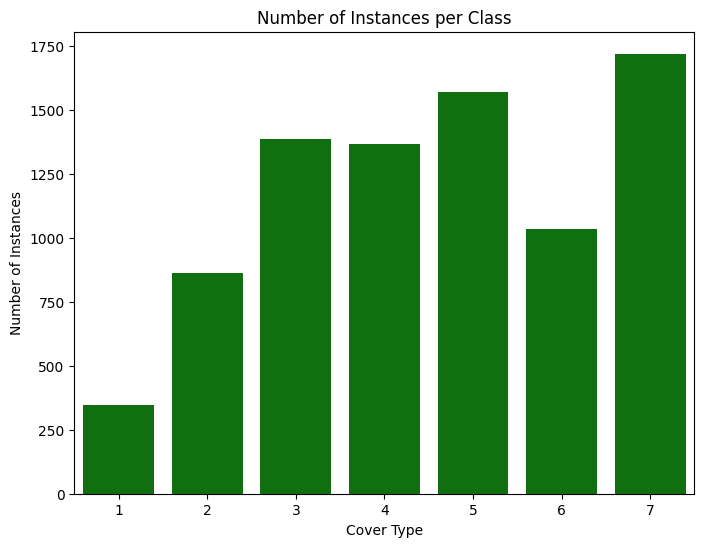

In [ ]:
cover_types_per_class(train_data)

## For validation dataset

In [ ]:
validation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498 entries, 0 to 1497
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  1498 non-null   int64
 1   Elevation                           1498 non-null   int64
 2   Aspect                              1498 non-null   int64
 3   Slope                               1498 non-null   int64
 4   Horizontal_Distance_To_Hydrology    1498 non-null   int64
 5   Vertical_Distance_To_Hydrology      1498 non-null   int64
 6   Horizontal_Distance_To_Roadways     1498 non-null   int64
 7   Hillshade_9am                       1498 non-null   int64
 8   Hillshade_Noon                      1498 non-null   int64
 9   Hillshade_3pm                       1498 non-null   int64
 10  Horizontal_Distance_To_Fire_Points  1498 non-null   int64
 11  Wilderness_Area1                    1498 non-null   int64
 12  Wilder

In [ ]:
# check null values
validation_data.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


There are no missing values in our validation dataset.

In [ ]:
# check if the training dataset is balanced
validation_data['Cover_Type'].value_counts()

3    233
1    224
7    224
6    207
2    207
4    202
5    201
Name: Cover_Type, dtype: int64

In [ ]:
validation_data.describe()

Id    Elevation       Aspect        Slope  \
count   1498.000000  1498.000000  1498.000000  1498.000000   
mean    7562.141522  2749.556742   160.700267    16.697597   
std     4356.857926   424.443747   108.854006     8.544512   
min        9.000000  1879.000000     0.000000     1.000000   
25%     3693.500000  2376.000000    73.000000    10.000000   
50%     7713.000000  2755.000000   132.000000    16.000000   
75%    11214.750000  3127.750000   260.750000    23.000000   
max    15119.000000  3702.000000   360.000000    48.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                       1498.000000                     1498.000000   
mean                         229.946595                       51.189586   
std                          211.628457                       62.357847   
min                            0.000000                     -115.000000   
25%                           67.000000                        4.000000   
50%                          180.000000                       32.000000   
75%                          328.500000                       77.000000   
max                         1261.000000                      554.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                      1498.000000    1498.000000     1498.000000   
mean                       1711.573431     212.061415      219.622163   
std                        1305.919072      31.237923       22.836852   
min                          30.000000      89.000000      107.000000   
25%                         782.000000     194.250000      207.000000   
50%                        1339.000000     220.000000      223.000000   
75%                        2309.000000     236.000000      236.000000   
max                        6890.000000     254.000000      254.000000   

       Hillshade_3pm  ...  Soil_Type32  Soil_Type33  Soil_Type34  Soil_Type35  \
count    1498.000000  ...  1498.000000  1498.000000  1498.000000  1498.000000   
mean      136.323765  ...     0.047397     0.041389     0.002003     0.009346   
std        45.932031  ...     0.212556     0.199254     0.044721     0.096253   
min         0.000000  ...     0.000000     0.000000     0.000000     0.000000   
25%       108.000000  ...     0.000000     0.000000     0.000000     0.000000   
50%       141.000000  ...     0.000000     0.000000     0.000000     0.000000   
75%       168.000000  ...     0.000000     0.000000     0.000000     0.000000   
max       241.000000  ...     1.000000     1.000000     1.000000     1.000000   

       Soil_Type36  Soil_Type37  Soil_Type38  Soil_Type39  Soil_Type40  \
count  1498.000000  1498.000000  1498.000000  1498.000000  1498.000000   
mean      0.000668     0.001335     0.050067     0.046061     0.030040   
std       0.025837     0.036527     0.218156     0.209688     0.170755   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

        Cover_Type  
count  1498.000000  
mean      3.978638  
std       2.022141  
min       1.000000  
25%       2.000000  
50%       4.000000  
75%       6.000000  
max       7.000000  

[8 rows x 56 columns]

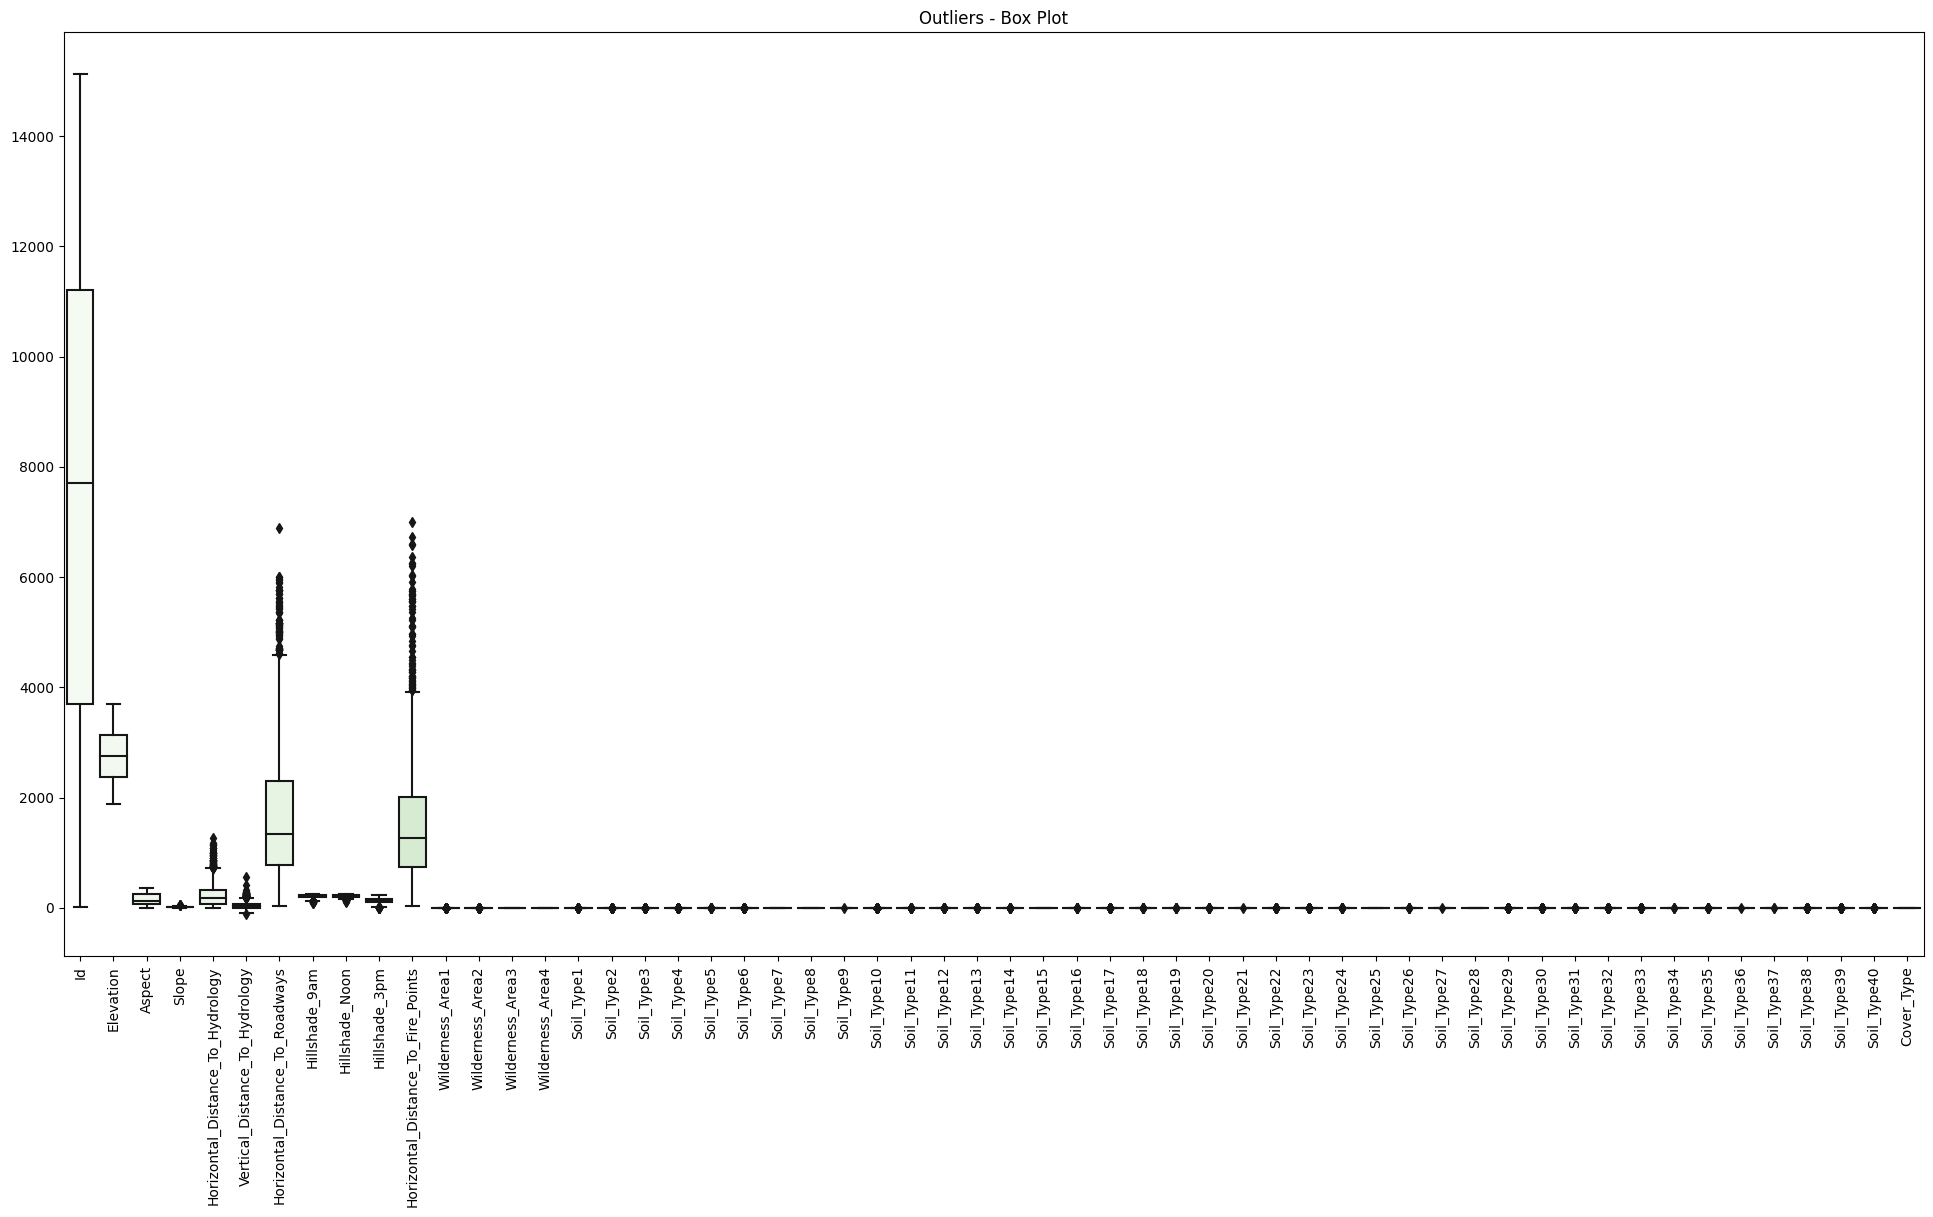

In [ ]:
# Call the functions with the validation datadataset
visualize_outliers(validation_data)

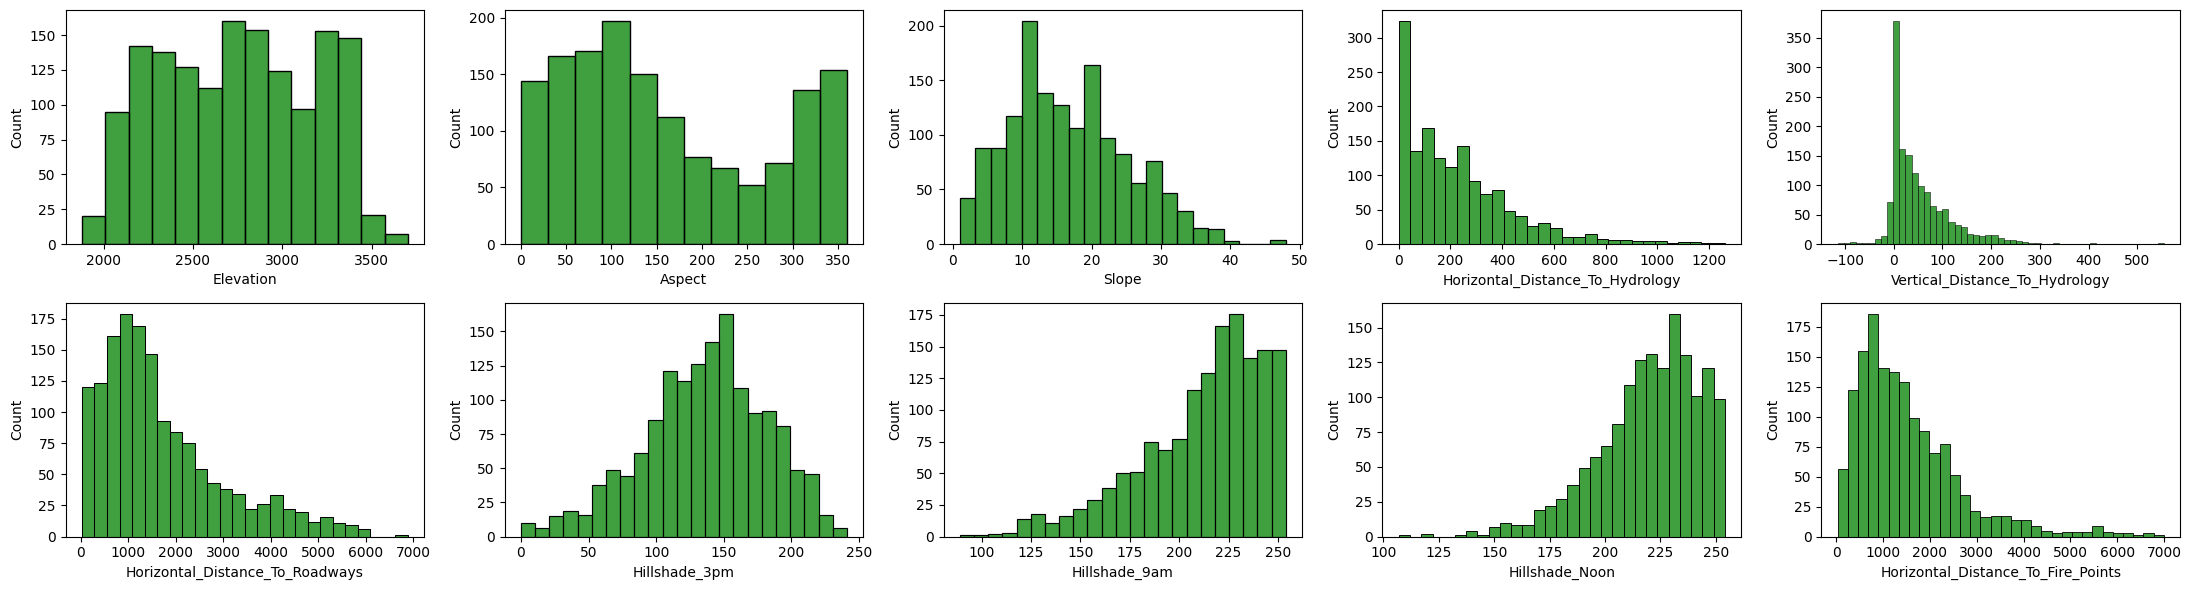

In [ ]:
visualize_feature_distribution(validation_data)

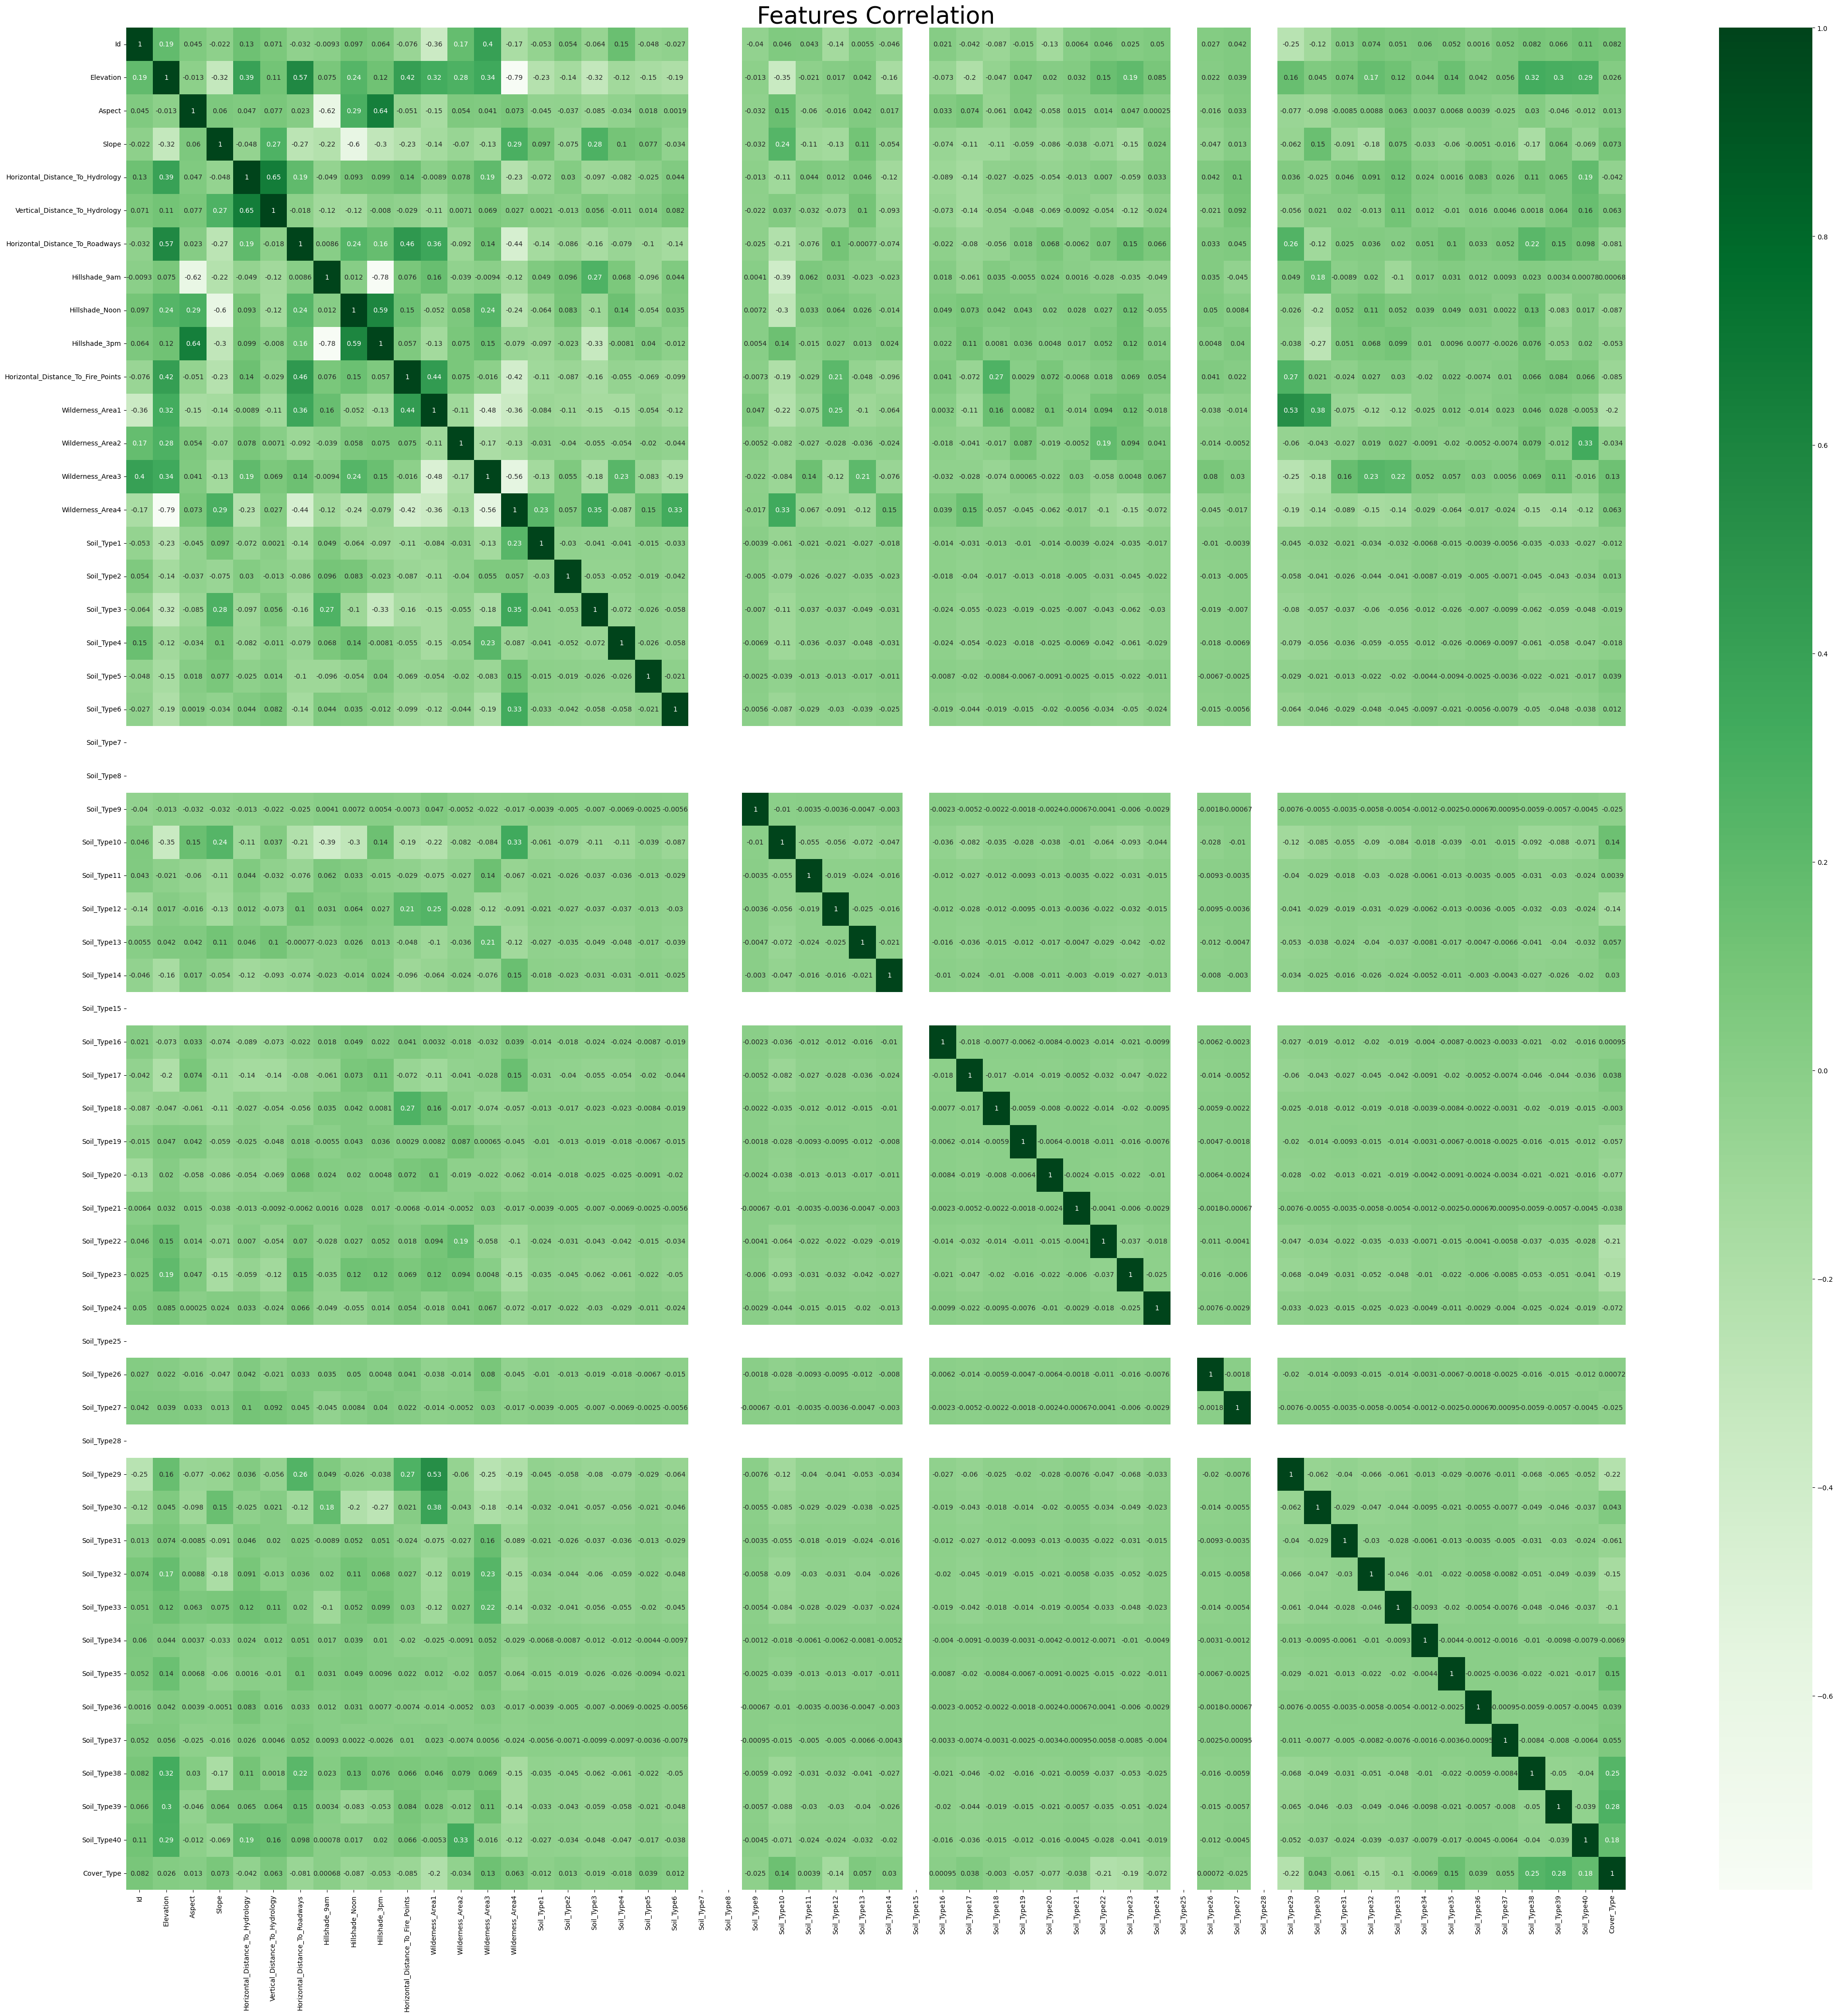

In [ ]:
features_correlation(validation_data)

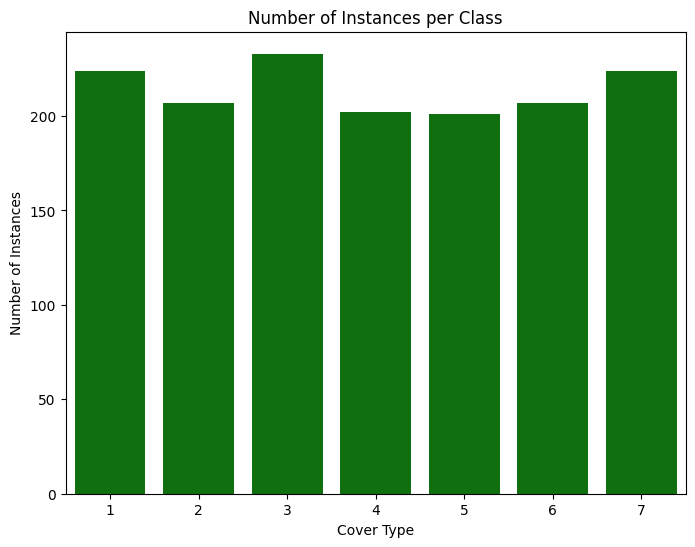

In [ ]:
cover_types_per_class(validation_data)

## For test dataset

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  1525 non-null   int64
 1   Elevation                           1525 non-null   int64
 2   Aspect                              1525 non-null   int64
 3   Slope                               1525 non-null   int64
 4   Horizontal_Distance_To_Hydrology    1525 non-null   int64
 5   Vertical_Distance_To_Hydrology      1525 non-null   int64
 6   Horizontal_Distance_To_Roadways     1525 non-null   int64
 7   Hillshade_9am                       1525 non-null   int64
 8   Hillshade_Noon                      1525 non-null   int64
 9   Hillshade_3pm                       1525 non-null   int64
 10  Horizontal_Distance_To_Fire_Points  1525 non-null   int64
 11  Wilderness_Area1                    1525 non-null   int64
 12  Wilder

In [ ]:
# check null values
test_data.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


There are no missing values in our test dataset.

In [ ]:
# check if the training dataset is balanced
test_data['Cover_Type'].value_counts()

4    247
2    230
6    225
7    216
5    215
1    197
3    195
Name: Cover_Type, dtype: int64

In [ ]:
test_data.describe()

Id    Elevation       Aspect        Slope  \
count   1525.000000  1525.000000  1525.000000  1525.000000   
mean    7559.973770  2735.860984   151.527213    16.545574   
std     4388.971897   430.089563   108.633930     8.511536   
min        4.000000  1874.000000     0.000000     0.000000   
25%     3781.000000  2349.000000    62.000000    10.000000   
50%     7655.000000  2751.000000   121.000000    15.000000   
75%    11499.000000  3102.000000   243.000000    22.000000   
max    15117.000000  3825.000000   359.000000    46.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                       1525.000000                     1525.000000   
mean                         231.399344                       53.087213   
std                          222.534352                       64.622797   
min                            0.000000                     -108.000000   
25%                           60.000000                        6.000000   
50%                          175.000000                       33.000000   
75%                          330.000000                       78.000000   
max                         1260.000000                      403.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                      1525.000000    1525.000000     1525.000000   
mean                       1694.068197     214.243934      218.283279   
std                        1309.355305      29.533171       23.159036   
min                          30.000000      65.000000      111.000000   
25%                         781.000000     199.000000      206.000000   
50%                        1318.000000     221.000000      222.000000   
75%                        2230.000000     236.000000      234.000000   
max                        6660.000000     254.000000      254.000000   

       Hillshade_3pm  ...  Soil_Type32  Soil_Type33  Soil_Type34  Soil_Type35  \
count    1525.000000  ...  1525.000000  1525.000000  1525.000000  1525.000000   
mean      132.590820  ...     0.038033     0.040656     0.002623     0.007869   
std        45.322776  ...     0.191338     0.197556     0.051164     0.088386   
min         0.000000  ...     0.000000     0.000000     0.000000     0.000000   
25%       105.000000  ...     0.000000     0.000000     0.000000     0.000000   
50%       135.000000  ...     0.000000     0.000000     0.000000     0.000000   
75%       164.000000  ...     0.000000     0.000000     0.000000     0.000000   
max       240.000000  ...     1.000000     1.000000     1.000000     1.000000   

       Soil_Type36  Soil_Type37  Soil_Type38  Soil_Type39  Soil_Type40  \
count       1525.0  1525.000000  1525.000000  1525.000000  1525.000000   
mean           0.0     0.003279     0.049180     0.041967     0.032787   
std            0.0     0.057185     0.216315     0.200580     0.178137   
min            0.0     0.000000     0.000000     0.000000     0.000000   
25%            0.0     0.000000     0.000000     0.000000     0.000000   
50%            0.0     0.000000     0.000000     0.000000     0.000000   
75%            0.0     0.000000     0.000000     0.000000     0.000000   
max            0.0     1.000000     1.000000     1.000000     1.000000   

        Cover_Type  
count  1525.000000  
mean      4.043934  
std       1.974918  
min       1.000000  
25%       2.000000  
50%       4.000000  
75%       6.000000  
max       7.000000  

[8 rows x 56 columns]

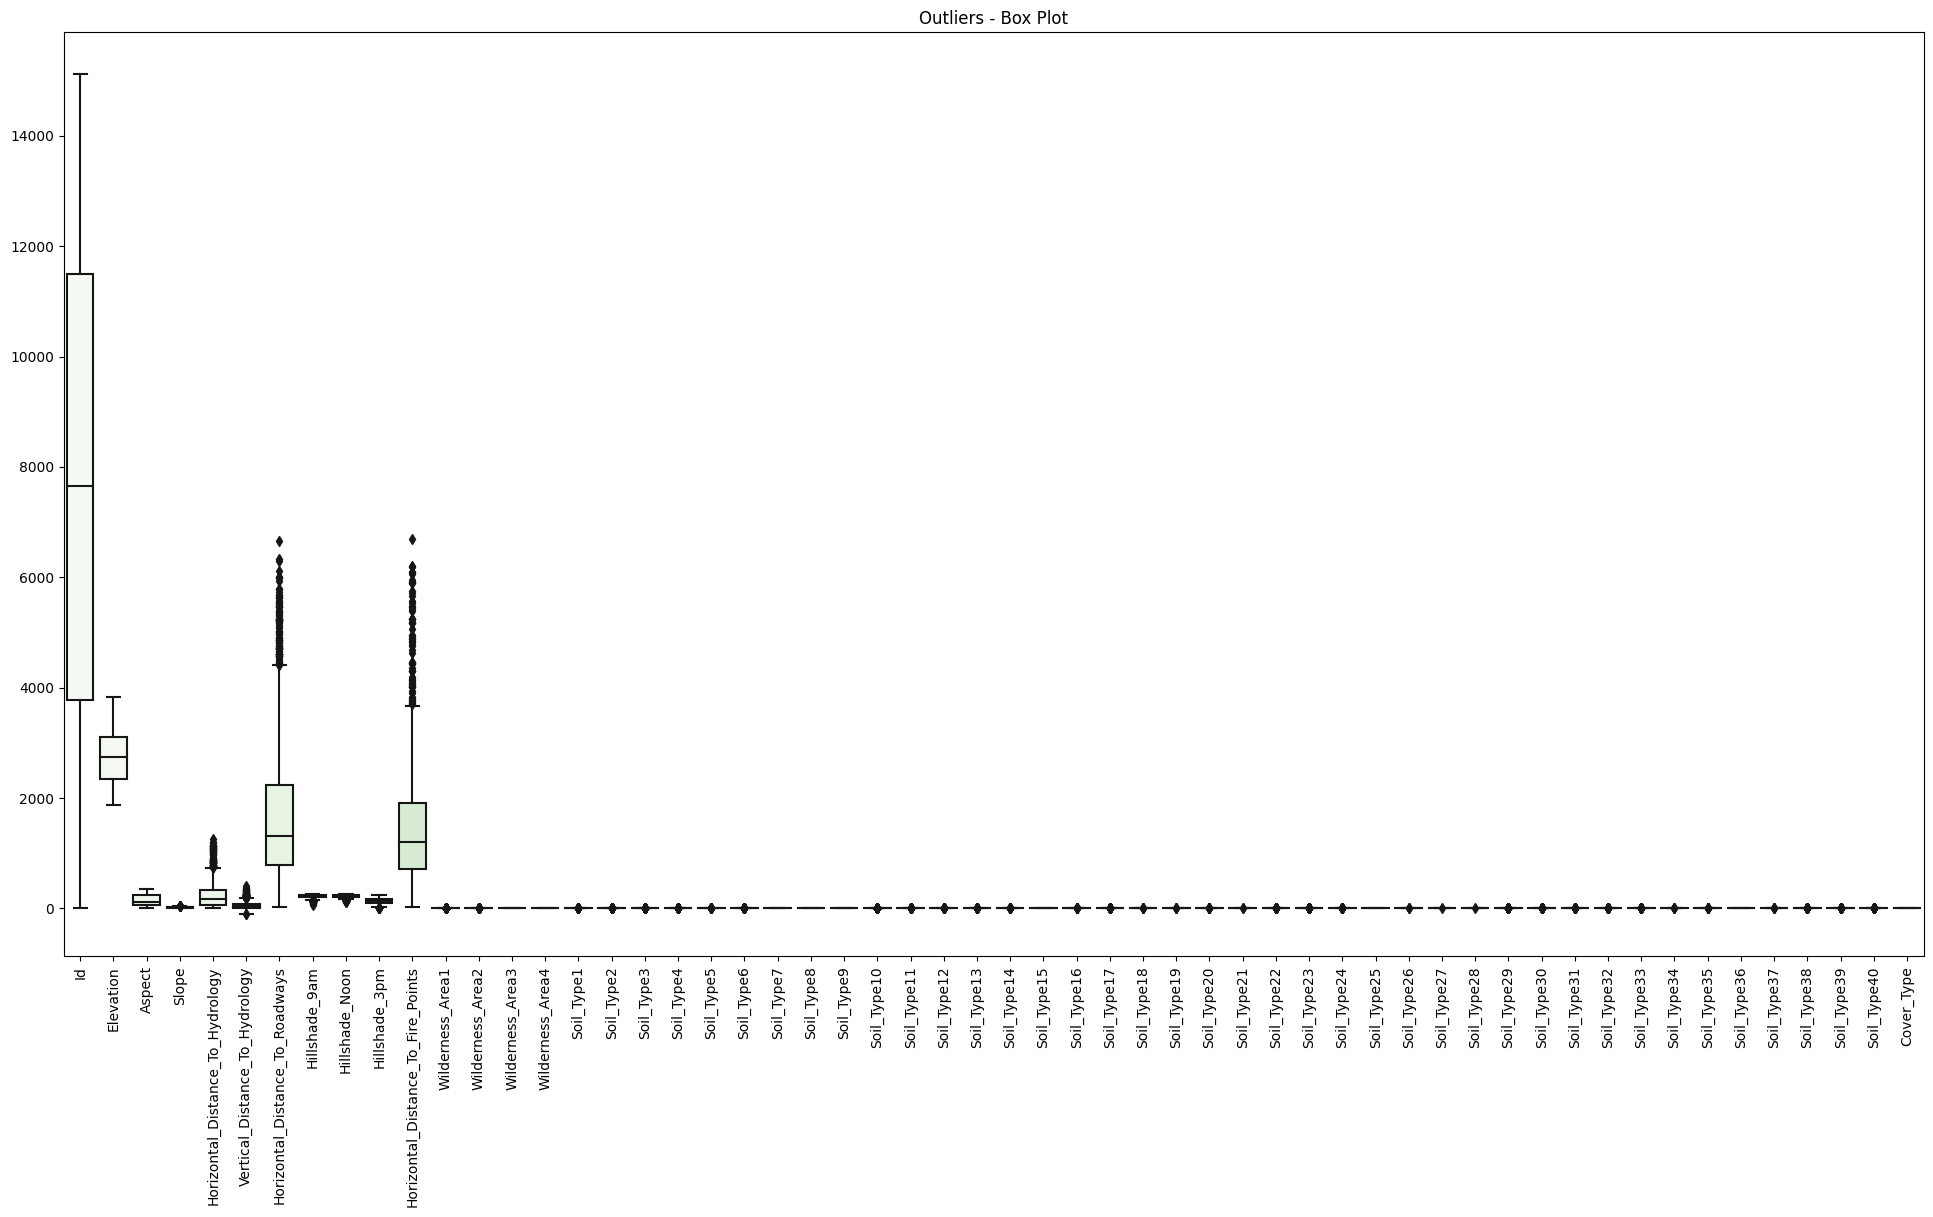

In [ ]:
# Call the functions with the testing datadataset
visualize_outliers(test_data)

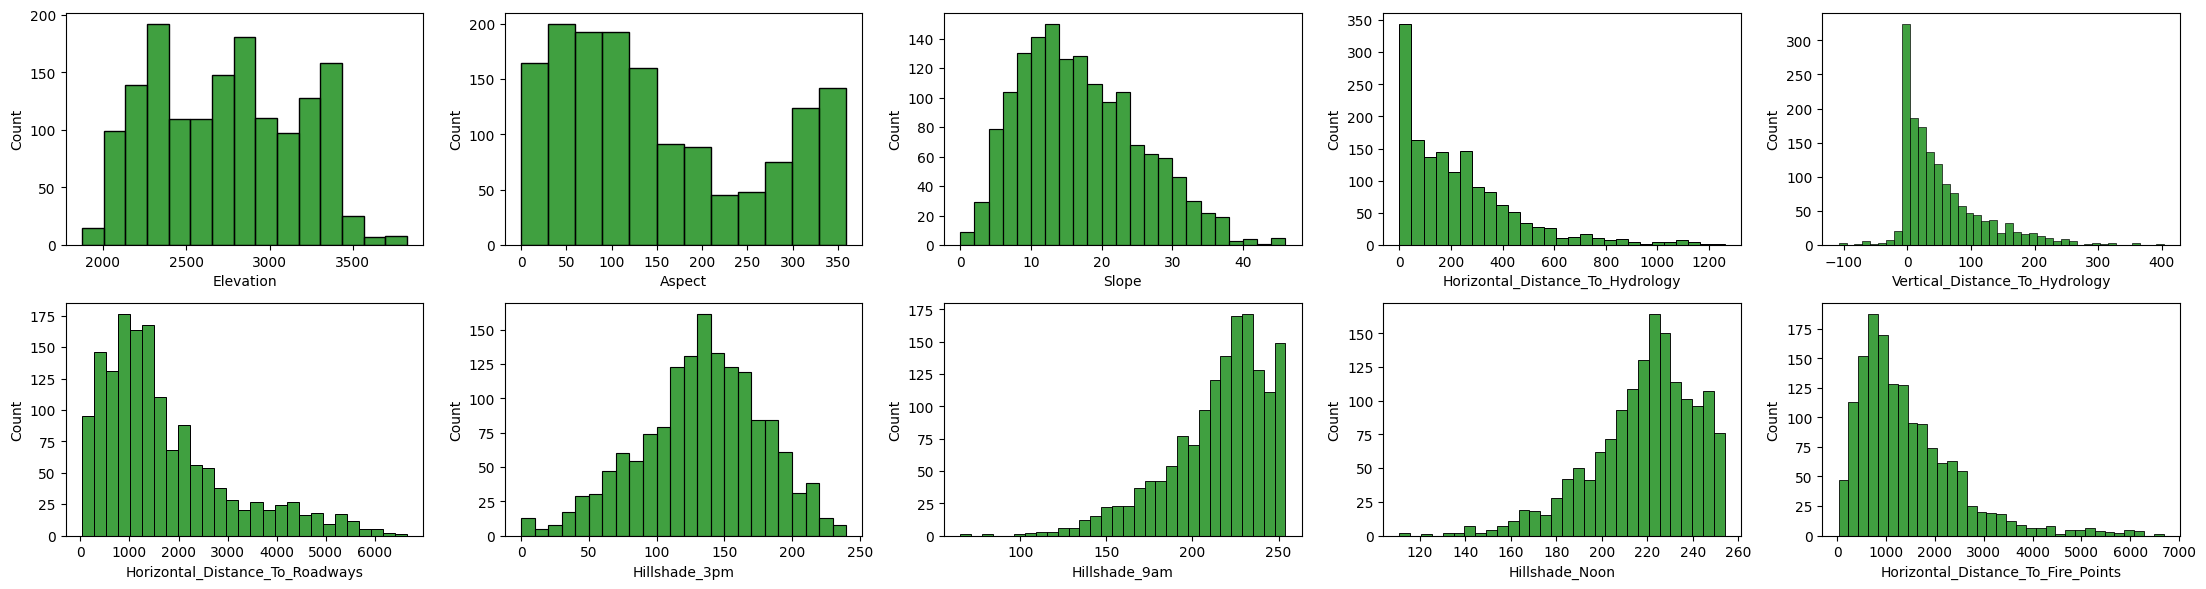

In [ ]:
visualize_feature_distribution(test_data)

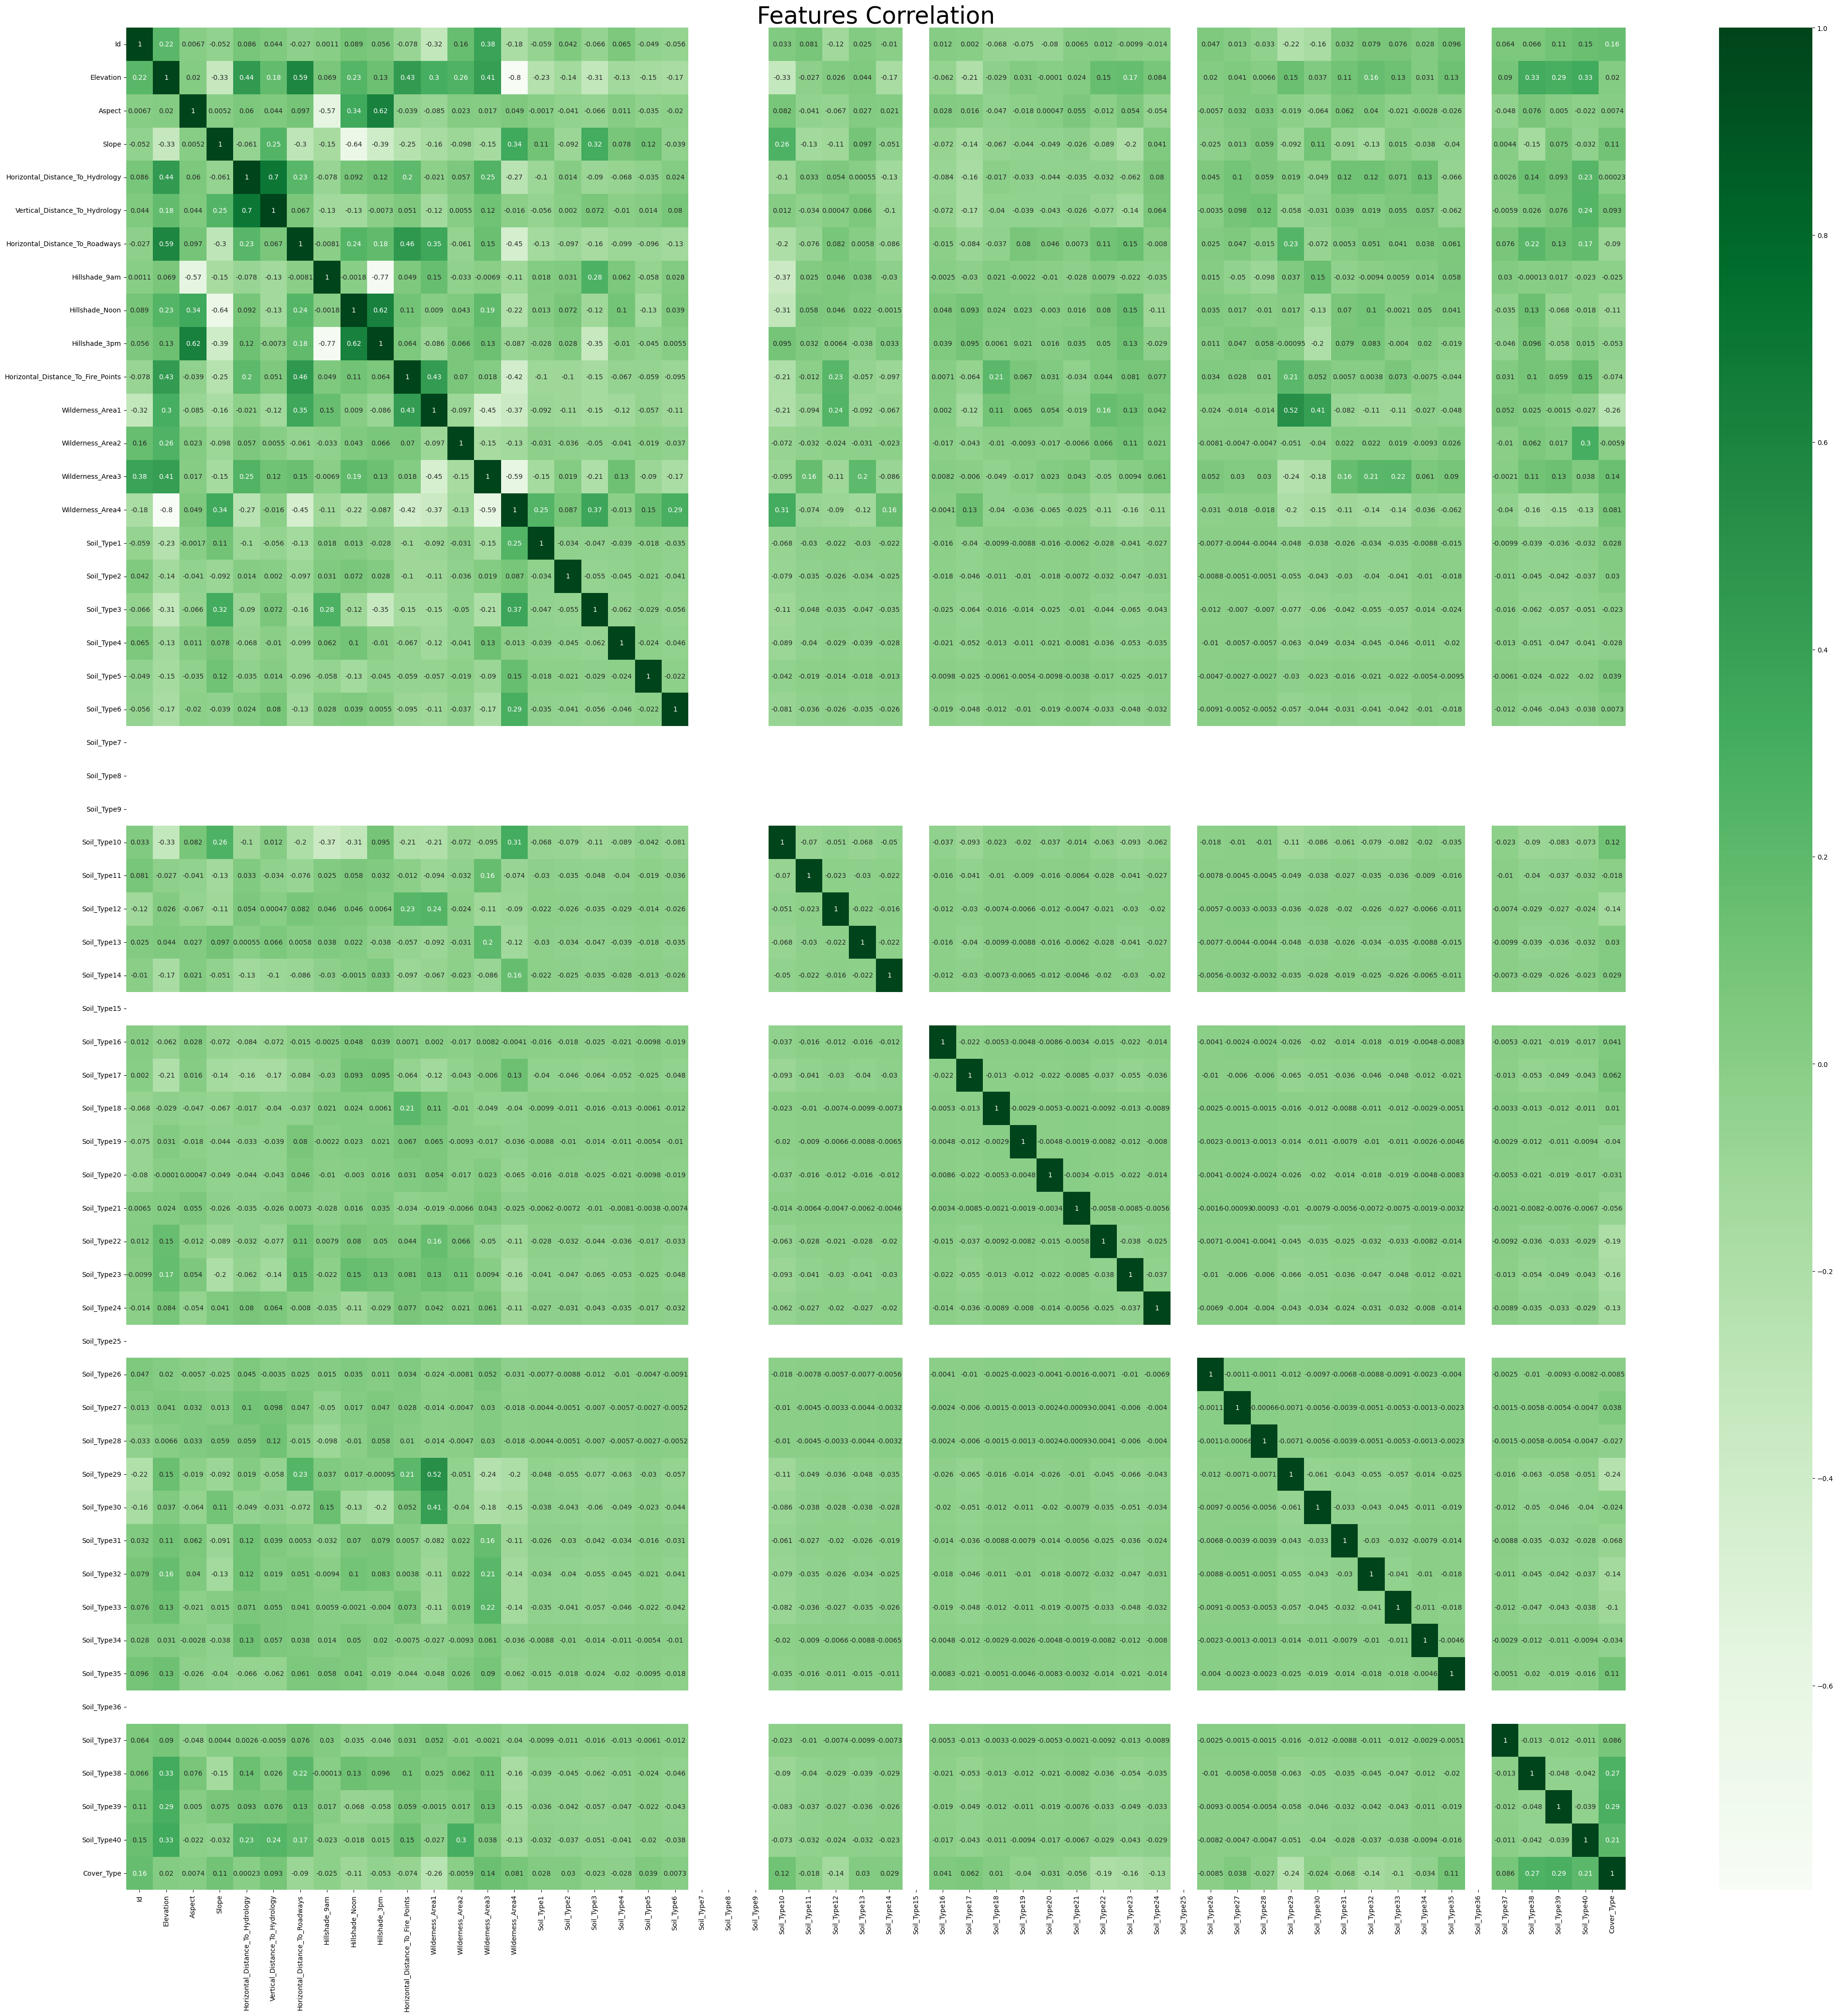

In [ ]:
features_correlation(test_data)

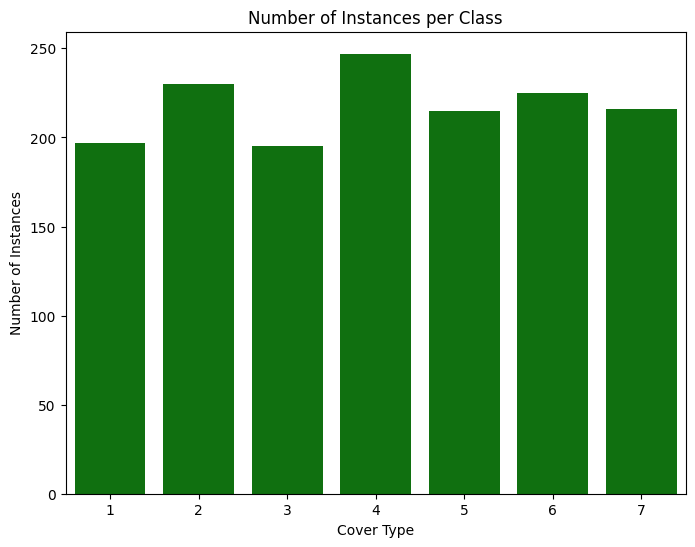

In [ ]:
cover_types_per_class(test_data)

# Identifiy features and target

In [ ]:
#Split the dataset into features (X) and the target variable (y) for each subset of dataset
# for training dataset
X_train = train_data.drop(['Id','Cover_Type'], axis=1)
y_train = train_data['Cover_Type']
# for validation dataset
X_validation = validation_data.drop(['Id','Cover_Type'], axis=1)
y_validation = validation_data['Cover_Type']
# for testing dataset
X_test = test_data.drop(['Id','Cover_Type'], axis=1)
y_test = test_data['Cover_Type']

# Visualize the training and test set to understand problem nature

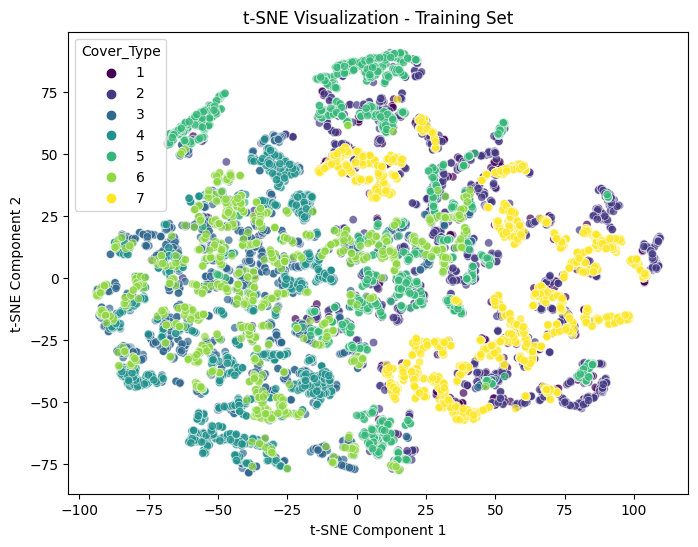

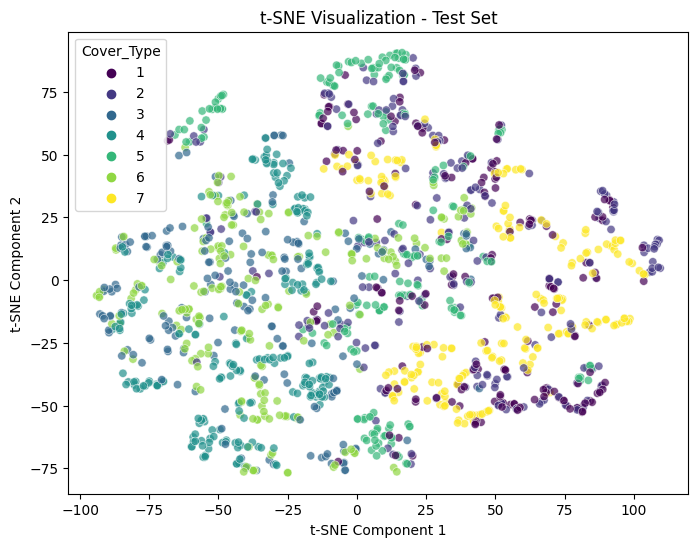

In [ ]:
# create t-SNE plots for both the training and test sets

# Concatenate training and test sets to create a single dataset for t-SNE visualization
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

# Apply t-SNE on the combined dataset to reduce dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_combined)

# Separate t-SNE results back into training and test sets
X_train_tsne = X_tsne[:len(X_train)]
X_test_tsne = X_tsne[len(X_train):]

# Create a scatter plot for t-SNE visualization of training set
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], hue=y_train, palette='viridis', alpha=0.7)
plt.title('t-SNE Visualization - Training Set')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cover_Type', loc='best')
plt.show()

# Create a scatter plot for t-SNE visualization of test set
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test_tsne[:, 0], y=X_test_tsne[:, 1], hue=y_test, palette='viridis', alpha=0.7)
plt.title('t-SNE Visualization - Test Set')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cover_Type', loc='best')
plt.show()


# Q1) Obtain a baseline performance

In [ ]:
#Scale the features (if needed) to ensure consistent ranges across different methods.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.fit_transform(X_validation)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
# Initialize and train each machine learning method on the training data
knn = KNeighborsClassifier(n_jobs=-1)
log_reg = LogisticRegression()
svm = SVC()
dt_classifier = DecisionTreeClassifier()
nb_classifier = GaussianNB()

In [ ]:
# fit the classifiers
knn.fit(X_train_scaled, y_train)
log_reg.fit(X_train_scaled, y_train)
svm.fit(X_train_scaled, y_train)
dt_classifier.fit(X_train_scaled, y_train)
nb_classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GaussianNB()

In [ ]:
# Make predictions on the training data
knn_pred_train = knn.predict(X_train_scaled)
log_reg_pred_train = log_reg.predict(X_train_scaled)
svm_pred_train = svm.predict(X_train_scaled)
dt_pred_train = dt_classifier.predict(X_train_scaled)
nb_pred_train = nb_classifier.predict(X_train)

# Calculate training accuracy for each model
knn_accuracy_train = accuracy_score(y_train, knn_pred_train)
log_reg_accuracy_train = accuracy_score(y_train, log_reg_pred_train)
svm_accuracy_train = accuracy_score(y_train, svm_pred_train)
dt_accuracy_train = accuracy_score(y_train, dt_pred_train)
nb_accuracy_train = accuracy_score(y_train, nb_pred_train)

# display the training accuracy score of each model
print("Training Accuracy of k-Nearest Neighbors:", "{:.3f}".format(knn_accuracy_train))
print("Training Accuracy of Logistic Regression:", "{:.3f}".format(log_reg_accuracy_train))
print("Training Accuracy of Support Vector Machine:", "{:.3f}".format(svm_accuracy_train))
print("Training Accuracy of Decision Tree:", "{:.3f}".format(dt_accuracy_train))
print("Training Accuracy of Naive Bayes:", "{:.3f}".format(nb_accuracy_train))

Training Accuracy of k-Nearest Neighbors: 0.872
Training Accuracy of Logistic Regression: 0.761
Training Accuracy of Support Vector Machine: 0.783
Training Accuracy of Decision Tree: 1.000
Training Accuracy of Naive Bayes: 0.642


In [ ]:
# Make predictions on the test data
knn_pred = knn.predict(X_test_scaled)
log_reg_pred = log_reg.predict(X_test_scaled)
svm_pred = svm.predict(X_test_scaled)
dt_pred = dt_classifier.predict(X_test_scaled)
nb_pred = nb_classifier.predict(X_test)
# Calculate accuracy for each method
knn_accuracy = accuracy_score(y_test, knn_pred)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
nb_accuracy = accuracy_score(y_test, nb_pred)
# print the accuracy score of each model
print("Testing Accuracy of k-Nearest Neighbors:","{:.3f}".format(knn_accuracy))
print("Testing Accuracy of Logistic Regression:","{:.3f}".format(log_reg_accuracy))
print("Testing Accuracy of Support Vector Machine:","{:.3f}".format(svm_accuracy))
print("Testing Accuracy of Decision Tree:","{:.3f}".format(dt_accuracy))
print("Testing Accuracy of Naive Bayes:","{:.3f}".format(nb_accuracy))

Testing Accuracy of k-Nearest Neighbors: 0.730
Testing Accuracy of Logistic Regression: 0.651
Testing Accuracy of Support Vector Machine: 0.687
Testing Accuracy of Decision Tree: 0.755
Testing Accuracy of Naive Bayes: 0.601


In [ ]:
# Make predictions on the validation data
knn_pred_val = knn.predict(X_validation_scaled)
log_reg_pred_val = log_reg.predict(X_validation_scaled)
svm_pred_val = svm.predict(X_validation_scaled)
dt_pred_val = dt_classifier.predict(X_validation_scaled)
nb_pred_val = nb_classifier.predict(X_validation)

# Calculate accuracy for each method on validation data
knn_accuracy_val = accuracy_score(y_validation, knn_pred_val)
log_reg_accuracy_val = accuracy_score(y_validation, log_reg_pred_val)
svm_accuracy_val = accuracy_score(y_validation, svm_pred_val)
dt_accuracy_val = accuracy_score(y_validation, dt_pred_val)
nb_accuracy_val = accuracy_score(y_validation, nb_pred_val)

# display the accuracy score of each model on validation data
print("Validation Accuracy of k-Nearest Neighbors:", "{:.3f}".format(knn_accuracy_val))
print("Validation Accuracy of Logistic Regression:", "{:.3f}".format(log_reg_accuracy_val))
print("Validation Accuracy of Support Vector Machine:", "{:.3f}".format(svm_accuracy_val))
print("Validation Accuracy of Decision Tree:", "{:.3f}".format(dt_accuracy_val))
print("Validation Accuracy of Naive Bayes:", "{:.3f}".format(nb_accuracy_val))

Validation Accuracy of k-Nearest Neighbors: 0.730
Validation Accuracy of Logistic Regression: 0.669
Validation Accuracy of Support Vector Machine: 0.677
Validation Accuracy of Decision Tree: 0.729
Validation Accuracy of Naive Bayes: 0.599


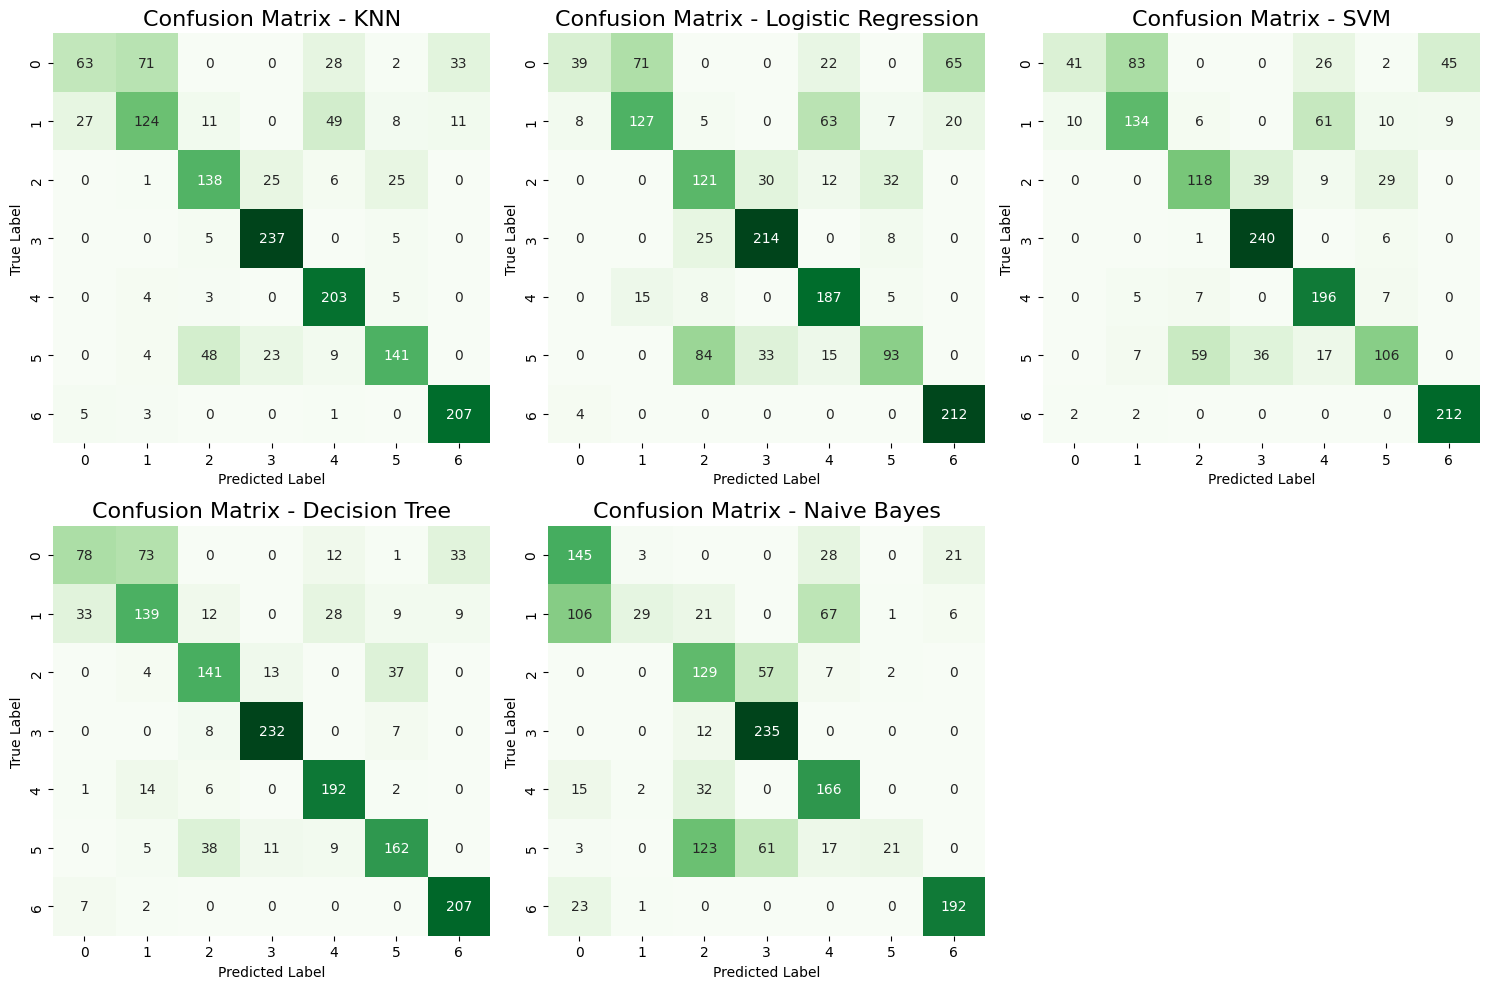

In [ ]:
methods = ['KNN', 'Logistic Regression', 'SVM', 'Decision Tree', 'Naive Bayes']
# prediction of test
predictions = [knn_pred, log_reg_pred, svm_pred, dt_pred, nb_pred]

plt.figure(figsize=(15, 10))
for i, method in enumerate(methods):
    plt.subplot(2, 3, i + 1)
    cm = confusion_matrix(y_test, predictions[i])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
    plt.title(f'Confusion Matrix - {method}',  fontsize=16)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

plt.tight_layout()
plt.show()

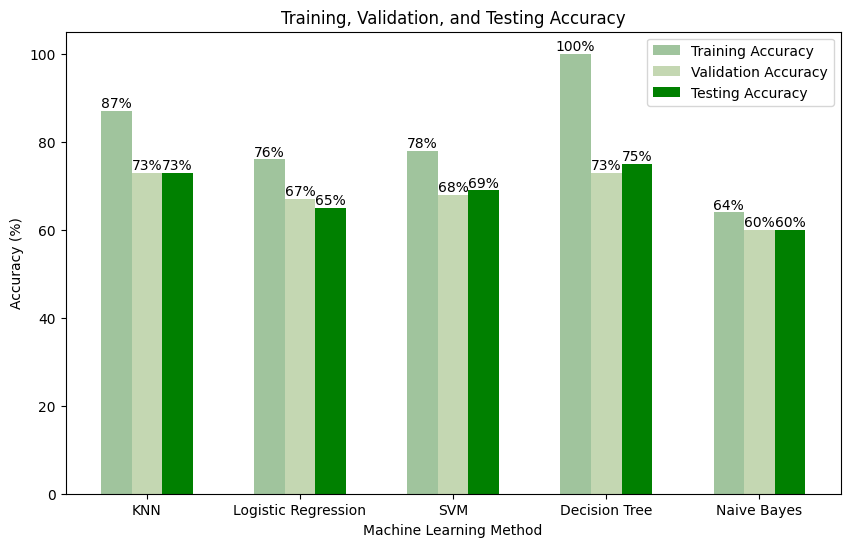

In [ ]:
# display the accuracy scores in a bar chart
training_accuracy = [knn_accuracy_train, log_reg_accuracy_train, svm_accuracy_train, dt_accuracy_train, nb_accuracy_train]
validation_accuracy = [knn_accuracy_val, log_reg_accuracy_val, svm_accuracy_val, dt_accuracy_val, nb_accuracy_val]
testing_accuracy = [knn_accuracy, log_reg_accuracy, svm_accuracy, dt_accuracy, nb_accuracy]

methods = ['KNN', 'Logistic Regression', 'SVM', 'Decision Tree', 'Naive Bayes']

# Convert accuracy_scores to integers
training_accuracy = [round(score * 100) for score in training_accuracy]
validation_accuracy = [round(score * 100) for score in validation_accuracy]
testing_accuracy = [round(score * 100) for score in testing_accuracy]

plt.figure(figsize=(10, 6))
bar_width = 0.2
index = np.arange(len(methods))

plt.bar(index - bar_width, training_accuracy, bar_width, label='Training Accuracy', color='#A0C49D')
plt.bar(index, validation_accuracy, bar_width, label='Validation Accuracy', color='#C4D7B2')
plt.bar(index + bar_width, testing_accuracy, bar_width, label='Testing Accuracy', color='#008000')

# plt.ylim(0, 0)
plt.title('Training, Validation, and Testing Accuracy')
plt.xlabel('Machine Learning Method')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.xticks(index, methods)

# Adding annotations above each bar
for i, acc in enumerate(training_accuracy):
    plt.text(i - bar_width, acc + 0.02, f'{acc}%', ha='center', va='bottom', color='black', fontsize=10)

for i, acc in enumerate(validation_accuracy):
    plt.text(i, acc + 0.02, f'{acc}%', ha='center', va='bottom', color='black', fontsize=10)

for i, acc in enumerate(testing_accuracy):
    plt.text(i + bar_width, acc + 0.02, f'{acc}%', ha='center', va='bottom', color='black', fontsize=10)

plt.show()

Decision Tree is the baseline as it achieves the best performance with highest testing accuracy of 76%

KNN is the second best ML model with 73% of testing accuracy

# Q2) First Improvement strategy : Comparing dimensionality reduction to feature selection

 ## Filter selection using ANOVA
 filter-based approach

In [ ]:
# Filter-based approach: SelectKBest with ANOVA F-test
def select_features(X_train, X_test, y_train, y_test, estimator, num_of_features):
    X_train_selected = SelectKBest(f_classif, k=num_of_features).fit_transform(X_train, y_train)
    X_test_selected = SelectKBest(f_classif, k=num_of_features).fit_transform(X_test, y_test)

    if estimator == 'knn':
        model = knn.fit(X_train_selected, y_train)
        text = 'kNN'
    elif estimator == 'DecisionTree':
        model = DecisionTreeClassifier().fit(X_train_selected, y_train)
        text = 'Decision Tree'

    train_prediction = model.predict(X_train_selected)
    prediction = model.predict(X_test_selected)

    print(f"{text} - Number of selected features: {num_of_features}")
    print(f"{text} Train Accuracy: {accuracy_score(y_train, train_prediction) * 100:.2f}%")
    print(f"{text} Test Accuracy: {accuracy_score(y_test, prediction) * 100:.2f}%")
    print(f"{text} Confusion Matrix: {confusion_matrix(y_test, prediction)}")
    print(f"{text} Report:")
    print(classification_report(y_test, prediction))
    print("-----------------------------------------")

    return accuracy_score(y_test, prediction)

In [ ]:
ms = ["knn", "DecisionTree"]
accuracy_results = {}

for i in range(1,36):
    for m in ms:
        acc = select_features(X_train, X_test, y_train, y_test, m, i)
        if m not in accuracy_results:
            accuracy_results[m] = []
        accuracy_results[m].append(acc)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


kNN - Number of selected features: 1
kNN Train Accuracy: 67.11%
kNN Test Accuracy: 50.62%
kNN Confusion Matrix: [[ 50  54   0   0  25   0  68]
 [ 26  78  17   0  83   8  18]
 [  1   6  83  68  13  24   0]
 [  0   0  72 167   0   8   0]
 [  3  46  15   0 147   4   0]
 [  0   8  88  59  22  48   0]
 [ 14   3   0   0   0   0 199]]
kNN Report:
              precision    recall  f1-score   support

           1       0.53      0.25      0.34       197
           2       0.40      0.34      0.37       230
           3       0.30      0.43      0.35       195
           4       0.57      0.68      0.62       247
           5       0.51      0.68      0.58       215
           6       0.52      0.21      0.30       225
           7       0.70      0.92      0.79       216

    accuracy                           0.51      1525
   macro avg       0.50      0.50      0.48      1525
weighted avg       0.51      0.51      0.48      1525

-----------------------------------------
Decision Tree - Num

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 2
kNN Train Accuracy: 67.69%
kNN Test Accuracy: 50.75%
kNN Confusion Matrix: [[ 50  54   0   0  25   0  68]
 [ 26  78  18   0  83   7  18]
 [  1   5  81  70  13  25   0]
 [  0   0  69 170   0   8   0]
 [  3  46  15   0 147   4   0]
 [  0   8  85  61  22  49   0]
 [ 14   3   0   0   0   0 199]]
kNN Report:
              precision    recall  f1-score   support

           1       0.53      0.25      0.34       197
           2       0.40      0.34      0.37       230
           3       0.30      0.42      0.35       195
           4       0.56      0.69      0.62       247
           5       0.51      0.68      0.58       215
           6       0.53      0.22      0.31       225
           7       0.70      0.92      0.79       216

    accuracy                           0.51      1525
   macro avg       0.50      0.50      0.48      1525
weighted avg       0.51      0.51      0.49      1525

-----------------------------------------
Decision Tree - Num

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 3
kNN Train Accuracy: 76.48%
kNN Test Accuracy: 58.56%
kNN Confusion Matrix: [[ 31  71   0   0  23   0  72]
 [ 21 103  18   0  61   7  20]
 [  0   3  95  43  11  43   0]
 [  0   0  43 195   0   9   0]
 [  0  13  10   0 190   2   0]
 [  0   5  79  55  17  69   0]
 [  6   0   0   0   0   0 210]]
kNN Report:
              precision    recall  f1-score   support

           1       0.53      0.16      0.24       197
           2       0.53      0.45      0.48       230
           3       0.39      0.49      0.43       195
           4       0.67      0.79      0.72       247
           5       0.63      0.88      0.74       215
           6       0.53      0.31      0.39       225
           7       0.70      0.97      0.81       216

    accuracy                           0.59      1525
   macro avg       0.57      0.58      0.55      1525
weighted avg       0.57      0.59      0.55      1525

-----------------------------------------
Decision Tree - Num

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 4
kNN Train Accuracy: 76.49%
kNN Test Accuracy: 58.56%
kNN Confusion Matrix: [[ 31  71   0   0  23   0  72]
 [ 21 103  18   0  61   7  20]
 [  0   3  95  43  11  43   0]
 [  0   0  43 195   0   9   0]
 [  0  13  10   0 190   2   0]
 [  0   5  79  55  17  69   0]
 [  6   0   0   0   0   0 210]]
kNN Report:
              precision    recall  f1-score   support

           1       0.53      0.16      0.24       197
           2       0.53      0.45      0.48       230
           3       0.39      0.49      0.43       195
           4       0.67      0.79      0.72       247
           5       0.63      0.88      0.74       215
           6       0.53      0.31      0.39       225
           7       0.70      0.97      0.81       216

    accuracy                           0.59      1525
   macro avg       0.57      0.58      0.55      1525
weighted avg       0.57      0.59      0.55      1525

-----------------------------------------
Decision Tree - Num

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 5
kNN Train Accuracy: 76.50%
kNN Test Accuracy: 58.62%
kNN Confusion Matrix: [[ 31  71   0   0  23   0  72]
 [ 21 103  18   0  61   7  20]
 [  0   3  95  43  11  43   0]
 [  0   0  42 196   0   9   0]
 [  0  13  10   0 190   2   0]
 [  0   5  79  55  17  69   0]
 [  6   0   0   0   0   0 210]]
kNN Report:
              precision    recall  f1-score   support

           1       0.53      0.16      0.24       197
           2       0.53      0.45      0.48       230
           3       0.39      0.49      0.43       195
           4       0.67      0.79      0.72       247
           5       0.63      0.88      0.74       215
           6       0.53      0.31      0.39       225
           7       0.70      0.97      0.81       216

    accuracy                           0.59      1525
   macro avg       0.57      0.58      0.55      1525
weighted avg       0.57      0.59      0.55      1525

-----------------------------------------
Decision Tree - Num

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 6
kNN Train Accuracy: 76.50%
kNN Test Accuracy: 58.62%
kNN Confusion Matrix: [[ 31  71   0   0  23   0  72]
 [ 21 103  18   0  61   7  20]
 [  0   3  95  43  11  43   0]
 [  0   0  42 196   0   9   0]
 [  0  13  10   0 190   2   0]
 [  0   5  79  55  17  69   0]
 [  6   0   0   0   0   0 210]]
kNN Report:
              precision    recall  f1-score   support

           1       0.53      0.16      0.24       197
           2       0.53      0.45      0.48       230
           3       0.39      0.49      0.43       195
           4       0.67      0.79      0.72       247
           5       0.63      0.88      0.74       215
           6       0.53      0.31      0.39       225
           7       0.70      0.97      0.81       216

    accuracy                           0.59      1525
   macro avg       0.57      0.58      0.55      1525
weighted avg       0.57      0.59      0.55      1525

-----------------------------------------
Decision Tree - Num

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 7
kNN Train Accuracy: 83.15%
kNN Test Accuracy: 37.84%
kNN Confusion Matrix: [[ 49  56   6   0  15   0  71]
 [ 43  61  50   0  37  10  29]
 [  0   0 114  33   7  41   0]
 [  0   0 109 120   0  18   0]
 [  0  15 141   0  39   9  11]
 [  0   0 112  40   8  65   0]
 [ 42  45   0   0   0   0 129]]
kNN Report:
              precision    recall  f1-score   support

           1       0.37      0.25      0.30       197
           2       0.34      0.27      0.30       230
           3       0.21      0.58      0.31       195
           4       0.62      0.49      0.55       247
           5       0.37      0.18      0.24       215
           6       0.45      0.29      0.35       225
           7       0.54      0.60      0.57       216

    accuracy                           0.38      1525
   macro avg       0.42      0.38      0.37      1525
weighted avg       0.42      0.38      0.38      1525

-----------------------------------------
Decision Tree - Num

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 8
kNN Train Accuracy: 83.15%
kNN Test Accuracy: 37.84%
kNN Confusion Matrix: [[ 49  56   6   0  15   0  71]
 [ 43  61  50   0  37  10  29]
 [  0   0 114  33   7  41   0]
 [  0   0 109 120   0  18   0]
 [  0  15 141   0  39   9  11]
 [  0   0 112  40   8  65   0]
 [ 42  45   0   0   0   0 129]]
kNN Report:
              precision    recall  f1-score   support

           1       0.37      0.25      0.30       197
           2       0.34      0.27      0.30       230
           3       0.21      0.58      0.31       195
           4       0.62      0.49      0.55       247
           5       0.37      0.18      0.24       215
           6       0.45      0.29      0.35       225
           7       0.54      0.60      0.57       216

    accuracy                           0.38      1525
   macro avg       0.42      0.38      0.37      1525
weighted avg       0.42      0.38      0.38      1525

-----------------------------------------
Decision Tree - Num

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 9
kNN Train Accuracy: 83.15%
kNN Test Accuracy: 68.00%
kNN Confusion Matrix: [[ 37  72   2   0  21   0  65]
 [ 12 124  15   0  51   8  20]
 [  0   4 117  30   8  36   0]
 [  0   0  16 224   0   7   0]
 [  0   2   6   0 204   3   0]
 [  0   3  49  42  15 116   0]
 [  0   1   0   0   0   0 215]]
kNN Report:
              precision    recall  f1-score   support

           1       0.76      0.19      0.30       197
           2       0.60      0.54      0.57       230
           3       0.57      0.60      0.58       195
           4       0.76      0.91      0.83       247
           5       0.68      0.95      0.79       215
           6       0.68      0.52      0.59       225
           7       0.72      1.00      0.83       216

    accuracy                           0.68      1525
   macro avg       0.68      0.67      0.64      1525
weighted avg       0.68      0.68      0.65      1525

-----------------------------------------
Decision Tree - Num

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 10
kNN Train Accuracy: 83.15%
kNN Test Accuracy: 68.00%
kNN Confusion Matrix: [[ 37  72   2   0  21   0  65]
 [ 12 124  15   0  51   8  20]
 [  0   4 117  30   8  36   0]
 [  0   0  16 224   0   7   0]
 [  0   2   6   0 204   3   0]
 [  0   3  49  42  15 116   0]
 [  0   1   0   0   0   0 215]]
kNN Report:
              precision    recall  f1-score   support

           1       0.76      0.19      0.30       197
           2       0.60      0.54      0.57       230
           3       0.57      0.60      0.58       195
           4       0.76      0.91      0.83       247
           5       0.68      0.95      0.79       215
           6       0.68      0.52      0.59       225
           7       0.72      1.00      0.83       216

    accuracy                           0.68      1525
   macro avg       0.68      0.67      0.64      1525
weighted avg       0.68      0.68      0.65      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 11
kNN Train Accuracy: 83.15%
kNN Test Accuracy: 68.00%
kNN Confusion Matrix: [[ 37  72   2   0  21   0  65]
 [ 12 124  15   0  51   8  20]
 [  0   4 117  30   8  36   0]
 [  0   0  16 224   0   7   0]
 [  0   2   6   0 204   3   0]
 [  0   3  49  42  15 116   0]
 [  0   1   0   0   0   0 215]]
kNN Report:
              precision    recall  f1-score   support

           1       0.76      0.19      0.30       197
           2       0.60      0.54      0.57       230
           3       0.57      0.60      0.58       195
           4       0.76      0.91      0.83       247
           5       0.68      0.95      0.79       215
           6       0.68      0.52      0.59       225
           7       0.72      1.00      0.83       216

    accuracy                           0.68      1525
   macro avg       0.68      0.67      0.64      1525
weighted avg       0.68      0.68      0.65      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 12
kNN Train Accuracy: 86.31%
kNN Test Accuracy: 71.54%
kNN Confusion Matrix: [[ 45  70   2   0  24   0  56]
 [ 21 109  13   0  56  14  17]
 [  0   1 129  32   5  28   0]
 [  0   0   4 243   0   0   0]
 [  0   0   6   0 209   0   0]
 [  0   3  35  32  12 143   0]
 [  0   3   0   0   0   0 213]]
kNN Report:
              precision    recall  f1-score   support

           1       0.68      0.23      0.34       197
           2       0.59      0.47      0.52       230
           3       0.68      0.66      0.67       195
           4       0.79      0.98      0.88       247
           5       0.68      0.97      0.80       215
           6       0.77      0.64      0.70       225
           7       0.74      0.99      0.85       216

    accuracy                           0.72      1525
   macro avg       0.71      0.71      0.68      1525
weighted avg       0.71      0.72      0.69      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 13
kNN Train Accuracy: 86.31%
kNN Test Accuracy: 71.54%
kNN Confusion Matrix: [[ 45  70   2   0  24   0  56]
 [ 21 109  13   0  56  14  17]
 [  0   1 129  32   5  28   0]
 [  0   0   4 243   0   0   0]
 [  0   0   6   0 209   0   0]
 [  0   3  35  32  12 143   0]
 [  0   3   0   0   0   0 213]]
kNN Report:
              precision    recall  f1-score   support

           1       0.68      0.23      0.34       197
           2       0.59      0.47      0.52       230
           3       0.68      0.66      0.67       195
           4       0.79      0.98      0.88       247
           5       0.68      0.97      0.80       215
           6       0.77      0.64      0.70       225
           7       0.74      0.99      0.85       216

    accuracy                           0.72      1525
   macro avg       0.71      0.71      0.68      1525
weighted avg       0.71      0.72      0.69      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 14
kNN Train Accuracy: 87.46%
kNN Test Accuracy: 31.61%
kNN Confusion Matrix: [[ 25  42   0   0 118   0  12]
 [ 10  44   1   1 170   4   0]
 [  0   0  76  58  46  15   0]
 [  0   0 144  90   0  13   0]
 [  2  10   1   5 197   0   0]
 [  0   0  77  49  65  34   0]
 [ 61  99   0   0  40   0  16]]
kNN Report:
              precision    recall  f1-score   support

           1       0.26      0.13      0.17       197
           2       0.23      0.19      0.21       230
           3       0.25      0.39      0.31       195
           4       0.44      0.36      0.40       247
           5       0.31      0.92      0.46       215
           6       0.52      0.15      0.23       225
           7       0.57      0.07      0.13       216

    accuracy                           0.32      1525
   macro avg       0.37      0.32      0.27      1525
weighted avg       0.37      0.32      0.28      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 15
kNN Train Accuracy: 87.46%
kNN Test Accuracy: 31.61%
kNN Confusion Matrix: [[ 25  42   0   0 118   0  12]
 [ 10  44   1   1 170   4   0]
 [  0   0  76  58  46  15   0]
 [  0   0 144  90   0  13   0]
 [  2  10   1   5 197   0   0]
 [  0   0  77  49  65  34   0]
 [ 61  99   0   0  40   0  16]]
kNN Report:
              precision    recall  f1-score   support

           1       0.26      0.13      0.17       197
           2       0.23      0.19      0.21       230
           3       0.25      0.39      0.31       195
           4       0.44      0.36      0.40       247
           5       0.31      0.92      0.46       215
           6       0.52      0.15      0.23       225
           7       0.57      0.07      0.13       216

    accuracy                           0.32      1525
   macro avg       0.37      0.32      0.27      1525
weighted avg       0.37      0.32      0.28      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 16
kNN Train Accuracy: 87.53%
kNN Test Accuracy: 72.46%
kNN Confusion Matrix: [[ 44  69   2   0  25   0  57]
 [ 21 107  13   0  57  14  18]
 [  0   2 135  28   4  26   0]
 [  0   0   2 245   0   0   0]
 [  0   0   5   0 210   0   0]
 [  0   3  31  30  10 151   0]
 [  0   3   0   0   0   0 213]]
kNN Report:
              precision    recall  f1-score   support

           1       0.68      0.22      0.34       197
           2       0.58      0.47      0.52       230
           3       0.72      0.69      0.70       195
           4       0.81      0.99      0.89       247
           5       0.69      0.98      0.81       215
           6       0.79      0.67      0.73       225
           7       0.74      0.99      0.85       216

    accuracy                           0.72      1525
   macro avg       0.71      0.72      0.69      1525
weighted avg       0.72      0.72      0.70      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 17
kNN Train Accuracy: 87.53%
kNN Test Accuracy: 72.46%
kNN Confusion Matrix: [[ 44  69   2   0  25   0  57]
 [ 21 107  13   0  57  14  18]
 [  0   2 135  28   4  26   0]
 [  0   0   2 245   0   0   0]
 [  0   0   5   0 210   0   0]
 [  0   3  31  30  10 151   0]
 [  0   3   0   0   0   0 213]]
kNN Report:
              precision    recall  f1-score   support

           1       0.68      0.22      0.34       197
           2       0.58      0.47      0.52       230
           3       0.72      0.69      0.70       195
           4       0.81      0.99      0.89       247
           5       0.69      0.98      0.81       215
           6       0.79      0.67      0.73       225
           7       0.74      0.99      0.85       216

    accuracy                           0.72      1525
   macro avg       0.71      0.72      0.69      1525
weighted avg       0.72      0.72      0.70      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 18
kNN Train Accuracy: 87.53%
kNN Test Accuracy: 72.46%
kNN Confusion Matrix: [[ 44  69   2   0  25   0  57]
 [ 21 107  13   0  57  14  18]
 [  0   2 135  28   4  26   0]
 [  0   0   2 245   0   0   0]
 [  0   0   5   0 210   0   0]
 [  0   3  31  30  10 151   0]
 [  0   3   0   0   0   0 213]]
kNN Report:
              precision    recall  f1-score   support

           1       0.68      0.22      0.34       197
           2       0.58      0.47      0.52       230
           3       0.72      0.69      0.70       195
           4       0.81      0.99      0.89       247
           5       0.69      0.98      0.81       215
           6       0.79      0.67      0.73       225
           7       0.74      0.99      0.85       216

    accuracy                           0.72      1525
   macro avg       0.71      0.72      0.69      1525
weighted avg       0.72      0.72      0.70      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 19
kNN Train Accuracy: 87.53%
kNN Test Accuracy: 72.46%
kNN Confusion Matrix: [[ 44  69   2   0  25   0  57]
 [ 21 107  13   0  57  14  18]
 [  0   2 135  28   4  26   0]
 [  0   0   2 245   0   0   0]
 [  0   0   5   0 210   0   0]
 [  0   3  31  30  10 151   0]
 [  0   3   0   0   0   0 213]]
kNN Report:
              precision    recall  f1-score   support

           1       0.68      0.22      0.34       197
           2       0.58      0.47      0.52       230
           3       0.72      0.69      0.70       195
           4       0.81      0.99      0.89       247
           5       0.69      0.98      0.81       215
           6       0.79      0.67      0.73       225
           7       0.74      0.99      0.85       216

    accuracy                           0.72      1525
   macro avg       0.71      0.72      0.69      1525
weighted avg       0.72      0.72      0.70      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 20
kNN Train Accuracy: 87.53%
kNN Test Accuracy: 72.46%
kNN Confusion Matrix: [[ 44  69   2   0  25   0  57]
 [ 21 107  13   0  57  14  18]
 [  0   2 135  28   4  26   0]
 [  0   0   2 245   0   0   0]
 [  0   0   5   0 210   0   0]
 [  0   3  31  30  10 151   0]
 [  0   3   0   0   0   0 213]]
kNN Report:
              precision    recall  f1-score   support

           1       0.68      0.22      0.34       197
           2       0.58      0.47      0.52       230
           3       0.72      0.69      0.70       195
           4       0.81      0.99      0.89       247
           5       0.69      0.98      0.81       215
           6       0.79      0.67      0.73       225
           7       0.74      0.99      0.85       216

    accuracy                           0.72      1525
   macro avg       0.71      0.72      0.69      1525
weighted avg       0.72      0.72      0.70      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 21
kNN Train Accuracy: 87.53%
kNN Test Accuracy: 72.46%
kNN Confusion Matrix: [[ 44  69   2   0  25   0  57]
 [ 21 107  13   0  57  14  18]
 [  0   2 135  28   4  26   0]
 [  0   0   2 245   0   0   0]
 [  0   0   5   0 210   0   0]
 [  0   3  31  30  10 151   0]
 [  0   3   0   0   0   0 213]]
kNN Report:
              precision    recall  f1-score   support

           1       0.68      0.22      0.34       197
           2       0.58      0.47      0.52       230
           3       0.72      0.69      0.70       195
           4       0.81      0.99      0.89       247
           5       0.69      0.98      0.81       215
           6       0.79      0.67      0.73       225
           7       0.74      0.99      0.85       216

    accuracy                           0.72      1525
   macro avg       0.71      0.72      0.69      1525
weighted avg       0.72      0.72      0.70      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 22
kNN Train Accuracy: 88.04%
kNN Test Accuracy: 37.51%
kNN Confusion Matrix: [[ 52  89  11   0   8   2  35]
 [ 32 101  42   2   8  33  12]
 [  1   3 116  27   1  47   0]
 [  0   0  88 134   0  25   0]
 [  3  24 141   0   9  33   5]
 [  0   4 124  39   2  56   0]
 [ 50  62   0   0   0   0 104]]
kNN Report:
              precision    recall  f1-score   support

           1       0.38      0.26      0.31       197
           2       0.36      0.44      0.39       230
           3       0.22      0.59      0.32       195
           4       0.66      0.54      0.60       247
           5       0.32      0.04      0.07       215
           6       0.29      0.25      0.27       225
           7       0.67      0.48      0.56       216

    accuracy                           0.38      1525
   macro avg       0.41      0.37      0.36      1525
weighted avg       0.42      0.38      0.37      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 23
kNN Train Accuracy: 88.04%
kNN Test Accuracy: 73.70%
kNN Confusion Matrix: [[ 46  70   2   0  25   0  54]
 [ 20 111  13   0  54  13  19]
 [  0   0 139  24   6  26   0]
 [  0   0   1 246   0   0   0]
 [  0   0   4   0 211   0   0]
 [  0   2  28  27  10 158   0]
 [  0   3   0   0   0   0 213]]
kNN Report:
              precision    recall  f1-score   support

           1       0.70      0.23      0.35       197
           2       0.60      0.48      0.53       230
           3       0.74      0.71      0.73       195
           4       0.83      1.00      0.90       247
           5       0.69      0.98      0.81       215
           6       0.80      0.70      0.75       225
           7       0.74      0.99      0.85       216

    accuracy                           0.74      1525
   macro avg       0.73      0.73      0.70      1525
weighted avg       0.73      0.74      0.71      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 24
kNN Train Accuracy: 88.04%
kNN Test Accuracy: 40.66%
kNN Confusion Matrix: [[ 57  57   2   0  29   1  51]
 [ 37  76  44   0  38  13  22]
 [  0   1 122  24   5  43   0]
 [  0   0  75 150   0  22   0]
 [  1  44 114   0  43   9   4]
 [  0   2 116  41   7  59   0]
 [ 59  44   0   0   0   0 113]]
kNN Report:
              precision    recall  f1-score   support

           1       0.37      0.29      0.32       197
           2       0.34      0.33      0.33       230
           3       0.26      0.63      0.37       195
           4       0.70      0.61      0.65       247
           5       0.35      0.20      0.26       215
           6       0.40      0.26      0.32       225
           7       0.59      0.52      0.56       216

    accuracy                           0.41      1525
   macro avg       0.43      0.41      0.40      1525
weighted avg       0.44      0.41      0.41      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 25
kNN Train Accuracy: 88.04%
kNN Test Accuracy: 40.66%
kNN Confusion Matrix: [[ 57  57   2   0  29   1  51]
 [ 37  76  44   0  38  13  22]
 [  0   1 122  24   5  43   0]
 [  0   0  75 150   0  22   0]
 [  1  44 114   0  43   9   4]
 [  0   2 116  41   7  59   0]
 [ 59  44   0   0   0   0 113]]
kNN Report:
              precision    recall  f1-score   support

           1       0.37      0.29      0.32       197
           2       0.34      0.33      0.33       230
           3       0.26      0.63      0.37       195
           4       0.70      0.61      0.65       247
           5       0.35      0.20      0.26       215
           6       0.40      0.26      0.32       225
           7       0.59      0.52      0.56       216

    accuracy                           0.41      1525
   macro avg       0.43      0.41      0.40      1525
weighted avg       0.44      0.41      0.41      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 26
kNN Train Accuracy: 88.04%
kNN Test Accuracy: 40.66%
kNN Confusion Matrix: [[ 57  57   2   0  29   1  51]
 [ 37  76  44   0  38  13  22]
 [  0   1 122  24   5  43   0]
 [  0   0  75 150   0  22   0]
 [  1  44 114   0  43   9   4]
 [  0   2 116  41   7  59   0]
 [ 59  44   0   0   0   0 113]]
kNN Report:
              precision    recall  f1-score   support

           1       0.37      0.29      0.32       197
           2       0.34      0.33      0.33       230
           3       0.26      0.63      0.37       195
           4       0.70      0.61      0.65       247
           5       0.35      0.20      0.26       215
           6       0.40      0.26      0.32       225
           7       0.59      0.52      0.56       216

    accuracy                           0.41      1525
   macro avg       0.43      0.41      0.40      1525
weighted avg       0.44      0.41      0.41      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 27
kNN Train Accuracy: 88.04%
kNN Test Accuracy: 40.66%
kNN Confusion Matrix: [[ 57  57   2   0  29   1  51]
 [ 37  76  44   0  38  13  22]
 [  0   1 122  24   5  43   0]
 [  0   0  75 150   0  22   0]
 [  1  44 114   0  43   9   4]
 [  0   2 116  41   7  59   0]
 [ 59  44   0   0   0   0 113]]
kNN Report:
              precision    recall  f1-score   support

           1       0.37      0.29      0.32       197
           2       0.34      0.33      0.33       230
           3       0.26      0.63      0.37       195
           4       0.70      0.61      0.65       247
           5       0.35      0.20      0.26       215
           6       0.40      0.26      0.32       225
           7       0.59      0.52      0.56       216

    accuracy                           0.41      1525
   macro avg       0.43      0.41      0.40      1525
weighted avg       0.44      0.41      0.41      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 28
kNN Train Accuracy: 88.29%
kNN Test Accuracy: 74.30%
kNN Confusion Matrix: [[ 45  71   1   0  24   0  56]
 [ 19 116  11   0  54  13  17]
 [  0   0 140  23   6  26   0]
 [  0   0   1 246   0   0   0]
 [  0   0   4   0 211   0   0]
 [  0   1  26  25  11 162   0]
 [  0   3   0   0   0   0 213]]
kNN Report:
              precision    recall  f1-score   support

           1       0.70      0.23      0.34       197
           2       0.61      0.50      0.55       230
           3       0.77      0.72      0.74       195
           4       0.84      1.00      0.91       247
           5       0.69      0.98      0.81       215
           6       0.81      0.72      0.76       225
           7       0.74      0.99      0.85       216

    accuracy                           0.74      1525
   macro avg       0.74      0.73      0.71      1525
weighted avg       0.74      0.74      0.72      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 29
kNN Train Accuracy: 88.29%
kNN Test Accuracy: 74.30%
kNN Confusion Matrix: [[ 45  71   1   0  24   0  56]
 [ 19 116  11   0  54  13  17]
 [  0   0 140  23   6  26   0]
 [  0   0   1 246   0   0   0]
 [  0   0   4   0 211   0   0]
 [  0   1  26  25  11 162   0]
 [  0   3   0   0   0   0 213]]
kNN Report:
              precision    recall  f1-score   support

           1       0.70      0.23      0.34       197
           2       0.61      0.50      0.55       230
           3       0.77      0.72      0.74       195
           4       0.84      1.00      0.91       247
           5       0.69      0.98      0.81       215
           6       0.81      0.72      0.76       225
           7       0.74      0.99      0.85       216

    accuracy                           0.74      1525
   macro avg       0.74      0.73      0.71      1525
weighted avg       0.74      0.74      0.72      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 30
kNN Train Accuracy: 88.29%
kNN Test Accuracy: 74.30%
kNN Confusion Matrix: [[ 45  71   1   0  24   0  56]
 [ 19 116  11   0  54  13  17]
 [  0   0 140  23   6  26   0]
 [  0   0   1 246   0   0   0]
 [  0   0   4   0 211   0   0]
 [  0   1  26  25  11 162   0]
 [  0   3   0   0   0   0 213]]
kNN Report:
              precision    recall  f1-score   support

           1       0.70      0.23      0.34       197
           2       0.61      0.50      0.55       230
           3       0.77      0.72      0.74       195
           4       0.84      1.00      0.91       247
           5       0.69      0.98      0.81       215
           6       0.81      0.72      0.76       225
           7       0.74      0.99      0.85       216

    accuracy                           0.74      1525
   macro avg       0.74      0.73      0.71      1525
weighted avg       0.74      0.74      0.72      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 31
kNN Train Accuracy: 88.38%
kNN Test Accuracy: 24.52%
kNN Confusion Matrix: [[  1  16 121   0   3   0  56]
 [  1   7 197   0   3   2  20]
 [  0   0 194   1   0   0   0]
 [  0   0 247   0   0   0   0]
 [  0   0 215   0   0   0   0]
 [  0   0 225   0   0   0   0]
 [  0   5  39   0   0   0 172]]
kNN Report:
              precision    recall  f1-score   support

           1       0.50      0.01      0.01       197
           2       0.25      0.03      0.05       230
           3       0.16      0.99      0.27       195
           4       0.00      0.00      0.00       247
           5       0.00      0.00      0.00       215
           6       0.00      0.00      0.00       225
           7       0.69      0.80      0.74       216

    accuracy                           0.25      1525
   macro avg       0.23      0.26      0.15      1525
weighted avg       0.22      0.25      0.15      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 32
kNN Train Accuracy: 88.38%
kNN Test Accuracy: 24.52%
kNN Confusion Matrix: [[  1  16 121   0   3   0  56]
 [  1   7 197   0   3   2  20]
 [  0   0 194   1   0   0   0]
 [  0   0 247   0   0   0   0]
 [  0   0 215   0   0   0   0]
 [  0   0 225   0   0   0   0]
 [  0   5  39   0   0   0 172]]
kNN Report:
              precision    recall  f1-score   support

           1       0.50      0.01      0.01       197
           2       0.25      0.03      0.05       230
           3       0.16      0.99      0.27       195
           4       0.00      0.00      0.00       247
           5       0.00      0.00      0.00       215
           6       0.00      0.00      0.00       225
           7       0.69      0.80      0.74       216

    accuracy                           0.25      1525
   macro avg       0.23      0.26      0.15      1525
weighted avg       0.22      0.25      0.15      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

Decision Tree Confusion Matrix: [[ 34 110   0   0  31   0  22]
 [ 12 109   7   3  82   7  10]
 [  0  36 111   5   6  37   0]
 [  0   1  69   9   0 168   0]
 [  7  51   6   1 139  11   0]
 [  2  71  83  13  17  39   0]
 [143  18   0   0   0   0  55]]
Decision Tree Report:
              precision    recall  f1-score   support

           1       0.17      0.17      0.17       197
           2       0.28      0.47      0.35       230
           3       0.40      0.57      0.47       195
           4       0.29      0.04      0.06       247
           5       0.51      0.65      0.57       215
           6       0.15      0.17      0.16       225
           7       0.63      0.25      0.36       216

    accuracy                           0.33      1525
   macro avg       0.35      0.33      0.31      1525
weighted avg       0.34      0.33      0.30      1525

-----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


kNN - Number of selected features: 33
kNN Train Accuracy: 88.38%
kNN Test Accuracy: 74.03%
kNN Confusion Matrix: [[ 49  68   1   0  26   0  53]
 [ 20 114  14   0  54  13  15]
 [  0   0 136  27   7  25   0]
 [  0   0   1 246   0   0   0]
 [  0   0   4   0 211   0   0]
 [  0   1  26  25  13 160   0]
 [  0   3   0   0   0   0 213]]
kNN Report:
              precision    recall  f1-score   support

           1       0.71      0.25      0.37       197
           2       0.61      0.50      0.55       230
           3       0.75      0.70      0.72       195
           4       0.83      1.00      0.90       247
           5       0.68      0.98      0.80       215
           6       0.81      0.71      0.76       225
           7       0.76      0.99      0.86       216

    accuracy                           0.74      1525
   macro avg       0.73      0.73      0.71      1525
weighted avg       0.74      0.74      0.71      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 34
kNN Train Accuracy: 88.53%
kNN Test Accuracy: 22.82%
kNN Confusion Matrix: [[  0  36 123   0  11   0  27]
 [  0  31 189   0   7   0   3]
 [  0   0 177  17   0   1   0]
 [  0   0 245   2   0   0   0]
 [  0  15 197   1   0   2   0]
 [  0   0 220   5   0   0   0]
 [  0  25  51   0   2   0 138]]
kNN Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       197
           2       0.29      0.13      0.18       230
           3       0.15      0.91      0.25       195
           4       0.08      0.01      0.01       247
           5       0.00      0.00      0.00       215
           6       0.00      0.00      0.00       225
           7       0.82      0.64      0.72       216

    accuracy                           0.23      1525
   macro avg       0.19      0.24      0.17      1525
weighted avg       0.19      0.23      0.16      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selectio

kNN - Number of selected features: 35
kNN Train Accuracy: 88.53%
kNN Test Accuracy: 22.82%
kNN Confusion Matrix: [[  0  36 123   0  11   0  27]
 [  0  31 189   0   7   0   3]
 [  0   0 177  17   0   1   0]
 [  0   0 245   2   0   0   0]
 [  0  15 197   1   0   2   0]
 [  0   0 220   5   0   0   0]
 [  0  25  51   0   2   0 138]]
kNN Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       197
           2       0.29      0.13      0.18       230
           3       0.15      0.91      0.25       195
           4       0.08      0.01      0.01       247
           5       0.00      0.00      0.00       215
           6       0.00      0.00      0.00       225
           7       0.82      0.64      0.72       216

    accuracy                           0.23      1525
   macro avg       0.19      0.24      0.17      1525
weighted avg       0.19      0.23      0.16      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selectio

In [ ]:
accuracy_results

{'knn': [0.5062295081967213,
  0.5075409836065574,
  0.5855737704918033,
  0.5855737704918033,
  0.5862295081967213,
  0.5862295081967213,
  0.37836065573770494,
  0.37836065573770494,
  0.68,
  0.68,
  0.68,
  0.7154098360655737,
  0.7154098360655737,
  0.3160655737704918,
  0.3160655737704918,
  0.7245901639344262,
  0.7245901639344262,
  0.7245901639344262,
  0.7245901639344262,
  0.7245901639344262,
  0.7245901639344262,
  0.37508196721311476,
  0.7370491803278688,
  0.4065573770491803,
  0.4065573770491803,
  0.4065573770491803,
  0.4065573770491803,
  0.7429508196721312,
  0.7429508196721312,
  0.7429508196721312,
  0.24524590163934426,
  0.24524590163934426,
  0.740327868852459,
  0.22819672131147542,
  0.22819672131147542],
 'DecisionTree': [0.519344262295082,
  0.520655737704918,
  0.5527868852459017,
  0.540327868852459,
  0.5659016393442623,
  0.6544262295081967,
  0.47737704918032786,
  0.4760655737704918,
  0.7134426229508197,
  0.7140983606557377,
  0.718688524590164,
  0

In [ ]:
max(accuracy_results["DecisionTree"])

0.76

In [ ]:
max(accuracy_results["knn"])

0.7429508196721312

In [ ]:
len(accuracy_results["knn"])

35

In [ ]:
length = max(1, len(accuracy_results["knn"]))
baseline_knn = [knn_accuracy]*length
len(baseline_knn)

35

In [ ]:
length = max(1, len(accuracy_results["DecisionTree"]))
baseline_dt = [dt_accuracy]*length
len(baseline_dt)

35

In [ ]:
def k_accuracies(baseline, model,title):
    fig, ax = plt.subplots()
    x_axis = range(1, 36)
    ax.plot(x_axis, model, marker='.', label='Accuracy', color='#008000')
    ax.plot(x_axis ,baseline ,color='#E7B10A', linestyle='dotted',linewidth=2, label="Basline")
    plt.title(title,fontsize=16)
    plt.xlabel("Number of Features", fontsize=16)
    plt.ylabel("Accuracy", fontsize=16)
    plt.legend()
    plt.show()

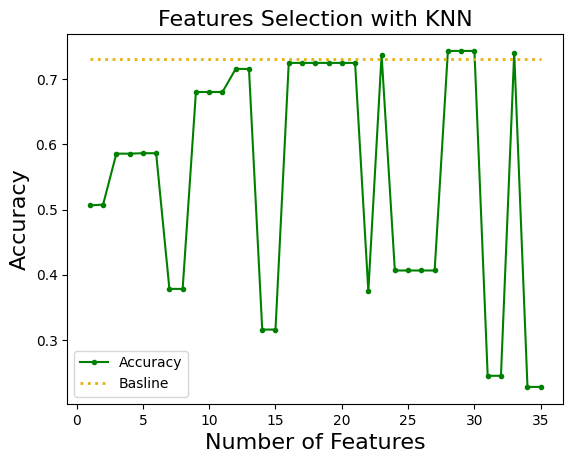

In [ ]:
k_accuracies(baseline_knn,accuracy_results["knn"],'Features Selection with KNN')

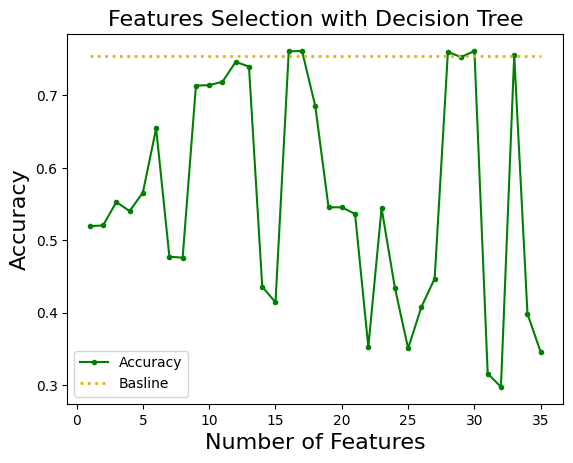

In [ ]:
k_accuracies(baseline_dt,accuracy_results["DecisionTree"],'Features Selection with Decision Tree')

In [ ]:
from pprint import pprint
accuracy_results = {}
selected_features = {}

for i in range(1, 36):
    for m in ms:
        acc = select_features(X_train, X_test, y_train, y_test, m, i)
        if m not in accuracy_results:
            accuracy_results[m] = []
        accuracy_results[m].append(acc)

        # Store the selected features when achieving the maximum accuracy
        if acc == max(accuracy_results[m]):
            selected_features[m] = i

# Print the k value of the maximum accuracy score for each model
for m, max_k in selected_features.items():
    print(f"Model: {m}, Max Accuracy at k={max_k}")

# If you want to print the dictionary with a more readable format, use pprint
print("Selected Features:")
pprint(selected_features)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


kNN - Number of selected features: 1
kNN Train Accuracy: 67.11%
kNN Test Accuracy: 50.62%
kNN Confusion Matrix: [[ 50  54   0   0  25   0  68]
 [ 26  78  17   0  83   8  18]
 [  1   6  83  68  13  24   0]
 [  0   0  72 167   0   8   0]
 [  3  46  15   0 147   4   0]
 [  0   8  88  59  22  48   0]
 [ 14   3   0   0   0   0 199]]
kNN Report:
              precision    recall  f1-score   support

           1       0.53      0.25      0.34       197
           2       0.40      0.34      0.37       230
           3       0.30      0.43      0.35       195
           4       0.57      0.68      0.62       247
           5       0.51      0.68      0.58       215
           6       0.52      0.21      0.30       225
           7       0.70      0.92      0.79       216

    accuracy                           0.51      1525
   macro avg       0.50      0.50      0.48      1525
weighted avg       0.51      0.51      0.48      1525

-----------------------------------------
Decision Tree - Num

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 2
kNN Train Accuracy: 67.69%
kNN Test Accuracy: 50.75%
kNN Confusion Matrix: [[ 50  54   0   0  25   0  68]
 [ 26  78  18   0  83   7  18]
 [  1   5  81  70  13  25   0]
 [  0   0  69 170   0   8   0]
 [  3  46  15   0 147   4   0]
 [  0   8  85  61  22  49   0]
 [ 14   3   0   0   0   0 199]]
kNN Report:
              precision    recall  f1-score   support

           1       0.53      0.25      0.34       197
           2       0.40      0.34      0.37       230
           3       0.30      0.42      0.35       195
           4       0.56      0.69      0.62       247
           5       0.51      0.68      0.58       215
           6       0.53      0.22      0.31       225
           7       0.70      0.92      0.79       216

    accuracy                           0.51      1525
   macro avg       0.50      0.50      0.48      1525
weighted avg       0.51      0.51      0.49      1525

-----------------------------------------
Decision Tree - Num

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 3
kNN Train Accuracy: 76.48%
kNN Test Accuracy: 58.56%
kNN Confusion Matrix: [[ 31  71   0   0  23   0  72]
 [ 21 103  18   0  61   7  20]
 [  0   3  95  43  11  43   0]
 [  0   0  43 195   0   9   0]
 [  0  13  10   0 190   2   0]
 [  0   5  79  55  17  69   0]
 [  6   0   0   0   0   0 210]]
kNN Report:
              precision    recall  f1-score   support

           1       0.53      0.16      0.24       197
           2       0.53      0.45      0.48       230
           3       0.39      0.49      0.43       195
           4       0.67      0.79      0.72       247
           5       0.63      0.88      0.74       215
           6       0.53      0.31      0.39       225
           7       0.70      0.97      0.81       216

    accuracy                           0.59      1525
   macro avg       0.57      0.58      0.55      1525
weighted avg       0.57      0.59      0.55      1525

-----------------------------------------
Decision Tree - Num

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 4
kNN Train Accuracy: 76.49%
kNN Test Accuracy: 58.56%
kNN Confusion Matrix: [[ 31  71   0   0  23   0  72]
 [ 21 103  18   0  61   7  20]
 [  0   3  95  43  11  43   0]
 [  0   0  43 195   0   9   0]
 [  0  13  10   0 190   2   0]
 [  0   5  79  55  17  69   0]
 [  6   0   0   0   0   0 210]]
kNN Report:
              precision    recall  f1-score   support

           1       0.53      0.16      0.24       197
           2       0.53      0.45      0.48       230
           3       0.39      0.49      0.43       195
           4       0.67      0.79      0.72       247
           5       0.63      0.88      0.74       215
           6       0.53      0.31      0.39       225
           7       0.70      0.97      0.81       216

    accuracy                           0.59      1525
   macro avg       0.57      0.58      0.55      1525
weighted avg       0.57      0.59      0.55      1525

-----------------------------------------
Decision Tree - Num

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 5
kNN Train Accuracy: 76.50%
kNN Test Accuracy: 58.62%
kNN Confusion Matrix: [[ 31  71   0   0  23   0  72]
 [ 21 103  18   0  61   7  20]
 [  0   3  95  43  11  43   0]
 [  0   0  42 196   0   9   0]
 [  0  13  10   0 190   2   0]
 [  0   5  79  55  17  69   0]
 [  6   0   0   0   0   0 210]]
kNN Report:
              precision    recall  f1-score   support

           1       0.53      0.16      0.24       197
           2       0.53      0.45      0.48       230
           3       0.39      0.49      0.43       195
           4       0.67      0.79      0.72       247
           5       0.63      0.88      0.74       215
           6       0.53      0.31      0.39       225
           7       0.70      0.97      0.81       216

    accuracy                           0.59      1525
   macro avg       0.57      0.58      0.55      1525
weighted avg       0.57      0.59      0.55      1525

-----------------------------------------
Decision Tree - Num

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 6
kNN Train Accuracy: 76.50%
kNN Test Accuracy: 58.62%
kNN Confusion Matrix: [[ 31  71   0   0  23   0  72]
 [ 21 103  18   0  61   7  20]
 [  0   3  95  43  11  43   0]
 [  0   0  42 196   0   9   0]
 [  0  13  10   0 190   2   0]
 [  0   5  79  55  17  69   0]
 [  6   0   0   0   0   0 210]]
kNN Report:
              precision    recall  f1-score   support

           1       0.53      0.16      0.24       197
           2       0.53      0.45      0.48       230
           3       0.39      0.49      0.43       195
           4       0.67      0.79      0.72       247
           5       0.63      0.88      0.74       215
           6       0.53      0.31      0.39       225
           7       0.70      0.97      0.81       216

    accuracy                           0.59      1525
   macro avg       0.57      0.58      0.55      1525
weighted avg       0.57      0.59      0.55      1525

-----------------------------------------
Decision Tree - Num

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 7
kNN Train Accuracy: 83.15%
kNN Test Accuracy: 37.84%
kNN Confusion Matrix: [[ 49  56   6   0  15   0  71]
 [ 43  61  50   0  37  10  29]
 [  0   0 114  33   7  41   0]
 [  0   0 109 120   0  18   0]
 [  0  15 141   0  39   9  11]
 [  0   0 112  40   8  65   0]
 [ 42  45   0   0   0   0 129]]
kNN Report:
              precision    recall  f1-score   support

           1       0.37      0.25      0.30       197
           2       0.34      0.27      0.30       230
           3       0.21      0.58      0.31       195
           4       0.62      0.49      0.55       247
           5       0.37      0.18      0.24       215
           6       0.45      0.29      0.35       225
           7       0.54      0.60      0.57       216

    accuracy                           0.38      1525
   macro avg       0.42      0.38      0.37      1525
weighted avg       0.42      0.38      0.38      1525

-----------------------------------------
Decision Tree - Num

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 8
kNN Train Accuracy: 83.15%
kNN Test Accuracy: 37.84%
kNN Confusion Matrix: [[ 49  56   6   0  15   0  71]
 [ 43  61  50   0  37  10  29]
 [  0   0 114  33   7  41   0]
 [  0   0 109 120   0  18   0]
 [  0  15 141   0  39   9  11]
 [  0   0 112  40   8  65   0]
 [ 42  45   0   0   0   0 129]]
kNN Report:
              precision    recall  f1-score   support

           1       0.37      0.25      0.30       197
           2       0.34      0.27      0.30       230
           3       0.21      0.58      0.31       195
           4       0.62      0.49      0.55       247
           5       0.37      0.18      0.24       215
           6       0.45      0.29      0.35       225
           7       0.54      0.60      0.57       216

    accuracy                           0.38      1525
   macro avg       0.42      0.38      0.37      1525
weighted avg       0.42      0.38      0.38      1525

-----------------------------------------
Decision Tree - Num

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 9
kNN Train Accuracy: 83.15%
kNN Test Accuracy: 68.00%
kNN Confusion Matrix: [[ 37  72   2   0  21   0  65]
 [ 12 124  15   0  51   8  20]
 [  0   4 117  30   8  36   0]
 [  0   0  16 224   0   7   0]
 [  0   2   6   0 204   3   0]
 [  0   3  49  42  15 116   0]
 [  0   1   0   0   0   0 215]]
kNN Report:
              precision    recall  f1-score   support

           1       0.76      0.19      0.30       197
           2       0.60      0.54      0.57       230
           3       0.57      0.60      0.58       195
           4       0.76      0.91      0.83       247
           5       0.68      0.95      0.79       215
           6       0.68      0.52      0.59       225
           7       0.72      1.00      0.83       216

    accuracy                           0.68      1525
   macro avg       0.68      0.67      0.64      1525
weighted avg       0.68      0.68      0.65      1525

-----------------------------------------
Decision Tree - Num

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 10
kNN Train Accuracy: 83.15%
kNN Test Accuracy: 68.00%
kNN Confusion Matrix: [[ 37  72   2   0  21   0  65]
 [ 12 124  15   0  51   8  20]
 [  0   4 117  30   8  36   0]
 [  0   0  16 224   0   7   0]
 [  0   2   6   0 204   3   0]
 [  0   3  49  42  15 116   0]
 [  0   1   0   0   0   0 215]]
kNN Report:
              precision    recall  f1-score   support

           1       0.76      0.19      0.30       197
           2       0.60      0.54      0.57       230
           3       0.57      0.60      0.58       195
           4       0.76      0.91      0.83       247
           5       0.68      0.95      0.79       215
           6       0.68      0.52      0.59       225
           7       0.72      1.00      0.83       216

    accuracy                           0.68      1525
   macro avg       0.68      0.67      0.64      1525
weighted avg       0.68      0.68      0.65      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 11
kNN Train Accuracy: 83.15%
kNN Test Accuracy: 68.00%
kNN Confusion Matrix: [[ 37  72   2   0  21   0  65]
 [ 12 124  15   0  51   8  20]
 [  0   4 117  30   8  36   0]
 [  0   0  16 224   0   7   0]
 [  0   2   6   0 204   3   0]
 [  0   3  49  42  15 116   0]
 [  0   1   0   0   0   0 215]]
kNN Report:
              precision    recall  f1-score   support

           1       0.76      0.19      0.30       197
           2       0.60      0.54      0.57       230
           3       0.57      0.60      0.58       195
           4       0.76      0.91      0.83       247
           5       0.68      0.95      0.79       215
           6       0.68      0.52      0.59       225
           7       0.72      1.00      0.83       216

    accuracy                           0.68      1525
   macro avg       0.68      0.67      0.64      1525
weighted avg       0.68      0.68      0.65      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 12
kNN Train Accuracy: 86.31%
kNN Test Accuracy: 71.54%
kNN Confusion Matrix: [[ 45  70   2   0  24   0  56]
 [ 21 109  13   0  56  14  17]
 [  0   1 129  32   5  28   0]
 [  0   0   4 243   0   0   0]
 [  0   0   6   0 209   0   0]
 [  0   3  35  32  12 143   0]
 [  0   3   0   0   0   0 213]]
kNN Report:
              precision    recall  f1-score   support

           1       0.68      0.23      0.34       197
           2       0.59      0.47      0.52       230
           3       0.68      0.66      0.67       195
           4       0.79      0.98      0.88       247
           5       0.68      0.97      0.80       215
           6       0.77      0.64      0.70       225
           7       0.74      0.99      0.85       216

    accuracy                           0.72      1525
   macro avg       0.71      0.71      0.68      1525
weighted avg       0.71      0.72      0.69      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 13
kNN Train Accuracy: 86.31%
kNN Test Accuracy: 71.54%
kNN Confusion Matrix: [[ 45  70   2   0  24   0  56]
 [ 21 109  13   0  56  14  17]
 [  0   1 129  32   5  28   0]
 [  0   0   4 243   0   0   0]
 [  0   0   6   0 209   0   0]
 [  0   3  35  32  12 143   0]
 [  0   3   0   0   0   0 213]]
kNN Report:
              precision    recall  f1-score   support

           1       0.68      0.23      0.34       197
           2       0.59      0.47      0.52       230
           3       0.68      0.66      0.67       195
           4       0.79      0.98      0.88       247
           5       0.68      0.97      0.80       215
           6       0.77      0.64      0.70       225
           7       0.74      0.99      0.85       216

    accuracy                           0.72      1525
   macro avg       0.71      0.71      0.68      1525
weighted avg       0.71      0.72      0.69      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 14
kNN Train Accuracy: 87.46%
kNN Test Accuracy: 31.61%
kNN Confusion Matrix: [[ 25  42   0   0 118   0  12]
 [ 10  44   1   1 170   4   0]
 [  0   0  76  58  46  15   0]
 [  0   0 144  90   0  13   0]
 [  2  10   1   5 197   0   0]
 [  0   0  77  49  65  34   0]
 [ 61  99   0   0  40   0  16]]
kNN Report:
              precision    recall  f1-score   support

           1       0.26      0.13      0.17       197
           2       0.23      0.19      0.21       230
           3       0.25      0.39      0.31       195
           4       0.44      0.36      0.40       247
           5       0.31      0.92      0.46       215
           6       0.52      0.15      0.23       225
           7       0.57      0.07      0.13       216

    accuracy                           0.32      1525
   macro avg       0.37      0.32      0.27      1525
weighted avg       0.37      0.32      0.28      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 15
kNN Train Accuracy: 87.46%
kNN Test Accuracy: 31.61%
kNN Confusion Matrix: [[ 25  42   0   0 118   0  12]
 [ 10  44   1   1 170   4   0]
 [  0   0  76  58  46  15   0]
 [  0   0 144  90   0  13   0]
 [  2  10   1   5 197   0   0]
 [  0   0  77  49  65  34   0]
 [ 61  99   0   0  40   0  16]]
kNN Report:
              precision    recall  f1-score   support

           1       0.26      0.13      0.17       197
           2       0.23      0.19      0.21       230
           3       0.25      0.39      0.31       195
           4       0.44      0.36      0.40       247
           5       0.31      0.92      0.46       215
           6       0.52      0.15      0.23       225
           7       0.57      0.07      0.13       216

    accuracy                           0.32      1525
   macro avg       0.37      0.32      0.27      1525
weighted avg       0.37      0.32      0.28      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 16
kNN Train Accuracy: 87.53%
kNN Test Accuracy: 72.46%
kNN Confusion Matrix: [[ 44  69   2   0  25   0  57]
 [ 21 107  13   0  57  14  18]
 [  0   2 135  28   4  26   0]
 [  0   0   2 245   0   0   0]
 [  0   0   5   0 210   0   0]
 [  0   3  31  30  10 151   0]
 [  0   3   0   0   0   0 213]]
kNN Report:
              precision    recall  f1-score   support

           1       0.68      0.22      0.34       197
           2       0.58      0.47      0.52       230
           3       0.72      0.69      0.70       195
           4       0.81      0.99      0.89       247
           5       0.69      0.98      0.81       215
           6       0.79      0.67      0.73       225
           7       0.74      0.99      0.85       216

    accuracy                           0.72      1525
   macro avg       0.71      0.72      0.69      1525
weighted avg       0.72      0.72      0.70      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 17
kNN Train Accuracy: 87.53%
kNN Test Accuracy: 72.46%
kNN Confusion Matrix: [[ 44  69   2   0  25   0  57]
 [ 21 107  13   0  57  14  18]
 [  0   2 135  28   4  26   0]
 [  0   0   2 245   0   0   0]
 [  0   0   5   0 210   0   0]
 [  0   3  31  30  10 151   0]
 [  0   3   0   0   0   0 213]]
kNN Report:
              precision    recall  f1-score   support

           1       0.68      0.22      0.34       197
           2       0.58      0.47      0.52       230
           3       0.72      0.69      0.70       195
           4       0.81      0.99      0.89       247
           5       0.69      0.98      0.81       215
           6       0.79      0.67      0.73       225
           7       0.74      0.99      0.85       216

    accuracy                           0.72      1525
   macro avg       0.71      0.72      0.69      1525
weighted avg       0.72      0.72      0.70      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 18
kNN Train Accuracy: 87.53%
kNN Test Accuracy: 72.46%
kNN Confusion Matrix: [[ 44  69   2   0  25   0  57]
 [ 21 107  13   0  57  14  18]
 [  0   2 135  28   4  26   0]
 [  0   0   2 245   0   0   0]
 [  0   0   5   0 210   0   0]
 [  0   3  31  30  10 151   0]
 [  0   3   0   0   0   0 213]]
kNN Report:
              precision    recall  f1-score   support

           1       0.68      0.22      0.34       197
           2       0.58      0.47      0.52       230
           3       0.72      0.69      0.70       195
           4       0.81      0.99      0.89       247
           5       0.69      0.98      0.81       215
           6       0.79      0.67      0.73       225
           7       0.74      0.99      0.85       216

    accuracy                           0.72      1525
   macro avg       0.71      0.72      0.69      1525
weighted avg       0.72      0.72      0.70      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 19
kNN Train Accuracy: 87.53%
kNN Test Accuracy: 72.46%
kNN Confusion Matrix: [[ 44  69   2   0  25   0  57]
 [ 21 107  13   0  57  14  18]
 [  0   2 135  28   4  26   0]
 [  0   0   2 245   0   0   0]
 [  0   0   5   0 210   0   0]
 [  0   3  31  30  10 151   0]
 [  0   3   0   0   0   0 213]]
kNN Report:
              precision    recall  f1-score   support

           1       0.68      0.22      0.34       197
           2       0.58      0.47      0.52       230
           3       0.72      0.69      0.70       195
           4       0.81      0.99      0.89       247
           5       0.69      0.98      0.81       215
           6       0.79      0.67      0.73       225
           7       0.74      0.99      0.85       216

    accuracy                           0.72      1525
   macro avg       0.71      0.72      0.69      1525
weighted avg       0.72      0.72      0.70      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 20
kNN Train Accuracy: 87.53%
kNN Test Accuracy: 72.46%
kNN Confusion Matrix: [[ 44  69   2   0  25   0  57]
 [ 21 107  13   0  57  14  18]
 [  0   2 135  28   4  26   0]
 [  0   0   2 245   0   0   0]
 [  0   0   5   0 210   0   0]
 [  0   3  31  30  10 151   0]
 [  0   3   0   0   0   0 213]]
kNN Report:
              precision    recall  f1-score   support

           1       0.68      0.22      0.34       197
           2       0.58      0.47      0.52       230
           3       0.72      0.69      0.70       195
           4       0.81      0.99      0.89       247
           5       0.69      0.98      0.81       215
           6       0.79      0.67      0.73       225
           7       0.74      0.99      0.85       216

    accuracy                           0.72      1525
   macro avg       0.71      0.72      0.69      1525
weighted avg       0.72      0.72      0.70      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 21
kNN Train Accuracy: 87.53%
kNN Test Accuracy: 72.46%
kNN Confusion Matrix: [[ 44  69   2   0  25   0  57]
 [ 21 107  13   0  57  14  18]
 [  0   2 135  28   4  26   0]
 [  0   0   2 245   0   0   0]
 [  0   0   5   0 210   0   0]
 [  0   3  31  30  10 151   0]
 [  0   3   0   0   0   0 213]]
kNN Report:
              precision    recall  f1-score   support

           1       0.68      0.22      0.34       197
           2       0.58      0.47      0.52       230
           3       0.72      0.69      0.70       195
           4       0.81      0.99      0.89       247
           5       0.69      0.98      0.81       215
           6       0.79      0.67      0.73       225
           7       0.74      0.99      0.85       216

    accuracy                           0.72      1525
   macro avg       0.71      0.72      0.69      1525
weighted avg       0.72      0.72      0.70      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 22
kNN Train Accuracy: 88.04%
kNN Test Accuracy: 37.51%
kNN Confusion Matrix: [[ 52  89  11   0   8   2  35]
 [ 32 101  42   2   8  33  12]
 [  1   3 116  27   1  47   0]
 [  0   0  88 134   0  25   0]
 [  3  24 141   0   9  33   5]
 [  0   4 124  39   2  56   0]
 [ 50  62   0   0   0   0 104]]
kNN Report:
              precision    recall  f1-score   support

           1       0.38      0.26      0.31       197
           2       0.36      0.44      0.39       230
           3       0.22      0.59      0.32       195
           4       0.66      0.54      0.60       247
           5       0.32      0.04      0.07       215
           6       0.29      0.25      0.27       225
           7       0.67      0.48      0.56       216

    accuracy                           0.38      1525
   macro avg       0.41      0.37      0.36      1525
weighted avg       0.42      0.38      0.37      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 23
kNN Train Accuracy: 88.04%
kNN Test Accuracy: 73.70%
kNN Confusion Matrix: [[ 46  70   2   0  25   0  54]
 [ 20 111  13   0  54  13  19]
 [  0   0 139  24   6  26   0]
 [  0   0   1 246   0   0   0]
 [  0   0   4   0 211   0   0]
 [  0   2  28  27  10 158   0]
 [  0   3   0   0   0   0 213]]
kNN Report:
              precision    recall  f1-score   support

           1       0.70      0.23      0.35       197
           2       0.60      0.48      0.53       230
           3       0.74      0.71      0.73       195
           4       0.83      1.00      0.90       247
           5       0.69      0.98      0.81       215
           6       0.80      0.70      0.75       225
           7       0.74      0.99      0.85       216

    accuracy                           0.74      1525
   macro avg       0.73      0.73      0.70      1525
weighted avg       0.73      0.74      0.71      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 24
kNN Train Accuracy: 88.04%
kNN Test Accuracy: 40.66%
kNN Confusion Matrix: [[ 57  57   2   0  29   1  51]
 [ 37  76  44   0  38  13  22]
 [  0   1 122  24   5  43   0]
 [  0   0  75 150   0  22   0]
 [  1  44 114   0  43   9   4]
 [  0   2 116  41   7  59   0]
 [ 59  44   0   0   0   0 113]]
kNN Report:
              precision    recall  f1-score   support

           1       0.37      0.29      0.32       197
           2       0.34      0.33      0.33       230
           3       0.26      0.63      0.37       195
           4       0.70      0.61      0.65       247
           5       0.35      0.20      0.26       215
           6       0.40      0.26      0.32       225
           7       0.59      0.52      0.56       216

    accuracy                           0.41      1525
   macro avg       0.43      0.41      0.40      1525
weighted avg       0.44      0.41      0.41      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 25
kNN Train Accuracy: 88.04%
kNN Test Accuracy: 40.66%
kNN Confusion Matrix: [[ 57  57   2   0  29   1  51]
 [ 37  76  44   0  38  13  22]
 [  0   1 122  24   5  43   0]
 [  0   0  75 150   0  22   0]
 [  1  44 114   0  43   9   4]
 [  0   2 116  41   7  59   0]
 [ 59  44   0   0   0   0 113]]
kNN Report:
              precision    recall  f1-score   support

           1       0.37      0.29      0.32       197
           2       0.34      0.33      0.33       230
           3       0.26      0.63      0.37       195
           4       0.70      0.61      0.65       247
           5       0.35      0.20      0.26       215
           6       0.40      0.26      0.32       225
           7       0.59      0.52      0.56       216

    accuracy                           0.41      1525
   macro avg       0.43      0.41      0.40      1525
weighted avg       0.44      0.41      0.41      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 26
kNN Train Accuracy: 88.04%
kNN Test Accuracy: 40.66%
kNN Confusion Matrix: [[ 57  57   2   0  29   1  51]
 [ 37  76  44   0  38  13  22]
 [  0   1 122  24   5  43   0]
 [  0   0  75 150   0  22   0]
 [  1  44 114   0  43   9   4]
 [  0   2 116  41   7  59   0]
 [ 59  44   0   0   0   0 113]]
kNN Report:
              precision    recall  f1-score   support

           1       0.37      0.29      0.32       197
           2       0.34      0.33      0.33       230
           3       0.26      0.63      0.37       195
           4       0.70      0.61      0.65       247
           5       0.35      0.20      0.26       215
           6       0.40      0.26      0.32       225
           7       0.59      0.52      0.56       216

    accuracy                           0.41      1525
   macro avg       0.43      0.41      0.40      1525
weighted avg       0.44      0.41      0.41      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 27
kNN Train Accuracy: 88.04%
kNN Test Accuracy: 40.66%
kNN Confusion Matrix: [[ 57  57   2   0  29   1  51]
 [ 37  76  44   0  38  13  22]
 [  0   1 122  24   5  43   0]
 [  0   0  75 150   0  22   0]
 [  1  44 114   0  43   9   4]
 [  0   2 116  41   7  59   0]
 [ 59  44   0   0   0   0 113]]
kNN Report:
              precision    recall  f1-score   support

           1       0.37      0.29      0.32       197
           2       0.34      0.33      0.33       230
           3       0.26      0.63      0.37       195
           4       0.70      0.61      0.65       247
           5       0.35      0.20      0.26       215
           6       0.40      0.26      0.32       225
           7       0.59      0.52      0.56       216

    accuracy                           0.41      1525
   macro avg       0.43      0.41      0.40      1525
weighted avg       0.44      0.41      0.41      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 28
kNN Train Accuracy: 88.29%
kNN Test Accuracy: 74.30%
kNN Confusion Matrix: [[ 45  71   1   0  24   0  56]
 [ 19 116  11   0  54  13  17]
 [  0   0 140  23   6  26   0]
 [  0   0   1 246   0   0   0]
 [  0   0   4   0 211   0   0]
 [  0   1  26  25  11 162   0]
 [  0   3   0   0   0   0 213]]
kNN Report:
              precision    recall  f1-score   support

           1       0.70      0.23      0.34       197
           2       0.61      0.50      0.55       230
           3       0.77      0.72      0.74       195
           4       0.84      1.00      0.91       247
           5       0.69      0.98      0.81       215
           6       0.81      0.72      0.76       225
           7       0.74      0.99      0.85       216

    accuracy                           0.74      1525
   macro avg       0.74      0.73      0.71      1525
weighted avg       0.74      0.74      0.72      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 29
kNN Train Accuracy: 88.29%
kNN Test Accuracy: 74.30%
kNN Confusion Matrix: [[ 45  71   1   0  24   0  56]
 [ 19 116  11   0  54  13  17]
 [  0   0 140  23   6  26   0]
 [  0   0   1 246   0   0   0]
 [  0   0   4   0 211   0   0]
 [  0   1  26  25  11 162   0]
 [  0   3   0   0   0   0 213]]
kNN Report:
              precision    recall  f1-score   support

           1       0.70      0.23      0.34       197
           2       0.61      0.50      0.55       230
           3       0.77      0.72      0.74       195
           4       0.84      1.00      0.91       247
           5       0.69      0.98      0.81       215
           6       0.81      0.72      0.76       225
           7       0.74      0.99      0.85       216

    accuracy                           0.74      1525
   macro avg       0.74      0.73      0.71      1525
weighted avg       0.74      0.74      0.72      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 30
kNN Train Accuracy: 88.29%
kNN Test Accuracy: 74.30%
kNN Confusion Matrix: [[ 45  71   1   0  24   0  56]
 [ 19 116  11   0  54  13  17]
 [  0   0 140  23   6  26   0]
 [  0   0   1 246   0   0   0]
 [  0   0   4   0 211   0   0]
 [  0   1  26  25  11 162   0]
 [  0   3   0   0   0   0 213]]
kNN Report:
              precision    recall  f1-score   support

           1       0.70      0.23      0.34       197
           2       0.61      0.50      0.55       230
           3       0.77      0.72      0.74       195
           4       0.84      1.00      0.91       247
           5       0.69      0.98      0.81       215
           6       0.81      0.72      0.76       225
           7       0.74      0.99      0.85       216

    accuracy                           0.74      1525
   macro avg       0.74      0.73      0.71      1525
weighted avg       0.74      0.74      0.72      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 31
kNN Train Accuracy: 88.38%
kNN Test Accuracy: 24.52%
kNN Confusion Matrix: [[  1  16 121   0   3   0  56]
 [  1   7 197   0   3   2  20]
 [  0   0 194   1   0   0   0]
 [  0   0 247   0   0   0   0]
 [  0   0 215   0   0   0   0]
 [  0   0 225   0   0   0   0]
 [  0   5  39   0   0   0 172]]
kNN Report:
              precision    recall  f1-score   support

           1       0.50      0.01      0.01       197
           2       0.25      0.03      0.05       230
           3       0.16      0.99      0.27       195
           4       0.00      0.00      0.00       247
           5       0.00      0.00      0.00       215
           6       0.00      0.00      0.00       225
           7       0.69      0.80      0.74       216

    accuracy                           0.25      1525
   macro avg       0.23      0.26      0.15      1525
weighted avg       0.22      0.25      0.15      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 32
kNN Train Accuracy: 88.38%
kNN Test Accuracy: 24.52%
kNN Confusion Matrix: [[  1  16 121   0   3   0  56]
 [  1   7 197   0   3   2  20]
 [  0   0 194   1   0   0   0]
 [  0   0 247   0   0   0   0]
 [  0   0 215   0   0   0   0]
 [  0   0 225   0   0   0   0]
 [  0   5  39   0   0   0 172]]
kNN Report:
              precision    recall  f1-score   support

           1       0.50      0.01      0.01       197
           2       0.25      0.03      0.05       230
           3       0.16      0.99      0.27       195
           4       0.00      0.00      0.00       247
           5       0.00      0.00      0.00       215
           6       0.00      0.00      0.00       225
           7       0.69      0.80      0.74       216

    accuracy                           0.25      1525
   macro avg       0.23      0.26      0.15      1525
weighted avg       0.22      0.25      0.15      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 33
kNN Train Accuracy: 88.38%
kNN Test Accuracy: 74.03%
kNN Confusion Matrix: [[ 49  68   1   0  26   0  53]
 [ 20 114  14   0  54  13  15]
 [  0   0 136  27   7  25   0]
 [  0   0   1 246   0   0   0]
 [  0   0   4   0 211   0   0]
 [  0   1  26  25  13 160   0]
 [  0   3   0   0   0   0 213]]
kNN Report:
              precision    recall  f1-score   support

           1       0.71      0.25      0.37       197
           2       0.61      0.50      0.55       230
           3       0.75      0.70      0.72       195
           4       0.83      1.00      0.90       247
           5       0.68      0.98      0.80       215
           6       0.81      0.71      0.76       225
           7       0.76      0.99      0.86       216

    accuracy                           0.74      1525
   macro avg       0.73      0.73      0.71      1525
weighted avg       0.74      0.74      0.71      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 34
kNN Train Accuracy: 88.53%
kNN Test Accuracy: 22.82%
kNN Confusion Matrix: [[  0  36 123   0  11   0  27]
 [  0  31 189   0   7   0   3]
 [  0   0 177  17   0   1   0]
 [  0   0 245   2   0   0   0]
 [  0  15 197   1   0   2   0]
 [  0   0 220   5   0   0   0]
 [  0  25  51   0   2   0 138]]
kNN Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       197
           2       0.29      0.13      0.18       230
           3       0.15      0.91      0.25       195
           4       0.08      0.01      0.01       247
           5       0.00      0.00      0.00       215
           6       0.00      0.00      0.00       225
           7       0.82      0.64      0.72       216

    accuracy                           0.23      1525
   macro avg       0.19      0.24      0.17      1525
weighted avg       0.19      0.23      0.16      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selectio

kNN - Number of selected features: 35
kNN Train Accuracy: 88.53%
kNN Test Accuracy: 22.82%
kNN Confusion Matrix: [[  0  36 123   0  11   0  27]
 [  0  31 189   0   7   0   3]
 [  0   0 177  17   0   1   0]
 [  0   0 245   2   0   0   0]
 [  0  15 197   1   0   2   0]
 [  0   0 220   5   0   0   0]
 [  0  25  51   0   2   0 138]]
kNN Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       197
           2       0.29      0.13      0.18       230
           3       0.15      0.91      0.25       195
           4       0.08      0.01      0.01       247
           5       0.00      0.00      0.00       215
           6       0.00      0.00      0.00       225
           7       0.82      0.64      0.72       216

    accuracy                           0.23      1525
   macro avg       0.19      0.24      0.17      1525
weighted avg       0.19      0.23      0.16      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selectio

**Model: knn, Max Accuracy at k=30, 74.30%**



**Model: DecisionTree, Max Accuracy at k=30, 76.26%**

## wrapper-based approach (Forward Feature Elimination)

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector
help(SequentialFeatureSelector)

Help on class SequentialFeatureSelector in module mlxtend.feature_selection.sequential_feature_selector:

class SequentialFeatureSelector(mlxtend.utils.base_compostion._BaseXComposition, sklearn.base.MetaEstimatorMixin)
 |  SequentialFeatureSelector(estimator, k_features=1, forward=True, floating=False, verbose=0, scoring=None, cv=5, n_jobs=1, pre_dispatch='2*n_jobs', clone_estimator=True, fixed_features=None, feature_groups=None)
 |  
 |  Sequential Feature Selection for Classification and Regression.
 |  
 |  Parameters
 |  ----------
 |  estimator : scikit-learn classifier or regressor
 |  k_features : int or tuple or str (default: 1)
 |      Number of features to select,
 |      where k_features < the full feature set.
 |      New in 0.4.2: A tuple containing a min and max value can be provided,
 |          and the SFS will consider return any feature combination between
 |          min and max that scored highest in cross-validation. For example,
 |          the tuple (1, 4) will 

In [ ]:
# Set the number of features to select
k_features = range(1,36)

# Create empty lists to store the F1 scores
acc_scores_DT = []
acc_scores_knn = []
acc_scores_DT_1 = []
acc_scores_knn_1 = []

In [ ]:
# Iterate over the number of features
selected_dt=()
selected_knn = ()
for k in k_features:
#     # Create a base dt classifier
#     DT_clf = DecisionTreeClassifier()
    # print(k)
    # Perform Backward Feature Elimination for dt_classifier
    sfs_DT = SequentialFeatureSelector(estimator=dt_classifier,fixed_features=selected_dt,n_jobs=-1,
                                       k_features=k,
                                       forward=True,
                                       floating=False,
                                       scoring='accuracy')
    sfs_DT.fit(X_train, y_train)
    selected_dt = sfs_DT.k_feature_idx_
#     # Create a base KNN classifier
#     knn_clf = KNeighborsClassifier()

    # Perform Backward Feature Elimination for KNN
    sfs_knn = SequentialFeatureSelector(estimator=knn,fixed_features=selected_knn,
                                        k_features=k,
                                        forward=True,
                                        floating=False,
                                        scoring='accuracy')
    sfs_knn.fit(X_train, y_train)
    # print(sfs_knn.k_feature_idx_)
    selected_knn = sfs_knn.k_feature_idx_
    # Get the feature indices with the highest F1 scores for NB
    best_feature_indices_DT = list(sfs_DT.k_feature_idx_)

    # Get the feature indices with the highest F1 scores for KNN
    best_feature_indices_knn = list(sfs_knn.k_feature_idx_)

    # Train DT and KNN classifiers with the best features
    DT_best = DecisionTreeClassifier()
    DT_best.fit(X_train.iloc[:, best_feature_indices_DT], y_train)

    knn_best = KNeighborsClassifier(n_jobs=-1)
    knn_best.fit(X_train.iloc[:, best_feature_indices_knn], y_train)

    # Predict using DT and KNN classifiers with the best features
    y_pred_dt = DT_best.predict(X_test.iloc[:, best_feature_indices_DT])
    y_pred_knn = knn_best.predict(X_test.iloc[:, best_feature_indices_knn])

    # Calculate the acc for DT and KNN with the best features
    acc_DT = accuracy_score(y_test, y_pred_dt)
    acc_knn = accuracy_score(y_test, y_pred_knn)

     # Train and evaluate the DT classifier
    DT_1 = DecisionTreeClassifier()
    DT_1.fit(X_train, y_train)
    y_pred_DT_1 = DT_1.predict(X_test)
    acc_DT_1 = accuracy_score(y_test, y_pred_DT_1)

    # Train and evaluate the KNN classifier
    knn_1 = KNeighborsClassifier()
    knn_1.fit(X_train, y_train)
    y_pred_knn_1 = knn_1.predict(X_test)
    acc_knn_1 = accuracy_score(y_test, y_pred_knn_1)

    # Store the F1 scores
    acc_scores_DT.append(acc_DT)
    acc_scores_knn.append(acc_knn)
    acc_scores_DT_1.append(acc_DT_1)
    acc_scores_knn_1.append(acc_knn_1)


In [ ]:
max(acc_scores_DT)

0.7672131147540984

In [ ]:
acc_scores_DT.index(max(acc_scores_DT))

29

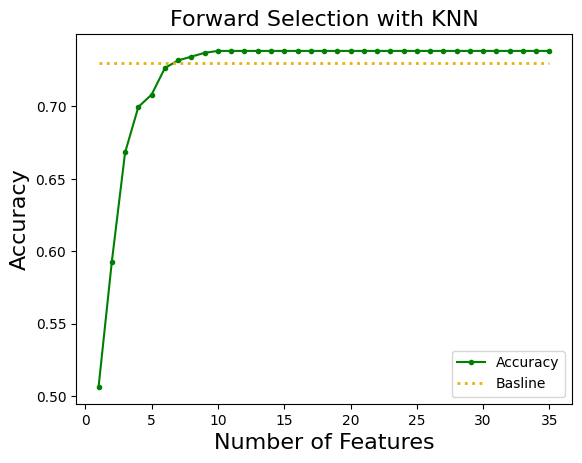

In [ ]:
##############################
k_accuracies(baseline_knn,acc_scores_knn,'Forward Selection with KNN')

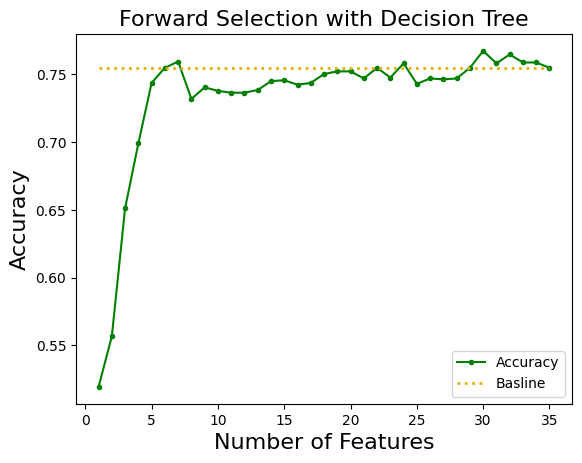

In [ ]:
##############################
k_accuracies(baseline_dt,acc_scores_DT,'Forward Selection with Decision Tree')

In [ ]:
# Initialize the accuracy_results dictionary and selected_features dictionary
accuracy_results = {}
selected_features = {}

for i in range(1, 36):
    for m in ms:
        acc = select_features(X_train, X_test, y_train, y_test, m, i)
        if m not in accuracy_results:
            accuracy_results[m] = []
            selected_features[m] = None  # Initialize a variable to store selected features for each model

        accuracy_results[m].append(acc)

        # Store the selected features when achieving the maximum accuracy for each model
        if acc == max(accuracy_results[m]):
            sfs = SequentialFeatureSelector(estimator=dt_classifier if m == 'DecisionTree' else knn,
                                            k_features=i,
                                            forward=True,
                                            floating=False,
                                            scoring='accuracy')
            sfs.fit(X_train, y_train)
            selected_features[m] = list(sfs.k_feature_idx_)

# Print the selected features for each model at the k value that achieved the maximum accuracy
for m, features in selected_features.items():
    print(f"Model: {m}, Selected Features at k={accuracy_results[m].index(max(accuracy_results[m])) + 1}: {features}")


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


kNN - Number of selected features: 1
kNN Train Accuracy: 67.11%
kNN Test Accuracy: 50.62%
kNN Confusion Matrix: [[ 50  54   0   0  25   0  68]
 [ 26  78  17   0  83   8  18]
 [  1   6  83  68  13  24   0]
 [  0   0  72 167   0   8   0]
 [  3  46  15   0 147   4   0]
 [  0   8  88  59  22  48   0]
 [ 14   3   0   0   0   0 199]]
kNN Report:
              precision    recall  f1-score   support

           1       0.53      0.25      0.34       197
           2       0.40      0.34      0.37       230
           3       0.30      0.43      0.35       195
           4       0.57      0.68      0.62       247
           5       0.51      0.68      0.58       215
           6       0.52      0.21      0.30       225
           7       0.70      0.92      0.79       216

    accuracy                           0.51      1525
   macro avg       0.50      0.50      0.48      1525
weighted avg       0.51      0.51      0.48      1525

-----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Decision Tree - Number of selected features: 1
Decision Tree Train Accuracy: 71.55%
Decision Tree Test Accuracy: 51.93%
Decision Tree Confusion Matrix: [[ 51  51   0   0  24   0  71]
 [ 31  70  16   0  88  10  15]
 [  0   5  67  73  12  38   0]
 [  0   0  48 185   0  14   0]
 [  4  25  11   0 170   5   0]
 [  1   2  85  67  24  46   0]
 [  9   4   0   0   0   0 203]]
Decision Tree Report:
              precision    recall  f1-score   support

           1       0.53      0.26      0.35       197
           2       0.45      0.30      0.36       230
           3       0.30      0.34      0.32       195
           4       0.57      0.75      0.65       247
           5       0.53      0.79      0.64       215
           6       0.41      0.20      0.27       225
           7       0.70      0.94      0.80       216

    accuracy                           0.52      1525
   macro avg       0.50      0.51      0.48      1525
weighted avg       0.50      0.52      0.49      1525

-----------

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


kNN - Number of selected features: 2
kNN Train Accuracy: 67.69%
kNN Test Accuracy: 50.75%
kNN Confusion Matrix: [[ 50  54   0   0  25   0  68]
 [ 26  78  18   0  83   7  18]
 [  1   5  81  70  13  25   0]
 [  0   0  69 170   0   8   0]
 [  3  46  15   0 147   4   0]
 [  0   8  85  61  22  49   0]
 [ 14   3   0   0   0   0 199]]
kNN Report:
              precision    recall  f1-score   support

           1       0.53      0.25      0.34       197
           2       0.40      0.34      0.37       230
           3       0.30      0.42      0.35       195
           4       0.56      0.69      0.62       247
           5       0.51      0.68      0.58       215
           6       0.53      0.22      0.31       225
           7       0.70      0.92      0.79       216

    accuracy                           0.51      1525
   macro avg       0.50      0.50      0.48      1525
weighted avg       0.51      0.51      0.49      1525

-----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Decision Tree - Number of selected features: 2
Decision Tree Train Accuracy: 72.46%
Decision Tree Test Accuracy: 52.07%
Decision Tree Confusion Matrix: [[ 51  51   0   0  24   0  71]
 [ 31  70  17   0  88   9  15]
 [  0   7  68  73  13  34   0]
 [  0   0  46 185   0  16   0]
 [  4  25  11   0 171   4   0]
 [  1   3  80  70  25  46   0]
 [  9   4   0   0   0   0 203]]
Decision Tree Report:
              precision    recall  f1-score   support

           1       0.53      0.26      0.35       197
           2       0.44      0.30      0.36       230
           3       0.31      0.35      0.33       195
           4       0.56      0.75      0.64       247
           5       0.53      0.80      0.64       215
           6       0.42      0.20      0.28       225
           7       0.70      0.94      0.80       216

    accuracy                           0.52      1525
   macro avg       0.50      0.51      0.48      1525
weighted avg       0.50      0.52      0.49      1525

-----------

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


kNN - Number of selected features: 3
kNN Train Accuracy: 76.48%
kNN Test Accuracy: 58.56%
kNN Confusion Matrix: [[ 31  71   0   0  23   0  72]
 [ 21 103  18   0  61   7  20]
 [  0   3  95  43  11  43   0]
 [  0   0  43 195   0   9   0]
 [  0  13  10   0 190   2   0]
 [  0   5  79  55  17  69   0]
 [  6   0   0   0   0   0 210]]
kNN Report:
              precision    recall  f1-score   support

           1       0.53      0.16      0.24       197
           2       0.53      0.45      0.48       230
           3       0.39      0.49      0.43       195
           4       0.67      0.79      0.72       247
           5       0.63      0.88      0.74       215
           6       0.53      0.31      0.39       225
           7       0.70      0.97      0.81       216

    accuracy                           0.59      1525
   macro avg       0.57      0.58      0.55      1525
weighted avg       0.57      0.59      0.55      1525

-----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Decision Tree - Number of selected features: 3
Decision Tree Train Accuracy: 99.93%
Decision Tree Test Accuracy: 55.67%
Decision Tree Confusion Matrix: [[ 53  66   0   0  16   0  62]
 [ 21 104  19   0  52  14  20]
 [  0   7  83  43  10  52   0]
 [  0   0  53 168   0  26   0]
 [  2  27  13   0 162  11   0]
 [  1   7  79  49  13  76   0]
 [ 10   3   0   0   0   0 203]]
Decision Tree Report:
              precision    recall  f1-score   support

           1       0.61      0.27      0.37       197
           2       0.49      0.45      0.47       230
           3       0.34      0.43      0.38       195
           4       0.65      0.68      0.66       247
           5       0.64      0.75      0.69       215
           6       0.42      0.34      0.38       225
           7       0.71      0.94      0.81       216

    accuracy                           0.56      1525
   macro avg       0.55      0.55      0.54      1525
weighted avg       0.55      0.56      0.54      1525

-----------

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


kNN - Number of selected features: 4
kNN Train Accuracy: 76.49%
kNN Test Accuracy: 58.56%
kNN Confusion Matrix: [[ 31  71   0   0  23   0  72]
 [ 21 103  18   0  61   7  20]
 [  0   3  95  43  11  43   0]
 [  0   0  43 195   0   9   0]
 [  0  13  10   0 190   2   0]
 [  0   5  79  55  17  69   0]
 [  6   0   0   0   0   0 210]]
kNN Report:
              precision    recall  f1-score   support

           1       0.53      0.16      0.24       197
           2       0.53      0.45      0.48       230
           3       0.39      0.49      0.43       195
           4       0.67      0.79      0.72       247
           5       0.63      0.88      0.74       215
           6       0.53      0.31      0.39       225
           7       0.70      0.97      0.81       216

    accuracy                           0.59      1525
   macro avg       0.57      0.58      0.55      1525
weighted avg       0.57      0.59      0.55      1525

-----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

Decision Tree - Number of selected features: 4
Decision Tree Train Accuracy: 99.96%
Decision Tree Test Accuracy: 54.16%
Decision Tree Confusion Matrix: [[ 49  70   0   0  15   0  63]
 [ 23 112  18   0  47  11  19]
 [  1   4  81  57   9  43   0]
 [  0   0  75 144   0  28   0]
 [  3  29  11   0 167   5   0]
 [  3   8  72  60  13  69   0]
 [  9   3   0   0   0   0 204]]
Decision Tree Report:
              precision    recall  f1-score   support

           1       0.56      0.25      0.34       197
           2       0.50      0.49      0.49       230
           3       0.32      0.42      0.36       195
           4       0.55      0.58      0.57       247
           5       0.67      0.78      0.72       215
           6       0.44      0.31      0.36       225
           7       0.71      0.94      0.81       216

    accuracy                           0.54      1525
   macro avg       0.53      0.54      0.52      1525
weighted avg       0.54      0.54      0.53      1525

-----------

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Decision Tree - Number of selected features: 5
Decision Tree Train Accuracy: 99.96%
Decision Tree Test Accuracy: 57.18%
Decision Tree Confusion Matrix: [[ 53  77   0   0  12   1  54]
 [ 21 111  26   0  46   8  18]
 [  0  19  79  21  12  64   0]
 [  0   4  31 167   0  45   0]
 [  3  31  12   0 160   9   0]
 [  0  13  67  21  22 102   0]
 [ 12   4   0   0   0   0 200]]
Decision Tree Report:
              precision    recall  f1-score   support

           1       0.60      0.27      0.37       197
           2       0.43      0.48      0.45       230
           3       0.37      0.41      0.39       195
           4       0.80      0.68      0.73       247
           5       0.63      0.74      0.69       215
           6       0.45      0.45      0.45       225
           7       0.74      0.93      0.82       216

    accuracy                           0.57      1525
   macro avg       0.57      0.57      0.56      1525
weighted avg       0.58      0.57      0.56      1525

-----------

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


kNN - Number of selected features: 6
kNN Train Accuracy: 76.50%
kNN Test Accuracy: 58.62%
kNN Confusion Matrix: [[ 31  71   0   0  23   0  72]
 [ 21 103  18   0  61   7  20]
 [  0   3  95  43  11  43   0]
 [  0   0  42 196   0   9   0]
 [  0  13  10   0 190   2   0]
 [  0   5  79  55  17  69   0]
 [  6   0   0   0   0   0 210]]
kNN Report:
              precision    recall  f1-score   support

           1       0.53      0.16      0.24       197
           2       0.53      0.45      0.48       230
           3       0.39      0.49      0.43       195
           4       0.67      0.79      0.72       247
           5       0.63      0.88      0.74       215
           6       0.53      0.31      0.39       225
           7       0.70      0.97      0.81       216

    accuracy                           0.59      1525
   macro avg       0.57      0.58      0.55      1525
weighted avg       0.57      0.59      0.55      1525

-----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Decision Tree - Number of selected features: 6
Decision Tree Train Accuracy: 99.96%
Decision Tree Test Accuracy: 65.25%
Decision Tree Confusion Matrix: [[ 54  75   0   0  12   1  55]
 [ 23 125  12   0  50   6  14]
 [  0   5 108  23   8  51   0]
 [  0   0  20 214   0  13   0]
 [  1  25  11   0 172   6   0]
 [  0   6  66  28  11 114   0]
 [  6   2   0   0   0   0 208]]
Decision Tree Report:
              precision    recall  f1-score   support

           1       0.64      0.27      0.38       197
           2       0.53      0.54      0.53       230
           3       0.50      0.55      0.52       195
           4       0.81      0.87      0.84       247
           5       0.68      0.80      0.74       215
           6       0.60      0.51      0.55       225
           7       0.75      0.96      0.84       216

    accuracy                           0.65      1525
   macro avg       0.64      0.64      0.63      1525
weighted avg       0.65      0.65      0.64      1525

-----------

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


kNN - Number of selected features: 7
kNN Train Accuracy: 83.15%
kNN Test Accuracy: 37.84%
kNN Confusion Matrix: [[ 49  56   6   0  15   0  71]
 [ 43  61  50   0  37  10  29]
 [  0   0 114  33   7  41   0]
 [  0   0 109 120   0  18   0]
 [  0  15 141   0  39   9  11]
 [  0   0 112  40   8  65   0]
 [ 42  45   0   0   0   0 129]]
kNN Report:
              precision    recall  f1-score   support

           1       0.37      0.25      0.30       197
           2       0.34      0.27      0.30       230
           3       0.21      0.58      0.31       195
           4       0.62      0.49      0.55       247
           5       0.37      0.18      0.24       215
           6       0.45      0.29      0.35       225
           7       0.54      0.60      0.57       216

    accuracy                           0.38      1525
   macro avg       0.42      0.38      0.37      1525
weighted avg       0.42      0.38      0.38      1525

-----------------------------------------
Decision Tree - Num

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 8
kNN Train Accuracy: 83.15%
kNN Test Accuracy: 37.84%
kNN Confusion Matrix: [[ 49  56   6   0  15   0  71]
 [ 43  61  50   0  37  10  29]
 [  0   0 114  33   7  41   0]
 [  0   0 109 120   0  18   0]
 [  0  15 141   0  39   9  11]
 [  0   0 112  40   8  65   0]
 [ 42  45   0   0   0   0 129]]
kNN Report:
              precision    recall  f1-score   support

           1       0.37      0.25      0.30       197
           2       0.34      0.27      0.30       230
           3       0.21      0.58      0.31       195
           4       0.62      0.49      0.55       247
           5       0.37      0.18      0.24       215
           6       0.45      0.29      0.35       225
           7       0.54      0.60      0.57       216

    accuracy                           0.38      1525
   macro avg       0.42      0.38      0.37      1525
weighted avg       0.42      0.38      0.38      1525

-----------------------------------------
Decision Tree - Num

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 9
kNN Train Accuracy: 83.15%
kNN Test Accuracy: 68.00%
kNN Confusion Matrix: [[ 37  72   2   0  21   0  65]
 [ 12 124  15   0  51   8  20]
 [  0   4 117  30   8  36   0]
 [  0   0  16 224   0   7   0]
 [  0   2   6   0 204   3   0]
 [  0   3  49  42  15 116   0]
 [  0   1   0   0   0   0 215]]
kNN Report:
              precision    recall  f1-score   support

           1       0.76      0.19      0.30       197
           2       0.60      0.54      0.57       230
           3       0.57      0.60      0.58       195
           4       0.76      0.91      0.83       247
           5       0.68      0.95      0.79       215
           6       0.68      0.52      0.59       225
           7       0.72      1.00      0.83       216

    accuracy                           0.68      1525
   macro avg       0.68      0.67      0.64      1525
weighted avg       0.68      0.68      0.65      1525

-----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Decision Tree - Number of selected features: 9
Decision Tree Train Accuracy: 100.00%
Decision Tree Test Accuracy: 70.89%
Decision Tree Confusion Matrix: [[ 66  81   0   0  12   0  38]
 [ 34 126  10   0  42   8  10]
 [  0  10 126  24   5  30   0]
 [  0   0  18 219   0  10   0]
 [  1  18   4   0 186   6   0]
 [  1   4  47  21   5 147   0]
 [  4   1   0   0   0   0 211]]
Decision Tree Report:
              precision    recall  f1-score   support

           1       0.62      0.34      0.44       197
           2       0.53      0.55      0.54       230
           3       0.61      0.65      0.63       195
           4       0.83      0.89      0.86       247
           5       0.74      0.87      0.80       215
           6       0.73      0.65      0.69       225
           7       0.81      0.98      0.89       216

    accuracy                           0.71      1525
   macro avg       0.70      0.70      0.69      1525
weighted avg       0.70      0.71      0.70      1525

----------

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


kNN - Number of selected features: 10
kNN Train Accuracy: 83.15%
kNN Test Accuracy: 68.00%
kNN Confusion Matrix: [[ 37  72   2   0  21   0  65]
 [ 12 124  15   0  51   8  20]
 [  0   4 117  30   8  36   0]
 [  0   0  16 224   0   7   0]
 [  0   2   6   0 204   3   0]
 [  0   3  49  42  15 116   0]
 [  0   1   0   0   0   0 215]]
kNN Report:
              precision    recall  f1-score   support

           1       0.76      0.19      0.30       197
           2       0.60      0.54      0.57       230
           3       0.57      0.60      0.58       195
           4       0.76      0.91      0.83       247
           5       0.68      0.95      0.79       215
           6       0.68      0.52      0.59       225
           7       0.72      1.00      0.83       216

    accuracy                           0.68      1525
   macro avg       0.68      0.67      0.64      1525
weighted avg       0.68      0.68      0.65      1525

-----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

Decision Tree - Number of selected features: 10
Decision Tree Train Accuracy: 100.00%
Decision Tree Test Accuracy: 70.56%
Decision Tree Confusion Matrix: [[ 65  76   0   0  13   0  43]
 [ 30 128  10   0  42  10  10]
 [  0  10 120  24   5  36   0]
 [  0   0  20 215   0  12   0]
 [  1  18   4   0 185   7   0]
 [  0   5  44  19   6 151   0]
 [  3   1   0   0   0   0 212]]
Decision Tree Report:
              precision    recall  f1-score   support

           1       0.66      0.33      0.44       197
           2       0.54      0.56      0.55       230
           3       0.61      0.62      0.61       195
           4       0.83      0.87      0.85       247
           5       0.74      0.86      0.79       215
           6       0.70      0.67      0.68       225
           7       0.80      0.98      0.88       216

    accuracy                           0.71      1525
   macro avg       0.70      0.70      0.69      1525
weighted avg       0.70      0.71      0.69      1525

---------

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Decision Tree - Number of selected features: 11
Decision Tree Train Accuracy: 100.00%
Decision Tree Test Accuracy: 72.46%
Decision Tree Confusion Matrix: [[ 74  74   0   0  11   0  38]
 [ 35 129   9   0  40   9   8]
 [  0   8 131  22   5  29   0]
 [  0   0  17 220   0  10   0]
 [  1  16   4   0 188   6   0]
 [  1   4  43  20   7 150   0]
 [  2   1   0   0   0   0 213]]
Decision Tree Report:
              precision    recall  f1-score   support

           1       0.65      0.38      0.48       197
           2       0.56      0.56      0.56       230
           3       0.64      0.67      0.66       195
           4       0.84      0.89      0.86       247
           5       0.75      0.87      0.81       215
           6       0.74      0.67      0.70       225
           7       0.82      0.99      0.90       216

    accuracy                           0.72      1525
   macro avg       0.71      0.72      0.71      1525
weighted avg       0.72      0.72      0.71      1525

---------

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


kNN - Number of selected features: 12
kNN Train Accuracy: 86.31%
kNN Test Accuracy: 71.54%
kNN Confusion Matrix: [[ 45  70   2   0  24   0  56]
 [ 21 109  13   0  56  14  17]
 [  0   1 129  32   5  28   0]
 [  0   0   4 243   0   0   0]
 [  0   0   6   0 209   0   0]
 [  0   3  35  32  12 143   0]
 [  0   3   0   0   0   0 213]]
kNN Report:
              precision    recall  f1-score   support

           1       0.68      0.23      0.34       197
           2       0.59      0.47      0.52       230
           3       0.68      0.66      0.67       195
           4       0.79      0.98      0.88       247
           5       0.68      0.97      0.80       215
           6       0.77      0.64      0.70       225
           7       0.74      0.99      0.85       216

    accuracy                           0.72      1525
   macro avg       0.71      0.71      0.68      1525
weighted avg       0.71      0.72      0.69      1525

-----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Decision Tree - Number of selected features: 12
Decision Tree Train Accuracy: 100.00%
Decision Tree Test Accuracy: 73.97%
Decision Tree Confusion Matrix: [[ 79  73   0   0  14   1  30]
 [ 38 135   9   0  34   6   8]
 [  0   7 125  12   7  44   0]
 [  0   0  16 225   0   6   0]
 [  4  12   2   0 193   4   0]
 [  0   4  37  11   8 165   0]
 [  7   3   0   0   0   0 206]]
Decision Tree Report:
              precision    recall  f1-score   support

           1       0.62      0.40      0.49       197
           2       0.58      0.59      0.58       230
           3       0.66      0.64      0.65       195
           4       0.91      0.91      0.91       247
           5       0.75      0.90      0.82       215
           6       0.73      0.73      0.73       225
           7       0.84      0.95      0.90       216

    accuracy                           0.74      1525
   macro avg       0.73      0.73      0.73      1525
weighted avg       0.73      0.74      0.73      1525

---------

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


kNN - Number of selected features: 13
kNN Train Accuracy: 86.31%
kNN Test Accuracy: 71.54%
kNN Confusion Matrix: [[ 45  70   2   0  24   0  56]
 [ 21 109  13   0  56  14  17]
 [  0   1 129  32   5  28   0]
 [  0   0   4 243   0   0   0]
 [  0   0   6   0 209   0   0]
 [  0   3  35  32  12 143   0]
 [  0   3   0   0   0   0 213]]
kNN Report:
              precision    recall  f1-score   support

           1       0.68      0.23      0.34       197
           2       0.59      0.47      0.52       230
           3       0.68      0.66      0.67       195
           4       0.79      0.98      0.88       247
           5       0.68      0.97      0.80       215
           6       0.77      0.64      0.70       225
           7       0.74      0.99      0.85       216

    accuracy                           0.72      1525
   macro avg       0.71      0.71      0.68      1525
weighted avg       0.71      0.72      0.69      1525

-----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Decision Tree - Number of selected features: 13
Decision Tree Train Accuracy: 100.00%
Decision Tree Test Accuracy: 74.23%
Decision Tree Confusion Matrix: [[ 85  71   0   0  13   1  27]
 [ 39 136   7   0  38   5   5]
 [  0   8 129  12   6  40   0]
 [  0   0  15 225   0   7   0]
 [  0  15   2   0 192   6   0]
 [  2   5  42  10   6 160   0]
 [  9   2   0   0   0   0 205]]
Decision Tree Report:
              precision    recall  f1-score   support

           1       0.63      0.43      0.51       197
           2       0.57      0.59      0.58       230
           3       0.66      0.66      0.66       195
           4       0.91      0.91      0.91       247
           5       0.75      0.89      0.82       215
           6       0.73      0.71      0.72       225
           7       0.86      0.95      0.91       216

    accuracy                           0.74      1525
   macro avg       0.73      0.74      0.73      1525
weighted avg       0.74      0.74      0.74      1525

---------

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


kNN - Number of selected features: 14
kNN Train Accuracy: 87.46%
kNN Test Accuracy: 31.61%
kNN Confusion Matrix: [[ 25  42   0   0 118   0  12]
 [ 10  44   1   1 170   4   0]
 [  0   0  76  58  46  15   0]
 [  0   0 144  90   0  13   0]
 [  2  10   1   5 197   0   0]
 [  0   0  77  49  65  34   0]
 [ 61  99   0   0  40   0  16]]
kNN Report:
              precision    recall  f1-score   support

           1       0.26      0.13      0.17       197
           2       0.23      0.19      0.21       230
           3       0.25      0.39      0.31       195
           4       0.44      0.36      0.40       247
           5       0.31      0.92      0.46       215
           6       0.52      0.15      0.23       225
           7       0.57      0.07      0.13       216

    accuracy                           0.32      1525
   macro avg       0.37      0.32      0.27      1525
weighted avg       0.37      0.32      0.28      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 15
kNN Train Accuracy: 87.46%
kNN Test Accuracy: 31.61%
kNN Confusion Matrix: [[ 25  42   0   0 118   0  12]
 [ 10  44   1   1 170   4   0]
 [  0   0  76  58  46  15   0]
 [  0   0 144  90   0  13   0]
 [  2  10   1   5 197   0   0]
 [  0   0  77  49  65  34   0]
 [ 61  99   0   0  40   0  16]]
kNN Report:
              precision    recall  f1-score   support

           1       0.26      0.13      0.17       197
           2       0.23      0.19      0.21       230
           3       0.25      0.39      0.31       195
           4       0.44      0.36      0.40       247
           5       0.31      0.92      0.46       215
           6       0.52      0.15      0.23       225
           7       0.57      0.07      0.13       216

    accuracy                           0.32      1525
   macro avg       0.37      0.32      0.27      1525
weighted avg       0.37      0.32      0.28      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 16
kNN Train Accuracy: 87.53%
kNN Test Accuracy: 72.46%
kNN Confusion Matrix: [[ 44  69   2   0  25   0  57]
 [ 21 107  13   0  57  14  18]
 [  0   2 135  28   4  26   0]
 [  0   0   2 245   0   0   0]
 [  0   0   5   0 210   0   0]
 [  0   3  31  30  10 151   0]
 [  0   3   0   0   0   0 213]]
kNN Report:
              precision    recall  f1-score   support

           1       0.68      0.22      0.34       197
           2       0.58      0.47      0.52       230
           3       0.72      0.69      0.70       195
           4       0.81      0.99      0.89       247
           5       0.69      0.98      0.81       215
           6       0.79      0.67      0.73       225
           7       0.74      0.99      0.85       216

    accuracy                           0.72      1525
   macro avg       0.71      0.72      0.69      1525
weighted avg       0.72      0.72      0.70      1525

-----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Decision Tree - Number of selected features: 16
Decision Tree Train Accuracy: 100.00%
Decision Tree Test Accuracy: 75.67%
Decision Tree Confusion Matrix: [[ 88  70   0   0   6   0  33]
 [ 42 128  12   0  34   9   5]
 [  0   2 141  14   5  33   0]
 [  0   0  12 230   0   5   0]
 [  2  14   4   0 192   3   0]
 [  0   4  34  15   7 165   0]
 [  4   2   0   0   0   0 210]]
Decision Tree Report:
              precision    recall  f1-score   support

           1       0.65      0.45      0.53       197
           2       0.58      0.56      0.57       230
           3       0.69      0.72      0.71       195
           4       0.89      0.93      0.91       247
           5       0.79      0.89      0.84       215
           6       0.77      0.73      0.75       225
           7       0.85      0.97      0.91       216

    accuracy                           0.76      1525
   macro avg       0.74      0.75      0.74      1525
weighted avg       0.75      0.76      0.75      1525

---------

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


kNN - Number of selected features: 17
kNN Train Accuracy: 87.53%
kNN Test Accuracy: 72.46%
kNN Confusion Matrix: [[ 44  69   2   0  25   0  57]
 [ 21 107  13   0  57  14  18]
 [  0   2 135  28   4  26   0]
 [  0   0   2 245   0   0   0]
 [  0   0   5   0 210   0   0]
 [  0   3  31  30  10 151   0]
 [  0   3   0   0   0   0 213]]
kNN Report:
              precision    recall  f1-score   support

           1       0.68      0.22      0.34       197
           2       0.58      0.47      0.52       230
           3       0.72      0.69      0.70       195
           4       0.81      0.99      0.89       247
           5       0.69      0.98      0.81       215
           6       0.79      0.67      0.73       225
           7       0.74      0.99      0.85       216

    accuracy                           0.72      1525
   macro avg       0.71      0.72      0.69      1525
weighted avg       0.72      0.72      0.70      1525

-----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Decision Tree - Number of selected features: 17
Decision Tree Train Accuracy: 100.00%
Decision Tree Test Accuracy: 75.80%
Decision Tree Confusion Matrix: [[ 89  69   0   0   6   0  33]
 [ 37 133  12   0  35   6   7]
 [  0   1 136  16   6  36   0]
 [  0   0  10 231   0   6   0]
 [  2  14   4   0 191   4   0]
 [  1   4  34  11   7 168   0]
 [  5   3   0   0   0   0 208]]
Decision Tree Report:
              precision    recall  f1-score   support

           1       0.66      0.45      0.54       197
           2       0.59      0.58      0.59       230
           3       0.69      0.70      0.70       195
           4       0.90      0.94      0.91       247
           5       0.78      0.89      0.83       215
           6       0.76      0.75      0.76       225
           7       0.84      0.96      0.90       216

    accuracy                           0.76      1525
   macro avg       0.75      0.75      0.75      1525
weighted avg       0.75      0.76      0.75      1525

---------

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


kNN - Number of selected features: 18
kNN Train Accuracy: 87.53%
kNN Test Accuracy: 72.46%
kNN Confusion Matrix: [[ 44  69   2   0  25   0  57]
 [ 21 107  13   0  57  14  18]
 [  0   2 135  28   4  26   0]
 [  0   0   2 245   0   0   0]
 [  0   0   5   0 210   0   0]
 [  0   3  31  30  10 151   0]
 [  0   3   0   0   0   0 213]]
kNN Report:
              precision    recall  f1-score   support

           1       0.68      0.22      0.34       197
           2       0.58      0.47      0.52       230
           3       0.72      0.69      0.70       195
           4       0.81      0.99      0.89       247
           5       0.69      0.98      0.81       215
           6       0.79      0.67      0.73       225
           7       0.74      0.99      0.85       216

    accuracy                           0.72      1525
   macro avg       0.71      0.72      0.69      1525
weighted avg       0.72      0.72      0.70      1525

-----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

Decision Tree - Number of selected features: 18
Decision Tree Train Accuracy: 100.00%
Decision Tree Test Accuracy: 69.11%
Decision Tree Confusion Matrix: [[ 92  66   0   0   6   0  33]
 [ 40 133   9   0  32   9   7]
 [  0   5 120  20   8  41   1]
 [  0   0  24 214   0   9   0]
 [  2  25   8   0 177   3   0]
 [  2   3  90  16   5 109   0]
 [  4   3   0   0   0   0 209]]
Decision Tree Report:
              precision    recall  f1-score   support

           1       0.66      0.47      0.55       197
           2       0.57      0.58      0.57       230
           3       0.48      0.62      0.54       195
           4       0.86      0.87      0.86       247
           5       0.78      0.82      0.80       215
           6       0.64      0.48      0.55       225
           7       0.84      0.97      0.90       216

    accuracy                           0.69      1525
   macro avg       0.69      0.69      0.68      1525
weighted avg       0.69      0.69      0.69      1525

---------

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

Decision Tree - Number of selected features: 19
Decision Tree Train Accuracy: 100.00%
Decision Tree Test Accuracy: 53.38%
Decision Tree Confusion Matrix: [[ 81  81   0   0   5   0  30]
 [ 52 124  10   0  34   6   4]
 [  0   9  88  22   8  68   0]
 [  0   0  75  77   0  95   0]
 [ 24  38   9   0 138   3   3]
 [  1   6  66  16   8 128   0]
 [ 16  22   0   0   0   0 178]]
Decision Tree Report:
              precision    recall  f1-score   support

           1       0.47      0.41      0.44       197
           2       0.44      0.54      0.49       230
           3       0.35      0.45      0.40       195
           4       0.67      0.31      0.43       247
           5       0.72      0.64      0.68       215
           6       0.43      0.57      0.49       225
           7       0.83      0.82      0.83       216

    accuracy                           0.53      1525
   macro avg       0.56      0.54      0.53      1525
weighted avg       0.56      0.53      0.53      1525

---------

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

Decision Tree - Number of selected features: 20
Decision Tree Train Accuracy: 100.00%
Decision Tree Test Accuracy: 56.66%
Decision Tree Confusion Matrix: [[ 75  87   0   0   6   0  29]
 [ 41 132   5   0  40   6   6]
 [  0  10  86  34   7  58   0]
 [  0   0  52  96   0  99   0]
 [  0  19   9   0 167   2  18]
 [  4   9  66  14   9 123   0]
 [  8  23   0   0   0   0 185]]
Decision Tree Report:
              precision    recall  f1-score   support

           1       0.59      0.38      0.46       197
           2       0.47      0.57      0.52       230
           3       0.39      0.44      0.42       195
           4       0.67      0.39      0.49       247
           5       0.73      0.78      0.75       215
           6       0.43      0.55      0.48       225
           7       0.78      0.86      0.81       216

    accuracy                           0.57      1525
   macro avg       0.58      0.57      0.56      1525
weighted avg       0.58      0.57      0.56      1525

---------

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

Decision Tree - Number of selected features: 21
Decision Tree Train Accuracy: 100.00%
Decision Tree Test Accuracy: 52.72%
Decision Tree Confusion Matrix: [[ 75  86   1   0   7   1  27]
 [ 43 121  10   0  42   7   7]
 [  0  10  94  16   7  68   0]
 [  0   0  70  84   0  93   0]
 [ 37  43   2   0 132   1   0]
 [  3  10  66  17  10 119   0]
 [  9  28   0   0   0   0 179]]
Decision Tree Report:
              precision    recall  f1-score   support

           1       0.45      0.38      0.41       197
           2       0.41      0.53      0.46       230
           3       0.39      0.48      0.43       195
           4       0.72      0.34      0.46       247
           5       0.67      0.61      0.64       215
           6       0.41      0.53      0.46       225
           7       0.84      0.83      0.83       216

    accuracy                           0.53      1525
   macro avg       0.55      0.53      0.53      1525
weighted avg       0.56      0.53      0.53      1525

---------

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 23
kNN Train Accuracy: 88.04%
kNN Test Accuracy: 73.70%
kNN Confusion Matrix: [[ 46  70   2   0  25   0  54]
 [ 20 111  13   0  54  13  19]
 [  0   0 139  24   6  26   0]
 [  0   0   1 246   0   0   0]
 [  0   0   4   0 211   0   0]
 [  0   2  28  27  10 158   0]
 [  0   3   0   0   0   0 213]]
kNN Report:
              precision    recall  f1-score   support

           1       0.70      0.23      0.35       197
           2       0.60      0.48      0.53       230
           3       0.74      0.71      0.73       195
           4       0.83      1.00      0.90       247
           5       0.69      0.98      0.81       215
           6       0.80      0.70      0.75       225
           7       0.74      0.99      0.85       216

    accuracy                           0.74      1525
   macro avg       0.73      0.73      0.70      1525
weighted avg       0.73      0.74      0.71      1525

-----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

Decision Tree - Number of selected features: 23
Decision Tree Train Accuracy: 100.00%
Decision Tree Test Accuracy: 57.18%
Decision Tree Confusion Matrix: [[ 89  68   1   0   7   1  31]
 [ 38 129   7   0  41   7   8]
 [  0   9 116  11   8  50   1]
 [  0   0  97  81   0  69   0]
 [  4  41   3   0 162   4   1]
 [  1   7  79  13   8 117   0]
 [ 19  19   0   0   0   0 178]]
Decision Tree Report:
              precision    recall  f1-score   support

           1       0.59      0.45      0.51       197
           2       0.47      0.56      0.51       230
           3       0.38      0.59      0.47       195
           4       0.77      0.33      0.46       247
           5       0.72      0.75      0.73       215
           6       0.47      0.52      0.49       225
           7       0.81      0.82      0.82       216

    accuracy                           0.57      1525
   macro avg       0.60      0.58      0.57      1525
weighted avg       0.61      0.57      0.57      1525

---------

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 25
kNN Train Accuracy: 88.04%
kNN Test Accuracy: 40.66%
kNN Confusion Matrix: [[ 57  57   2   0  29   1  51]
 [ 37  76  44   0  38  13  22]
 [  0   1 122  24   5  43   0]
 [  0   0  75 150   0  22   0]
 [  1  44 114   0  43   9   4]
 [  0   2 116  41   7  59   0]
 [ 59  44   0   0   0   0 113]]
kNN Report:
              precision    recall  f1-score   support

           1       0.37      0.29      0.32       197
           2       0.34      0.33      0.33       230
           3       0.26      0.63      0.37       195
           4       0.70      0.61      0.65       247
           5       0.35      0.20      0.26       215
           6       0.40      0.26      0.32       225
           7       0.59      0.52      0.56       216

    accuracy                           0.41      1525
   macro avg       0.43      0.41      0.40      1525
weighted avg       0.44      0.41      0.41      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 26
kNN Train Accuracy: 88.04%
kNN Test Accuracy: 40.66%
kNN Confusion Matrix: [[ 57  57   2   0  29   1  51]
 [ 37  76  44   0  38  13  22]
 [  0   1 122  24   5  43   0]
 [  0   0  75 150   0  22   0]
 [  1  44 114   0  43   9   4]
 [  0   2 116  41   7  59   0]
 [ 59  44   0   0   0   0 113]]
kNN Report:
              precision    recall  f1-score   support

           1       0.37      0.29      0.32       197
           2       0.34      0.33      0.33       230
           3       0.26      0.63      0.37       195
           4       0.70      0.61      0.65       247
           5       0.35      0.20      0.26       215
           6       0.40      0.26      0.32       225
           7       0.59      0.52      0.56       216

    accuracy                           0.41      1525
   macro avg       0.43      0.41      0.40      1525
weighted avg       0.44      0.41      0.41      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 27
kNN Train Accuracy: 88.04%
kNN Test Accuracy: 40.66%
kNN Confusion Matrix: [[ 57  57   2   0  29   1  51]
 [ 37  76  44   0  38  13  22]
 [  0   1 122  24   5  43   0]
 [  0   0  75 150   0  22   0]
 [  1  44 114   0  43   9   4]
 [  0   2 116  41   7  59   0]
 [ 59  44   0   0   0   0 113]]
kNN Report:
              precision    recall  f1-score   support

           1       0.37      0.29      0.32       197
           2       0.34      0.33      0.33       230
           3       0.26      0.63      0.37       195
           4       0.70      0.61      0.65       247
           5       0.35      0.20      0.26       215
           6       0.40      0.26      0.32       225
           7       0.59      0.52      0.56       216

    accuracy                           0.41      1525
   macro avg       0.43      0.41      0.40      1525
weighted avg       0.44      0.41      0.41      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 28
kNN Train Accuracy: 88.29%
kNN Test Accuracy: 74.30%
kNN Confusion Matrix: [[ 45  71   1   0  24   0  56]
 [ 19 116  11   0  54  13  17]
 [  0   0 140  23   6  26   0]
 [  0   0   1 246   0   0   0]
 [  0   0   4   0 211   0   0]
 [  0   1  26  25  11 162   0]
 [  0   3   0   0   0   0 213]]
kNN Report:
              precision    recall  f1-score   support

           1       0.70      0.23      0.34       197
           2       0.61      0.50      0.55       230
           3       0.77      0.72      0.74       195
           4       0.84      1.00      0.91       247
           5       0.69      0.98      0.81       215
           6       0.81      0.72      0.76       225
           7       0.74      0.99      0.85       216

    accuracy                           0.74      1525
   macro avg       0.74      0.73      0.71      1525
weighted avg       0.74      0.74      0.72      1525

-----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

Decision Tree - Number of selected features: 28
Decision Tree Train Accuracy: 100.00%
Decision Tree Test Accuracy: 75.61%
Decision Tree Confusion Matrix: [[ 72  71   0   0   8   2  44]
 [ 28 139   9   0  38   9   7]
 [  0   1 148  14   4  28   0]
 [  0   0  17 225   0   5   0]
 [  2   6   5   0 199   3   0]
 [  0   5  38  10   6 166   0]
 [  7   5   0   0   0   0 204]]
Decision Tree Report:
              precision    recall  f1-score   support

           1       0.66      0.37      0.47       197
           2       0.61      0.60      0.61       230
           3       0.68      0.76      0.72       195
           4       0.90      0.91      0.91       247
           5       0.78      0.93      0.85       215
           6       0.78      0.74      0.76       225
           7       0.80      0.94      0.87       216

    accuracy                           0.76      1525
   macro avg       0.75      0.75      0.74      1525
weighted avg       0.75      0.76      0.75      1525

---------

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

Decision Tree - Number of selected features: 29
Decision Tree Train Accuracy: 100.00%
Decision Tree Test Accuracy: 75.28%
Decision Tree Confusion Matrix: [[ 79  68   0   0   8   0  42]
 [ 32 136  11   0  36   8   7]
 [  0   2 142  16   3  32   0]
 [  0   0  13 228   0   6   0]
 [  0  10   5   0 195   5   0]
 [  1   5  36  12   6 165   0]
 [  6   7   0   0   0   0 203]]
Decision Tree Report:
              precision    recall  f1-score   support

           1       0.67      0.40      0.50       197
           2       0.60      0.59      0.59       230
           3       0.69      0.73      0.71       195
           4       0.89      0.92      0.91       247
           5       0.79      0.91      0.84       215
           6       0.76      0.73      0.75       225
           7       0.81      0.94      0.87       216

    accuracy                           0.75      1525
   macro avg       0.74      0.75      0.74      1525
weighted avg       0.75      0.75      0.74      1525

---------

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Decision Tree - Number of selected features: 30
Decision Tree Train Accuracy: 100.00%
Decision Tree Test Accuracy: 76.07%
Decision Tree Confusion Matrix: [[ 84  68   0   0   5   2  38]
 [ 33 132  12   0  37   7   9]
 [  0   4 145  12   5  29   0]
 [  0   0   9 232   0   6   0]
 [  2   9   4   0 197   3   0]
 [  0   6  42   9   5 163   0]
 [  5   4   0   0   0   0 207]]
Decision Tree Report:
              precision    recall  f1-score   support

           1       0.68      0.43      0.52       197
           2       0.59      0.57      0.58       230
           3       0.68      0.74      0.71       195
           4       0.92      0.94      0.93       247
           5       0.79      0.92      0.85       215
           6       0.78      0.72      0.75       225
           7       0.81      0.96      0.88       216

    accuracy                           0.76      1525
   macro avg       0.75      0.75      0.75      1525
weighted avg       0.75      0.76      0.75      1525

---------

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


kNN - Number of selected features: 31
kNN Train Accuracy: 88.38%
kNN Test Accuracy: 24.52%
kNN Confusion Matrix: [[  1  16 121   0   3   0  56]
 [  1   7 197   0   3   2  20]
 [  0   0 194   1   0   0   0]
 [  0   0 247   0   0   0   0]
 [  0   0 215   0   0   0   0]
 [  0   0 225   0   0   0   0]
 [  0   5  39   0   0   0 172]]
kNN Report:
              precision    recall  f1-score   support

           1       0.50      0.01      0.01       197
           2       0.25      0.03      0.05       230
           3       0.16      0.99      0.27       195
           4       0.00      0.00      0.00       247
           5       0.00      0.00      0.00       215
           6       0.00      0.00      0.00       225
           7       0.69      0.80      0.74       216

    accuracy                           0.25      1525
   macro avg       0.23      0.26      0.15      1525
weighted avg       0.22      0.25      0.15      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 32
kNN Train Accuracy: 88.38%
kNN Test Accuracy: 24.52%
kNN Confusion Matrix: [[  1  16 121   0   3   0  56]
 [  1   7 197   0   3   2  20]
 [  0   0 194   1   0   0   0]
 [  0   0 247   0   0   0   0]
 [  0   0 215   0   0   0   0]
 [  0   0 225   0   0   0   0]
 [  0   5  39   0   0   0 172]]
kNN Report:
              precision    recall  f1-score   support

           1       0.50      0.01      0.01       197
           2       0.25      0.03      0.05       230
           3       0.16      0.99      0.27       195
           4       0.00      0.00      0.00       247
           5       0.00      0.00      0.00       215
           6       0.00      0.00      0.00       225
           7       0.69      0.80      0.74       216

    accuracy                           0.25      1525
   macro avg       0.23      0.26      0.15      1525
weighted avg       0.22      0.25      0.15      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 33
kNN Train Accuracy: 88.38%
kNN Test Accuracy: 74.03%
kNN Confusion Matrix: [[ 49  68   1   0  26   0  53]
 [ 20 114  14   0  54  13  15]
 [  0   0 136  27   7  25   0]
 [  0   0   1 246   0   0   0]
 [  0   0   4   0 211   0   0]
 [  0   1  26  25  13 160   0]
 [  0   3   0   0   0   0 213]]
kNN Report:
              precision    recall  f1-score   support

           1       0.71      0.25      0.37       197
           2       0.61      0.50      0.55       230
           3       0.75      0.70      0.72       195
           4       0.83      1.00      0.90       247
           5       0.68      0.98      0.80       215
           6       0.81      0.71      0.76       225
           7       0.76      0.99      0.86       216

    accuracy                           0.74      1525
   macro avg       0.73      0.73      0.71      1525
weighted avg       0.74      0.74      0.71      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 22 28 38 49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_id

kNN - Number of selected features: 34
kNN Train Accuracy: 88.53%
kNN Test Accuracy: 22.82%
kNN Confusion Matrix: [[  0  36 123   0  11   0  27]
 [  0  31 189   0   7   0   3]
 [  0   0 177  17   0   1   0]
 [  0   0 245   2   0   0   0]
 [  0  15 197   1   0   2   0]
 [  0   0 220   5   0   0   0]
 [  0  25  51   0   2   0 138]]
kNN Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       197
           2       0.29      0.13      0.18       230
           3       0.15      0.91      0.25       195
           4       0.08      0.01      0.01       247
           5       0.00      0.00      0.00       215
           6       0.00      0.00      0.00       225
           7       0.82      0.64      0.72       216

    accuracy                           0.23      1525
   macro avg       0.19      0.24      0.17      1525
weighted avg       0.19      0.23      0.16      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selectio

kNN - Number of selected features: 35
kNN Train Accuracy: 88.53%
kNN Test Accuracy: 22.82%
kNN Confusion Matrix: [[  0  36 123   0  11   0  27]
 [  0  31 189   0   7   0   3]
 [  0   0 177  17   0   1   0]
 [  0   0 245   2   0   0   0]
 [  0  15 197   1   0   2   0]
 [  0   0 220   5   0   0   0]
 [  0  25  51   0   2   0 138]]
kNN Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       197
           2       0.29      0.13      0.18       230
           3       0.15      0.91      0.25       195
           4       0.08      0.01      0.01       247
           5       0.00      0.00      0.00       215
           6       0.00      0.00      0.00       225
           7       0.82      0.64      0.72       216

    accuracy                           0.23      1525
   macro avg       0.19      0.24      0.17      1525
weighted avg       0.19      0.23      0.16      1525

-----------------------------------------
Decision Tree - Nu

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selectio

## The best model is Decision Tree with filter-based

# Q3) Adding more machine learning model

## General function to apply Filter Based approach with the Models and print the model's highest accuracy and its best number of features

In [ ]:
def fit_model_with_feature_selection(model, X_train, X_test, y_train, y_test):
    model_name = model.__class__.__name__
    best_score = -float('inf')
    best_num_features = None
    best_model = None
    best_selector = None

    # Define the range of number of features to select
    num_features_range = range(1, 36)

    for num_features in num_features_range:
        # Train the model with selected features on the full training set
        selector = SelectKBest(score_func=f_classif, k=num_features)
        X_train_selected = selector.fit_transform(X_train, y_train)
        model.fit(X_train_selected, y_train)

        # Make predictions on the test set using the model with selected features
        X_test_selected = selector.transform(X_test)
        score = model.score(X_test_selected, y_test)

        if score > best_score:
            best_score = score
            best_num_features = num_features
            best_model = model
            best_selector = selector

    print(f"\nBest number of features selected for {model_name}: {best_num_features}")
    print(f"{model_name} Best Model Score: {best_score:.3f}")

    # Transform X_train and X_test with the best_selector before fitting the best model
    X_train_selected = best_selector.transform(X_train)
    best_model.fit(X_train_selected, y_train)

    # Make predictions on the test set using the best model with selected features
    X_test_selected = best_selector.transform(X_test)
    y_pred = best_model.predict(X_test_selected)

    # Print the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {model_name}:\n{cm}")
    conff_matrix(cm, model_name)

    return best_model, best_num_features

## 1- For Random Forest Classifier

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarni


Best number of features selected for RandomForestClassifier: 21
RandomForestClassifier Best Model Score: 0.830
Confusion Matrix for RandomForestClassifier:
[[ 76  70   0   0  11   0  40]
 [ 12 166  10   0  32   5   5]
 [  0   0 167  12   3  13   0]
 [  0   0   2 244   0   1   0]
 [  0   1   3   0 210   1   0]
 [  0   2  19  13   3 188   0]
 [  1   0   0   0   0   0 215]]


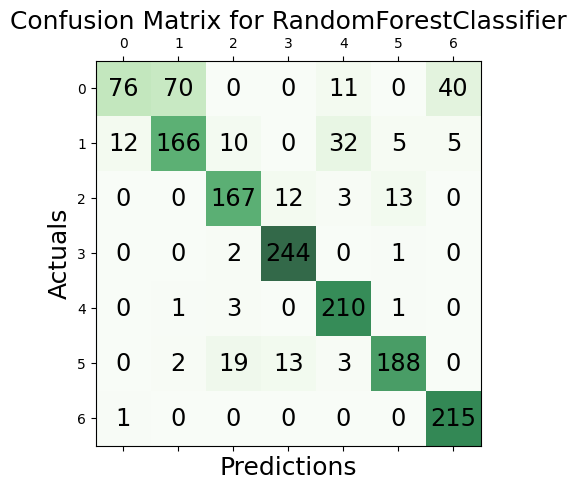

(RandomForestClassifier(random_state=42), 21)

In [ ]:
# fit with training data
fit_model_with_feature_selection(RandomForestClassifier(random_state = 42), X_train, X_test, y_train, y_test)

## 2- For XGBoost Classifier

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarni


Best number of features selected for XGBClassifier: 35
XGBClassifier Best Model Score: 0.728
Confusion Matrix for XGBClassifier:
[[ 60  60   0   0  23   0  54]
 [ 14 126   5   0  64   8  13]
 [  0   0 131  25   5  34   0]
 [  0   0   8 237   0   2   0]
 [  0   0   7   0 206   2   0]
 [  0   0  57  19  15 134   0]
 [  0   0   0   0   0   0 216]]


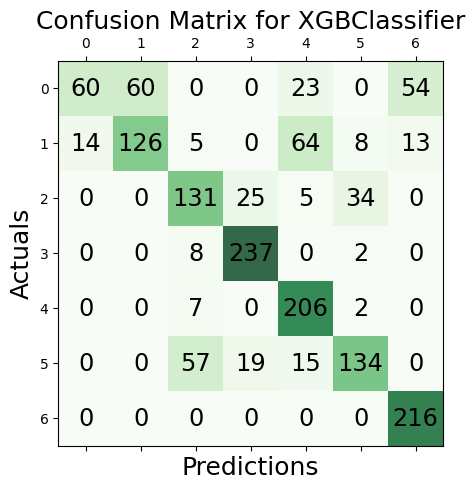

(XGBClassifier(objective='multi:softprob', random_state=42), 35)

In [ ]:
fit_model_with_feature_selection(xgb.XGBClassifier(random_state = 42), X_train, X_test, y_train, y_test)

## 3- For Bagging Classifier

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarni


Best number of features selected for BaggingClassifier: 28
BaggingClassifier Best Model Score: 0.814
Confusion Matrix for BaggingClassifier:
[[ 97  57   0   0   8   0  35]
 [ 29 147  10   0  29   9   6]
 [  0   0 163  13   1  18   0]
 [  0   0   4 242   0   1   0]
 [  0   5   3   0 206   1   0]
 [  0   6  34   9   3 173   0]
 [  2   1   0   0   0   0 213]]


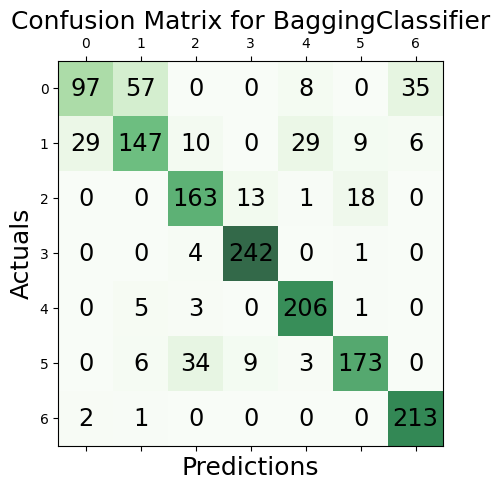

(BaggingClassifier(random_state=42), 28)

In [ ]:
fit_model_with_feature_selection(BaggingClassifier(random_state = 42), X_train, X_test, y_train, y_test)

## After the last calculations in Q2 and Q3 we found out that the Champion model is Random Forest Classifier with accuracy score 0.815 => 81.5% when number of features(K) = 21

# Q4) Supervised & Unsupervised Combination via PKI

In [ ]:
 # Train the Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Evaluate the Random Forest Classifier on the train data
train_predictions = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# Evaluate the Random Forest Classifier on the validation data
validation_predictions = rf_model.predict(X_validation)
val_accuracy = accuracy_score(y_validation, validation_predictions)

# Evaluate the Random Forest Classifier on the test data
test_predictions = rf_model.predict(X_test)
baseline_rf = accuracy_score(y_test, test_predictions)

In [ ]:
# Create data frames with predictions
train_pred_df = pd.DataFrame({'Actual_Cover_Type': y_train, 'Predicted_Cover_Type': train_predictions})
val_pred_df = pd.DataFrame({'Actual_Cover_Type': y_validation, 'Predicted_Cover_Type': validation_predictions})
test_pred_df = pd.DataFrame({'Actual_Cover_Type': y_test, 'Predicted_Cover_Type': test_predictions})

In [ ]:
# Calculate accuracy on training, validation, and test datasets
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", baseline_rf)

Training Accuracy: 1.0
Validation Accuracy: 0.8117489986648865
Test Accuracy: 0.8150819672131148


In [ ]:
from minisom import MiniSom

In [ ]:
grid_sizes = [6, 7, 8, 9, 10, 11, 12]
train_cluster_dfs = {}
val_cluster_dfs = {}
test_cluster_dfs = {}

# Iterate through grid sizes and find the best one based on quantization error
for grid_size in grid_sizes:
    som = MiniSom(grid_size, grid_size, X_train.shape[1], sigma=0.5, learning_rate=0.5,
                  neighborhood_function='gaussian', random_seed=42)
    # som.pca_weights_init(X_train_scaled)
    # som.train_random(X_train_scaled, 1000)  # Train the SOM for 1000 epochs
    som.random_weights_init(X_train.values)
    som.train_random(X_train.values, num_iteration=100)

    # Cluster each instance in the training, validation, and test sets using the SOM
    # np.array([som.winner(x) for x in train_data.values])
    train_clusters = [som.winner(x)[0] for x in X_train.values]
    val_clusters = [som.winner(x)[0] for x in X_validation.values]
    test_clusters = [som.winner(x)[0] for x in X_test.values]

    # Create DataFrames with the clustering outputs for the current grid size
    train_cluster_df = pd.DataFrame({'Cluster': train_clusters})
    val_cluster_df = pd.DataFrame({'Cluster': val_clusters})
    test_cluster_df = pd.DataFrame({'Cluster': test_clusters})

    # Concatenate the DataFrames with the original features for train, validation, and test sets
    train_cluster_dfs[grid_size] = pd.concat([train_pred_df.reset_index(drop=True), train_cluster_df], axis=1)
    val_cluster_dfs[grid_size] = pd.concat([val_pred_df.reset_index(drop=True), val_cluster_df], axis=1)
    test_cluster_dfs[grid_size] = pd.concat([test_pred_df.reset_index(drop=True), test_cluster_df], axis=1)

In [ ]:
train_cluster_dfs[6].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8286 entries, 0 to 8285
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Actual_Cover_Type     8286 non-null   int64
 1   Predicted_Cover_Type  8286 non-null   int64
 2   Cluster               8286 non-null   int64
dtypes: int64(3)
memory usage: 194.3 KB


In [ ]:
# DNN model with 4 hidden layers, each having 50 neurons and tanh activation function
def create_model(input_dim, num_classes):
    model = Sequential()
    model.add(Dense(30, input_dim=input_dim, activation='tanh'))
    model.add(Dense(30, activation='tanh'))
    model.add(Dense(30, activation='tanh'))
    model.add(Dense(30, activation='tanh'))
    model.add(Dense(num_classes, activation='softmax'))  # Output layer with num_classes
    return model

In [ ]:
test_accuracies = {}
# Train the model for each grid size
for grid_size in grid_sizes:
    # Get the training, validation, and testing data frames for the current grid size
    train_data = train_cluster_dfs[grid_size]
    val_data = val_cluster_dfs[grid_size]
    test_data = test_cluster_dfs[grid_size]

    # Convert the 'Actual_Cover_Type', 'Predicted_Cover_Type', and 'Cluster' columns to categorical
    train_data['Actual_Cover_Type'] = train_data['Actual_Cover_Type'].astype('category')
    train_data['Predicted_Cover_Type'] = train_data['Predicted_Cover_Type'].astype('category')
    train_data['Cluster'] = train_data['Cluster'].astype('category')
    val_data['Actual_Cover_Type'] = val_data['Actual_Cover_Type'].astype('category')
    val_data['Predicted_Cover_Type'] = val_data['Predicted_Cover_Type'].astype('category')
    val_data['Cluster'] = val_data['Cluster'].astype('category')
    test_data['Actual_Cover_Type'] = test_data['Actual_Cover_Type'].astype('category')
    test_data['Predicted_Cover_Type'] = test_data['Predicted_Cover_Type'].astype('category')
    test_data['Cluster'] = test_data['Cluster'].astype('category')

    # Separate features and labels for training, validation, and test sets
    X_train_grid = train_data.drop(columns=['Actual_Cover_Type'])
    y_train_grid = train_data['Actual_Cover_Type']
    X_val_grid = val_data.drop(columns=['Actual_Cover_Type'])
    y_val_grid = val_data['Actual_Cover_Type']
    X_test_grid = test_data.drop(columns=['Actual_Cover_Type'])
    y_test_grid = test_data['Actual_Cover_Type']

    # Encode the target variables 'Actual_Cover_Type' as integers
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train_grid)
    y_val_encoded = label_encoder.transform(y_val_grid)
    y_test_encoded = label_encoder.transform(y_test_grid)

    # Standardize the data using StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_grid)
    X_val_scaled = scaler.transform(X_val_grid)
    X_test_scaled = scaler.transform(X_test_grid)

    # Determine the number of classes (unique labels) in the target variable
    num_classes = len(np.unique(y_train_encoded))

    # Create and compile the DNN model
    model = create_model(X_train_scaled.shape[1], num_classes) # X_train_scaled > X_train
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model with more epochs and use validation data for early stopping
    history = model.fit(X_train_scaled, y_train_encoded, epochs=100, batch_size=32, verbose=0,
                        validation_data=(X_val_scaled, y_val_encoded))

    # Evaluate the model on the test data
    test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_encoded)

    # Store the test accuracy in the dictionary
    test_accuracies[grid_size] = test_accuracy

48/48 [==============================] - 0s 4ms/step - loss: 3.9599 - accuracy: 0.8151


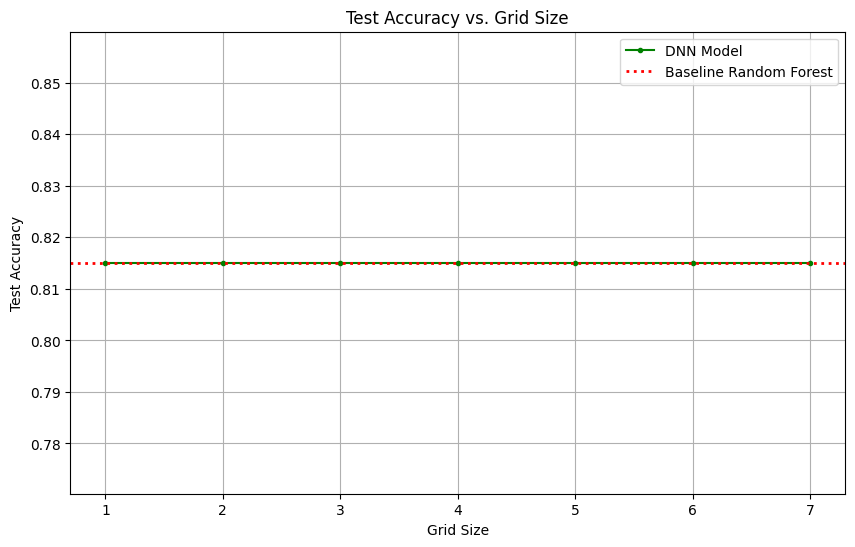

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(grid_sizes)+1), list(test_accuracies.values()), marker='.', label='DNN Model', color='#008000')
plt.axhline(y=baseline_rf, label='Baseline Random Forest',color='red', linestyle='dotted',linewidth=2)
# plt.xticks(range(1, len(grid_sizes)+1), [f"{size[0]}x{size[1]}" for size in grid_sizes])
plt.xticks(range(1, len(grid_sizes)+1))
plt.xlabel('Grid Size')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs. Grid Size')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier

# Q5) Applying parameter fine tuning to get better performance from the previous best performance

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score

# Define the range of hidden layers and neurons per hidden layer
hidden_layers_range = [1, 2, 3, 4]  # Try different numbers of hidden layers
neurons_range = [10, 20, 30, 40, 50]  # Try different numbers of neurons per hidden layer

# Function to create the DNN model with variable hidden layers and neurons
def tune_model(input_dim, num_classes, num_hidden_layers, num_neurons):
    model = Sequential()
    model.add(Dense(num_neurons, input_dim=input_dim, activation='tanh'))
    for _ in range(num_hidden_layers - 1):
        model.add(Dense(num_neurons, activation='tanh'))
    model.add(Dense(num_classes, activation='softmax'))  # Output layer with num_classes
    return model

# Training and evaluation loop
# def train_and_evaluate(X_train, y_train, X_val, y_val, num_hidden_layers, num_neurons):
#     model = tune_model(X_train.shape[1], len(np.unique(y_train)), num_hidden_layers, num_neurons)
#     model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=0)
#     val_accuracy = max(history.history['val_accuracy'])  # Get the best validation accuracy
#     test_accuracy = model.evaluate(X_test_scaled, y_test_encoded)
#     return val_accuracy

# Create a meshgrid to iterate over all combinations of hidden layers and neurons
hidden_layers_mesh, neurons_mesh = np.meshgrid(hidden_layers_range, neurons_range)

# Lists to store the results
# accuracies = []

# # Loop through all combinations and train the models
# for num_hidden_layers, num_neurons in zip(hidden_layers_mesh.ravel(), neurons_mesh.ravel()):
#     accuracy = train_and_evaluate(X_train_scaled, y_train_encoded, X_val_scaled, y_val_encoded,
#                                   num_hidden_layers, num_neurons)
#     accuracies.append(accuracy)

# # Convert the list to a numpy array for plotting
# accuracies = np.array(accuracies).reshape(hidden_layers_mesh.shape)

In [ ]:
# test_accuracies = {}
accuracies = []
# Train the model for each grid size
for grid_size in grid_sizes:
    # Get the training, validation, and testing data frames for the current grid size
    train_data = train_cluster_dfs[grid_size]
    val_data = val_cluster_dfs[grid_size]
    test_data = test_cluster_dfs[grid_size]

    # Convert the 'Actual_Cover_Type', 'Predicted_Cover_Type', and 'Cluster' columns to categorical
    train_data['Actual_Cover_Type'] = train_data['Actual_Cover_Type'].astype('category')
    train_data['Predicted_Cover_Type'] = train_data['Predicted_Cover_Type'].astype('category')
    train_data['Cluster'] = train_data['Cluster'].astype('category')
    val_data['Actual_Cover_Type'] = val_data['Actual_Cover_Type'].astype('category')
    val_data['Predicted_Cover_Type'] = val_data['Predicted_Cover_Type'].astype('category')
    val_data['Cluster'] = val_data['Cluster'].astype('category')
    test_data['Actual_Cover_Type'] = test_data['Actual_Cover_Type'].astype('category')
    test_data['Predicted_Cover_Type'] = test_data['Predicted_Cover_Type'].astype('category')
    test_data['Cluster'] = test_data['Cluster'].astype('category')

    # Separate features and labels for training, validation, and test sets
    X_train_grid = train_data.drop(columns=['Actual_Cover_Type'])
    y_train_grid = train_data['Actual_Cover_Type']
    X_val_grid = val_data.drop(columns=['Actual_Cover_Type'])
    y_val_grid = val_data['Actual_Cover_Type']
    X_test_grid = test_data.drop(columns=['Actual_Cover_Type'])
    y_test_grid = test_data['Actual_Cover_Type']

    # Encode the target variables 'Actual_Cover_Type' as integers
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train_grid)
    y_val_encoded = label_encoder.transform(y_val_grid)
    y_test_encoded = label_encoder.transform(y_test_grid)

    # Standardize the data using StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_grid)
    X_val_scaled = scaler.transform(X_val_grid)
    X_test_scaled = scaler.transform(X_test_grid)

    # Determine the number of classes (unique labels) in the target variable
    num_classes = len(np.unique(y_train_encoded))

    # # Create and compile the DNN model
    # Loop through all combinations and train the models
    for num_hidden_layers, num_neurons in zip(hidden_layers_mesh.ravel(), neurons_mesh.ravel()):
      model = tune_model(X_train_scaled.shape[1], len(np.unique(y_train)), num_hidden_layers, num_neurons)
      model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
      history = model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=32,validation_data=(X_val_scaled, y_val_encoded), verbose=0)
      accuracy = model.evaluate(X_test_scaled, y_test_encoded)
      accuracies.append(accuracy)

48/48 [==============================] - 0s 2ms/step - loss: 3.2881 - accuracy: 0.8131


In [ ]:
    # Convert the list to a numpy array for plotting
    accuracies = np.array(accuracies).reshape(hidden_layers_mesh.shape)

In [ ]:
accuracies

[[3.301949977874756, 0.8131147623062134],
 [2.546638011932373, 0.8131147623062134],
 [2.173086643218994, 0.8131147623062134],
 [2.6234312057495117, 0.8131147623062134],
 [4.2548136711120605, 0.8131147623062134],
 [3.149601936340332, 0.8131147623062134],
 [3.305413007736206, 0.8131147623062134],
 [3.122483015060425, 0.8131147623062134],
 [5.159104824066162, 0.8131147623062134],
 [3.4872336387634277, 0.8131147623062134],
 [3.1536426544189453, 0.8131147623062134],
 [3.238703966140747, 0.8131147623062134],
 [6.186775207519531, 0.8131147623062134],
 [3.658716917037964, 0.8131147623062134],
 [3.4417724609375, 0.8131147623062134],
 [3.4900708198547363, 0.8131147623062134],
 [7.418522834777832, 0.8131147623062134],
 [3.8366761207580566, 0.8131147623062134],
 [3.451566696166992, 0.8131147623062134],
 [3.700488328933716, 0.8131147623062134],
 [3.260538339614868, 0.8131147623062134],
 [2.635164260864258, 0.8131147623062134],
 [2.7306721210479736, 0.8131147623062134],
 [2.734924793243408, 0.813114

In [ ]:
data_acc = np.array(accuracies)

test_acc = data_acc[:, 1]

In [ ]:
length1 = len(neurons_range)
baseline_dnn = [max(test_acc)]*length1
len(baseline_dnn)

5

In [ ]:
acc= 0.8151
length1 = len(neurons_range)
baseline_dnn = [acc]*length1
len(baseline_dnn)

5

In [ ]:
test_acc

array([0.81311476, 0.81311476, 0.81311476, 0.81311476, 0.81311476,
       0.81311476, 0.81311476, 0.81311476, 0.81311476, 0.81311476,
       0.81311476, 0.81311476, 0.81311476, 0.81311476, 0.81311476,
       0.81311476, 0.81311476, 0.81311476, 0.81311476, 0.81311476,
       0.81311476, 0.81311476, 0.81311476, 0.81311476, 0.81311476,
       0.81311476, 0.81311476, 0.81311476, 0.81311476, 0.81311476,
       0.81311476, 0.81311476, 0.81311476, 0.81311476, 0.81311476,
       0.81311476, 0.81311476, 0.81311476, 0.81311476, 0.81311476,
       0.81311476, 0.81311476, 0.81311476, 0.81311476, 0.81311476,
       0.81311476, 0.81311476, 0.81311476, 0.81311476, 0.81311476,
       0.81311476, 0.81311476, 0.81311476, 0.81311476, 0.81311476,
       0.81311476, 0.81311476, 0.81311476, 0.81311476, 0.81311476,
       0.81311476, 0.81311476, 0.81311476, 0.81311476, 0.81311476,
       0.81311476, 0.81311476, 0.81311476, 0.81311476, 0.81311476,
       0.81311476, 0.81311476, 0.81311476, 0.81311476, 0.81311

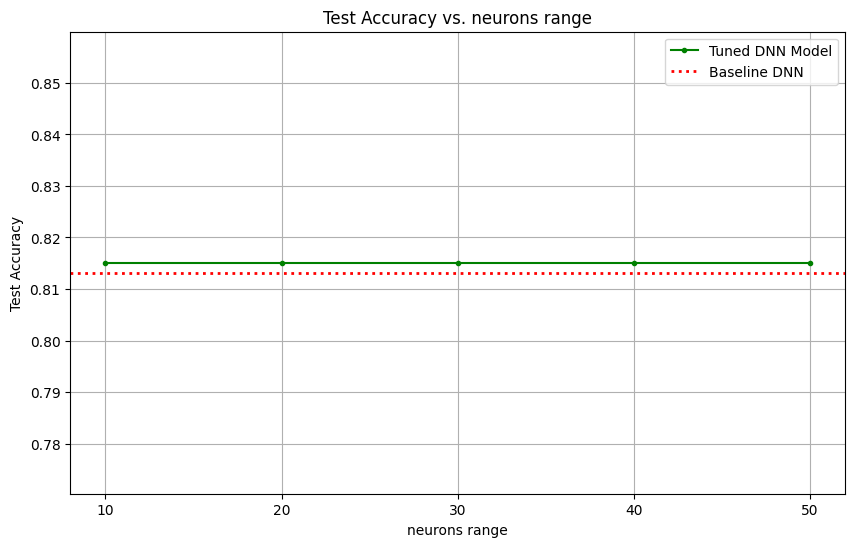

In [ ]:
plt.figure(figsize=(10, 6))
test_accuracies_values = baseline_dnn
max_accuracy_index = np.argmax(baseline_dnn)  # Find the index of the maximum accuracy
max_accuracy = test_accuracies_values[max_accuracy_index]

# plt.plot(range(1, len(neurons_range)+1), baseline_dnn, marker='.', label='Tuned DNN Model', color='#008000')
plt.plot(neurons_range, baseline_dnn, marker='.', label='Tuned DNN Model', color='#008000')
# plt.plot(max_accuracy_index , max_accuracy, marker='o', markersize=8, color='red')
plt.axhline(y=baseline_rf, label='Baseline DNN',color='red', linestyle='dotted',linewidth=2)
# plt.xticks(range(1, len(neurons_range)+1))
plt.xticks(neurons_range)
plt.xlabel('neurons range')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs. neurons range')
plt.legend()
plt.grid(True)
plt.show()

# Q6) Writing the conclusion

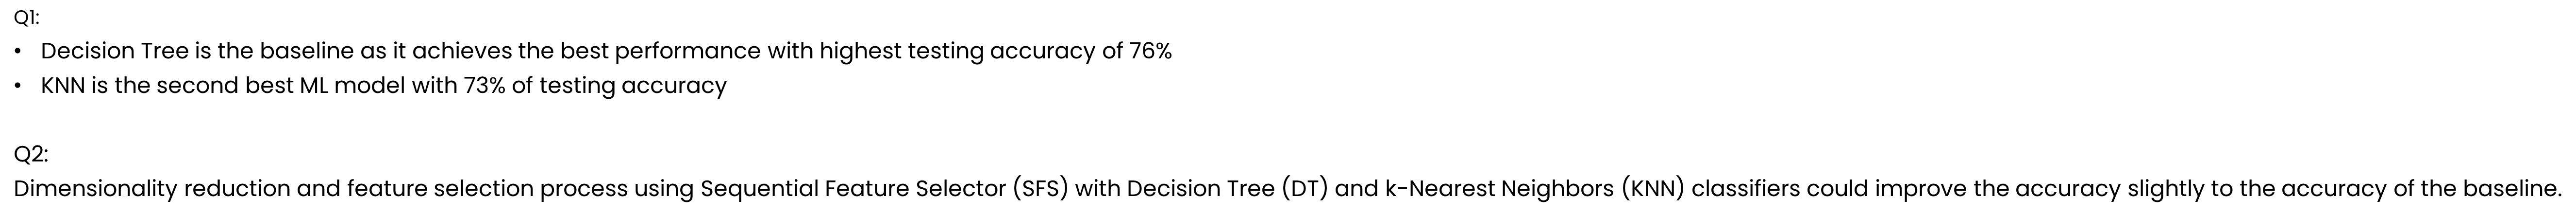

Q3:
After the last calculations in Q2 and Q3 we found out that the Champion model is Random Forest Classifier with accuracy score 0.0.815 => 81.5% when number of features(K) = 21

Q4:we implement PKI and plot the accuracy vs. number of neurons and notice that accracy does not improve than baseline Random Forest accuracy.

Q5:
we try different structures of deep neural network for PKI structure  AND the accuracy increased than Baesline DNN.
